#Asexual models

In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 9.4 MB/s eta 0:00:00

real	0m14.524s
user	0m8.540s
sys	0m1.423s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

from scipy import interp


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

compounds
dff= pd.DataFrame (compounds, columns = ['mol', 'Hit']) 
axl=dff
axl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

mol  Hit
0      <img data-content="rdkit/molecule" src="data:i...  Yes
1      <img data-content="rdkit/molecule" src="data:i...  Yes
2      <img data-content="rdkit/molecule" src="data:i...  Yes
3      <img data-content="rdkit/molecule" src="data:i...  Yes
4      <img data-content="rdkit/molecule" src="data:i...  Yes
...                                                  ...  ...
59525  <img data-content="rdkit/molecule" src="data:i...   No
59526  <img data-content="rdkit/molecule" src="data:i...   No
59527  <img data-content="rdkit/molecule" src="data:i...   No
59528  <img data-content="rdkit/molecule" src="data:i...   No
59529  <img data-content="rdkit/molecule" src="data:i...   No

[59530 rows x 2 columns]

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit


def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

axl["Input"] = axl["mol"].apply(get_input) # adding the input column to the dataframe
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()
mfp= []
mfp = axl["mol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= axl["Target"]
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, axl["Target"],test_size=0.2, random_state=42)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/asexualsSVCFinalHPT_UMFP_model5005.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = svc_model.score(Xt_test, Yt_test)
print(result)


0.9637997648244583


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svc_predict = svc_model.predict(Xt_test)
p= svc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    6129
1    5777
dtype: int64


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Accuracy: 0.963800
Recall 0.942843
precision 0.985113
F1 score: 0.963515
ROCAUC score: 0.9640960878680219
Accuracy score: 0.9637997648244583
F1 score: 0.9635147718615086
Cohens kappa: 0.927629
ROC AUC: 0.964096
[[5784   86]
 [ 345 5691]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]
fprs, tprs, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucs = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucs= aucs.round(4)

In [ ]:
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]
fprs, tprs, _ = metrics.roc_curve(Yt_test,  y_pred_proba)
fprs

array([0.        , 0.        , 0.        , ..., 0.99914821, 0.99948893,
       1.        ])

In [ ]:
import seaborn as sns

sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

In [ ]:
import seaborn as sns
sns.palplot(sns.cubehelix_palette(start=-.19,rot=-0.05))

<Axes: >

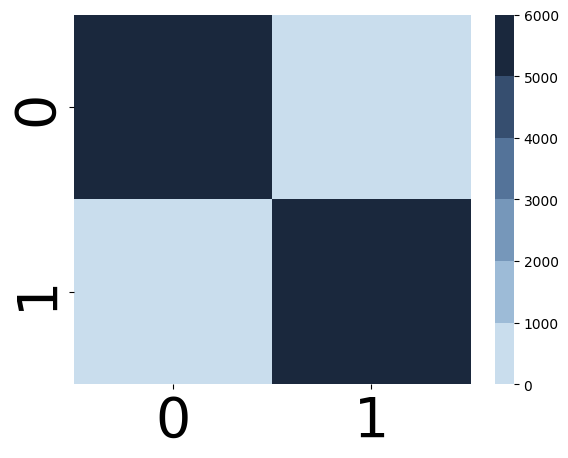

In [ ]:
import seaborn as sns
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
cm= confusion_matrix(Yt_test,svc_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

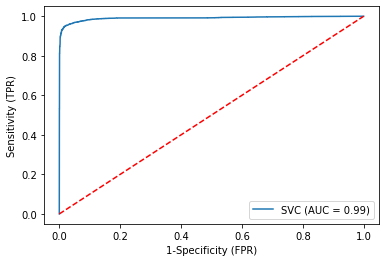

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(svc_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

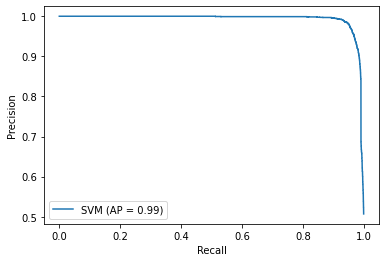

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc_model, Xt_test, Yt_test, name="SVM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

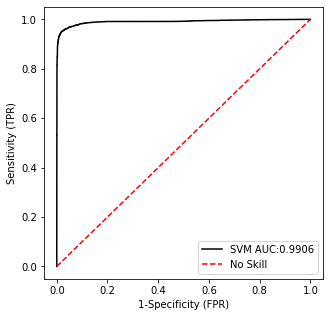

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprs,tprs,label="SVM AUC:"+str(aucs), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

<ipython-input-11-b33c5a468639>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-b33c5a468639>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-b33c5a468639>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-b33c5a468639>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-b33c5a468639>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[1.50310644e-01 5.45031051e-02 4.86575625e-02 4.60768752e-02
 4.12728676e-02 3.76893388e-02 3.40285782e-02 3.22735146e-02
 3.01637725e-02 2.80127631e-02 2.59728190e-02 2.43720427e-02
 2.34482871e-02 2.23852079e-02 2.06480422e-02 1.95063542e-02
 1.77061590e-02 1.73308727e-02 1.73308727e-02 1.73308727e-02
 1.73308727e-02 1.73308727e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72499412e-02
 1.72426438e-02 1.72728113e-02 1.71042412e-02 1.68379464e-02
 1.63051118e-02 1.58231697e-02 1.52491770e-02 1.49295026e-02
 1.45986142e-02 1.42432358e-02 1.38661317e-02 1.29719417e-02
 1.28058573e-02 1.24817335e-02 1.22597747e-02 1.16809647e-02
 1.13069740e-02 1.10443254e-02 1.04850814e-02 1.00363962e-02
 9.53606755e-03 8.501814

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
#fig1 = plt.figure(figsize=[8,8])
#ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

<ipython-input-10-976769777596>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-10-976769777596>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-10-976769777596>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-10-976769777596>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


In [ ]:

from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

NameError: ignored

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
svc_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
svc_auc = roc_auc_score(Yt_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(Yt_test, svc_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svc_fpr, svc_tpr, marker="D", label="SVM AUC: "+str(svc_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/asexualsRandomForestFinalizedhpt5005_UMFP_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = rf_model.score(Xt_test, Yt_test)
print(result)


0.9332269443977826


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    6325
1    5581
dtype: int64


<Axes: >

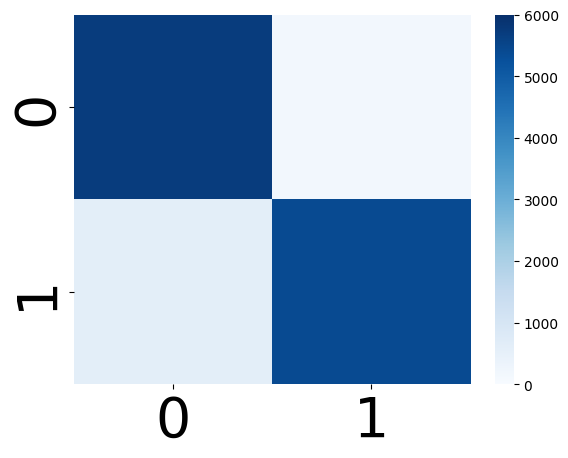

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,rf_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,rf_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.933227
Recall 0.896455
precision 0.969540
F1 score: 0.931566
ROCAUC score: 0.9337468939909662
Accuracy score: 0.9332269443977826
F1 score: 0.9315658087285874
Cohens kappa: 0.866570
ROC AUC: 0.933747
[[5700  170]
 [ 625 5411]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucrf = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucrf= aucrf.round(4)

<AxesSubplot:>

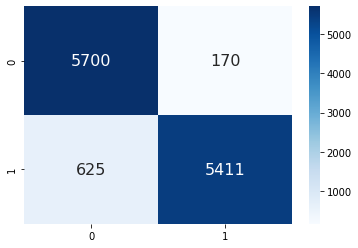

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

Text(0.5, 0, '1-Specificity (FPR)')

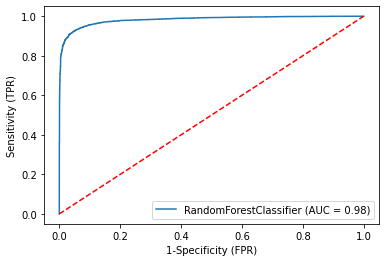

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

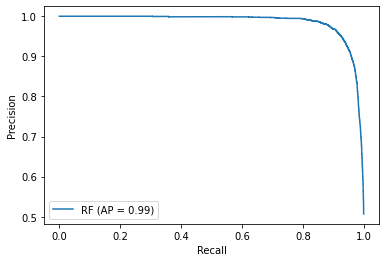

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf_model, Xt_test, Yt_test, name="RF"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprrf,tprrf,label="RF AUC:"+str(aucrf), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-29-f174153ef6f9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-29-f174153ef6f9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.

[8.68631571e-02 7.51717436e-02 6.32406484e-02 5.53100655e-02
 5.09986668e-02 4.80130705e-02 4.58251459e-02 4.30580634e-02
 4.29948893e-02 4.12276222e-02 3.97551885e-02 3.83920294e-02
 3.76296211e-02 3.65385935e-02 3.56318326e-02 3.47498885e-02
 3.40784580e-02 3.22964788e-02 3.09885195e-02 2.97940946e-02
 2.90483148e-02 2.84293640e-02 2.78012252e-02 2.66241147e-02
 2.61345236e-02 2.53207592e-02 2.43558901e-02 2.36768867e-02
 2.31518560e-02 2.27016511e-02 2.21048819e-02 2.14875376e-02
 2.04575650e-02 1.97963504e-02 1.89990352e-02 1.84554425e-02
 1.78472794e-02 1.69588110e-02 1.62339891e-02 1.57866680e-02
 1.53068067e-02 1.46313635e-02 1.41911894e-02 1.38514178e-02
 1.31960514e-02 1.32766386e-02 1.30234437e-02 1.25707757e-02
 1.20260562e-02 1.13962454e-02 1.08281035e-02 1.03892454e-02
 1.02263918e-02 9.98994315e-03 9.53917802e-03 9.57678249e-03
 9.26941044e-03 8.85187950e-03 8.43755358e-03 8.00328982e-03
 7.62556032e-03 7.46789998e-03 7.08425777e-03 6.81915020e-03
 6.44091880e-03 6.094560

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-187-50bf6fcd857d>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-187-50bf6fcd857d>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.

[0.12756215 0.07987926 0.07380468 0.06965846 0.06694241 0.0615392
 0.05885403 0.05627509 0.05251031 0.05112114 0.048951   0.0474921
 0.04610685 0.04544238 0.04361774 0.04152265 0.04085872 0.03947008
 0.03798357 0.03701465 0.0363043  0.03472753 0.03383773 0.03209541
 0.03085164 0.02998449 0.0285346  0.02704836 0.02633348 0.02503981
 0.02395273 0.02276356 0.02184129 0.0209688  0.02053018 0.01999896
 0.01943809 0.01907951 0.0185308  0.01790203 0.01749433 0.01672691
 0.01595032 0.01518638 0.01471742 0.01426081 0.01369141 0.01319673
 0.01296842 0.01216239 0.01160476 0.01104252 0.01057945 0.01031238
 0.00983786 0.00954577 0.00938262 0.00891397 0.00832975 0.00793839
 0.00784061 0.00758718 0.00730538 0.00701751 0.0069286  0.00646664
 0.0063282  0.00583643 0.00573811 0.0054631  0.00537841 0.00509089
 0.004698   0.00463255 0.00415236 0.00395633 0.00357763 0.00319522
 0.00299946 0.00299946 0.00251119 0.0024138  0.00212235 0.00192884
 0.00173623 0.00153673 0.00144035 0.00134431 0.00107336 0.001073

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.994


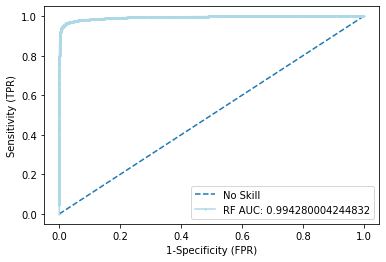

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
rf_auc = roc_auc_score(Yt_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(Yt_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker="D", label="RF AUC: "+str(rf_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##LR

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = lr_model.score(Xt_test, Yt_test)
print(result)


0.7801108684696791


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(Xt_test)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())

1    8382
0    3524
dtype: int64


<Axes: >

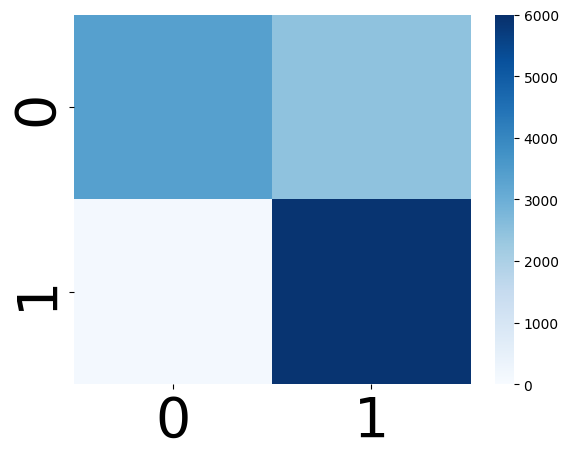

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,lr_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

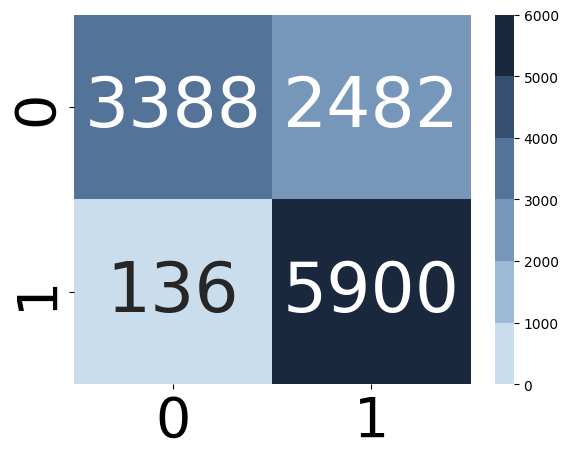

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,lr_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lr_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lr_predict))
print('Accuracy score:',accuracy_score(Yt_test, lr_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lr_predict)
print(matrix)

Accuracy: 0.780111
Recall 0.977469
precision 0.703889
F1 score: 0.818421
ROCAUC score: 0.7773202917644615
Accuracy score: 0.7801108684696791
F1 score: 0.8184214176723539
Cohens kappa: 0.557706
ROC AUC: 0.777320
[[3388 2482]
 [ 136 5900]]


<AxesSubplot:>

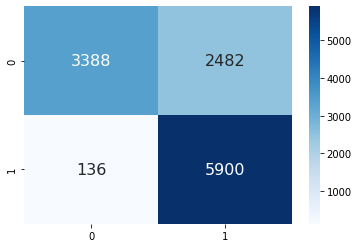

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<AxesSubplot:>

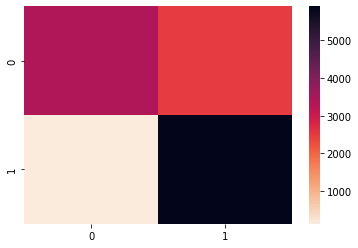

In [ ]:

import seaborn as sns
cmap = sns.cm.rocket_r
sns.heatmap(cm, cmap = cmap)

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    loaded_model, Xt_test, Yt_test, name="LR"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

NameError: ignored

Text(0.5, 0, '1-Specificity (FPR)')

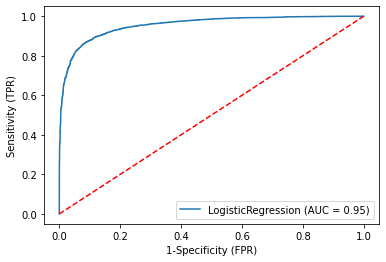

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

In [ ]:

import matplotlib.pyplot as plt

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
y_pred_proba

array([0.57033591, 0.74070096, 0.52778237, ..., 0.99997091, 0.20710096,
       0.95461326])

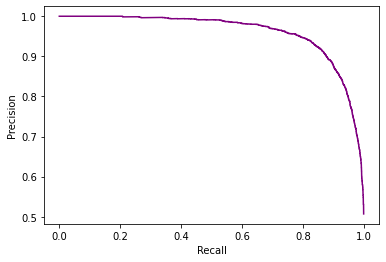

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
#ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
fprlr, tprlr, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

auclr = metrics.roc_auc_score(Yt_test, y_pred_proba)
auclr= auclr.round(4)
auclr

0.955

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<ipython-input-32-1ef9feaa12d3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1ef9feaa12d3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1ef9feaa12d3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1ef9feaa12d3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-32-1ef9feaa12d3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[0.04929523 0.07471171 0.07316495 0.07400883 0.0696356  0.06567406
 0.06377178 0.05947045 0.05639329 0.05463353 0.05125373 0.05071694
 0.04865021 0.04670933 0.04575826 0.04485379 0.04401086 0.04182283
 0.04070506 0.0395689  0.03874862 0.03804049 0.03694545 0.03621286
 0.03464498 0.03372464 0.03279665 0.03186856 0.0313417  0.0305271
 0.02944285 0.02870974 0.02780405 0.02698289 0.0262602  0.02578405
 0.02463519 0.02417311 0.0236513  0.02286574 0.02225391 0.02179124
 0.02098016 0.02033279 0.01937637 0.01927924 0.018408   0.0178634
 0.01774053 0.0171531  0.01682548 0.0163964  0.01576119 0.0152681
 0.01451937 0.01408171 0.01336004 0.01250985 0.01182142 0.01150014
 0.01092111 0.01054463 0.01012365 0.01004635 0.00962078 0.0094092
 0.00912694 0.00857159 0.00839674 0.00806187 0.0077377  0.00723842
 0.00703897 0.00669815 0.00667908 0.00648111 0.00623902 0.00576775
 0.00507043 0.00470628 0.00446906 0.00429108 0.00381134 0.00323311
 0.00291653 0.00261468 0.0024483  0.00207227 0.00161408 0.00144188

<ipython-input-201-ce69c57f58c6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-201-ce69c57f58c6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-201-ce69c57f58c6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-201-ce69c57f58c6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-201-ce69c57f58c6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-201-ce69c57f58c6>:19: DeprecationWarning: scipy.in

[0.10195328 0.08100586 0.08722444 0.08434925 0.07940547 0.07684419
 0.07350158 0.06898166 0.06842182 0.06696736 0.06461547 0.06317209
 0.06180141 0.06050003 0.05869818 0.05702706 0.05571942 0.05502215
 0.0533948  0.05226632 0.05126167 0.04995055 0.04937617 0.04779496
 0.04644216 0.04531553 0.04447455 0.04354032 0.042169   0.040597
 0.0394815  0.03861013 0.03636919 0.03562162 0.03510593 0.0341021
 0.03325654 0.03251296 0.03238249 0.03120753 0.03031222 0.0298179
 0.02885169 0.0284792  0.02736703 0.02661099 0.02574909 0.02499537
 0.02445303 0.02275256 0.02183195 0.02103446 0.02009044 0.0197503
 0.01876535 0.01819342 0.01748055 0.01671809 0.01585245 0.01541861
 0.01513221 0.01504771 0.01433578 0.01406815 0.01340034 0.01302484
 0.01240332 0.01175506 0.0115679  0.01141731 0.01124704 0.01077784
 0.00991351 0.00926843 0.00862233 0.00775035 0.00731391 0.00664177
 0.00605362 0.00587525 0.00548485 0.00494951 0.00466283 0.00407869
 0.00359875 0.00283752 0.00231654 0.00221816 0.0019512  0.00185825


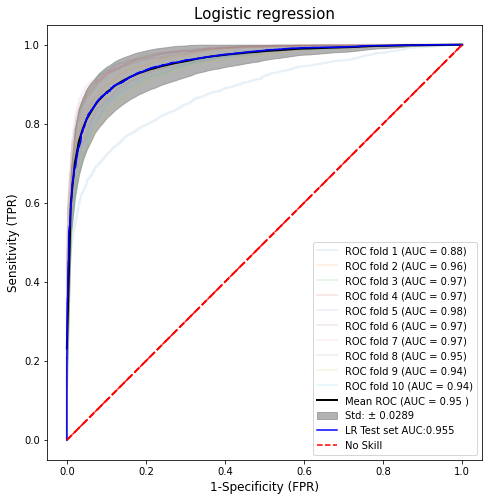

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
fprlr,tprlr, thresholds = roc_curve(Yt_test, lr_model.predict(Xt_test))

In [ ]:
#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.958


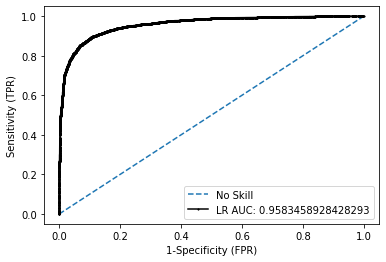

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
lr_auc = roc_auc_score(Yt_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Yt_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker="D", label="LR AUC: "+str(lr_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# load the model from disk

result = gbm_model.score(Xt_test, Yt_test)
print(result)


0.8485637493700655


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(Xt_test)
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    5969
1    5937
dtype: int64


<Axes: >

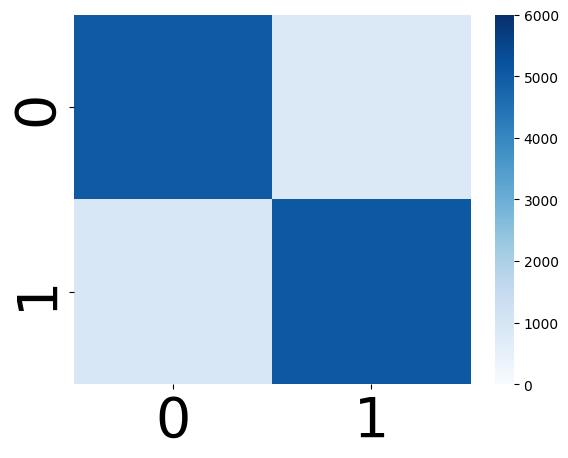

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,gbm_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

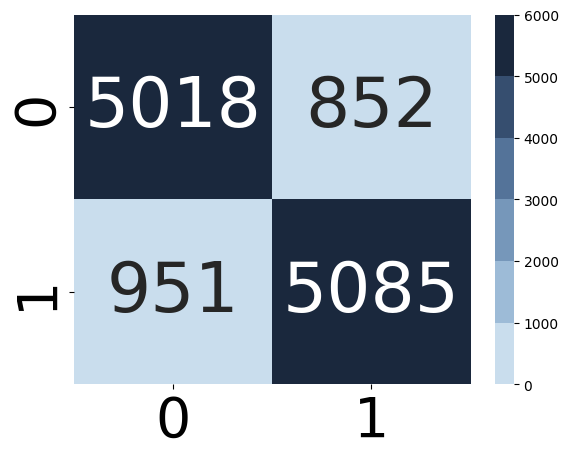

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,gbm_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,gbm_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, gbm_predict))
print('Accuracy score:',accuracy_score(Yt_test, gbm_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, gbm_predict)
print(matrix)

Accuracy: 0.848564
Recall 0.842445
precision 0.856493
F1 score: 0.818421
ROCAUC score: 0.8486502619716114
Accuracy score: 0.8485637493700655
F1 score: 0.8184214176723539
Cohens kappa: 0.697139
ROC AUC: 0.848650
[[5018  852]
 [ 951 5085]]


<AxesSubplot:>

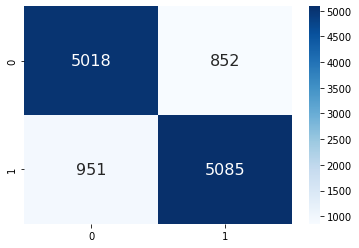

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]
fprgbm, tprgbm, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucgbm= metrics.roc_auc_score(Yt_test, y_pred_proba)
aucgbm= aucgbm.round(4)
aucgbm

0.921

<ipython-input-34-d32b4a4b919e>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-d32b4a4b919e>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-d32b4a4b919e>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-d32b4a4b919e>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-34-d32b4a4b919e>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[0.06111819 0.12158283 0.12441679 0.11735351 0.10578239 0.10160085
 0.09767045 0.09336071 0.08470883 0.08103735 0.07791223 0.07507182
 0.07267316 0.06965054 0.06805516 0.06529834 0.0625284  0.06029816
 0.05880677 0.05605035 0.0547052  0.05271473 0.05110866 0.04937286
 0.04833898 0.04731999 0.04554197 0.04453534 0.04357313 0.04263917
 0.04163977 0.04100113 0.04001353 0.03836203 0.03702448 0.03493694
 0.03412362 0.03341816 0.03193618 0.03095272 0.02993417 0.02882749
 0.02813675 0.02828303 0.02797147 0.02693033 0.02594303 0.0249773
 0.02401008 0.02348386 0.02270266 0.02182394 0.02113933 0.02013506
 0.0192503  0.01832292 0.01750009 0.01671386 0.01628331 0.01582707
 0.01491686 0.01454739 0.01391732 0.01272808 0.0122404  0.01206427
 0.01136697 0.01088924 0.00987157 0.00940663 0.00877834 0.00870353
 0.0083473  0.00804525 0.00748461 0.00698939 0.00610811 0.0053036
 0.00501933 0.00472371 0.00437103 0.00382049 0.00332889 0.00307035
 0.00279102 0.00248743 0.00239243 0.00214421 0.00193168 0.001615

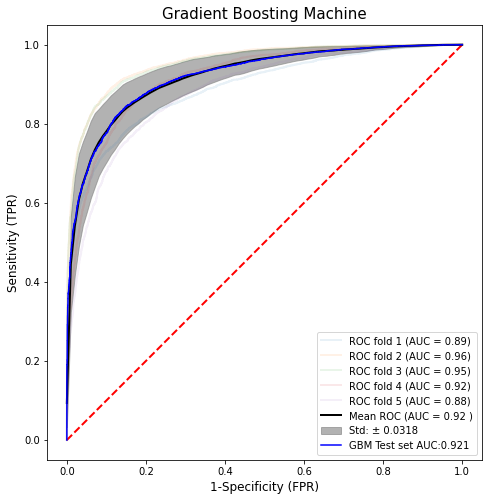

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<ipython-input-213-588c34d1135f>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-213-588c34d1135f>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-213-588c34d1135f>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-213-588c34d1135f>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-213-588c34d1135f>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-213-588c34d1135f>:19: DeprecationWarning: scipy.in

[0.08586489 0.11747186 0.11228842 0.11099524 0.10317374 0.10075022
 0.09503411 0.09203903 0.09004003 0.08533933 0.08387673 0.08040231
 0.07762978 0.07587451 0.07451338 0.07191241 0.06916677 0.06802564
 0.0667509  0.06567801 0.06362562 0.0618669  0.06010937 0.05898679
 0.05781655 0.05565145 0.05500782 0.0538085  0.05332015 0.05220753
 0.05101875 0.04946814 0.04830778 0.04743473 0.04595794 0.04539594
 0.04462043 0.04387587 0.04224017 0.04162103 0.04034665 0.03970741
 0.03876051 0.03777276 0.03627526 0.03483191 0.03365155 0.0327187
 0.03230511 0.03140417 0.03043931 0.02919505 0.02779212 0.026783
 0.02619021 0.02538161 0.02372232 0.02241485 0.02105217 0.02014474
 0.01960375 0.0190138  0.01791587 0.01639552 0.01572422 0.01482128
 0.01452344 0.0137551  0.01246635 0.01203154 0.01133466 0.01039388
 0.00970594 0.00924378 0.00851038 0.00806294 0.00783958 0.00765263
 0.00738608 0.00657656 0.00637715 0.00570348 0.00544547 0.00462766
 0.00390136 0.00378292 0.00314321 0.0029535  0.00251816 0.0022763

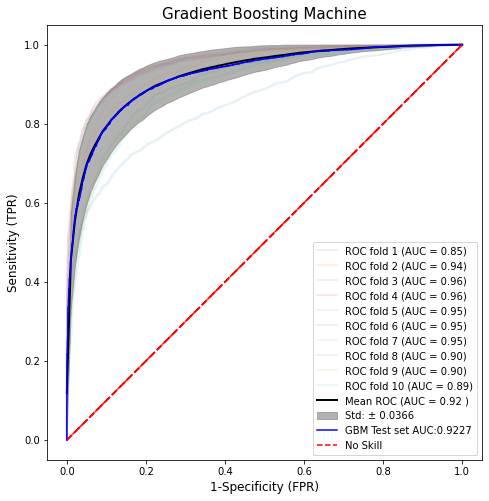

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Text(0.5, 0, '1-Specificity (FPR)')

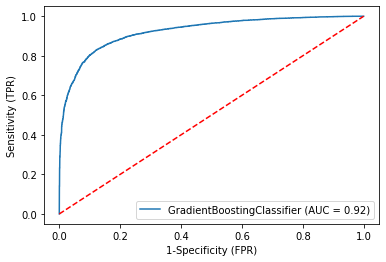

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gbm_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

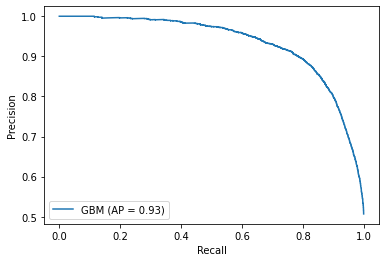

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gbm_model, Xt_test, Yt_test, name="GBM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

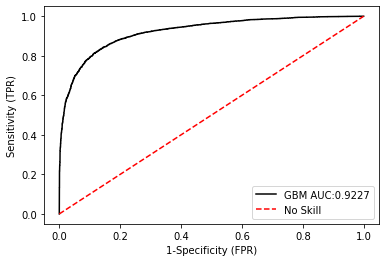

In [ ]:
#create ROC curve
plt.plot(fprgbm, tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
GBM: ROC AUC=0.924


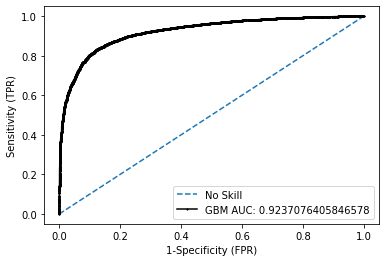

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
gbm_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
gbm_auc = roc_auc_score(Yt_test, gbm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBM: ROC AUC=%.3f' % (gbm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(Yt_test, gbm_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gbm_fpr, gbm_tpr, marker="D", label="GBM AUC: "+str(gbm_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




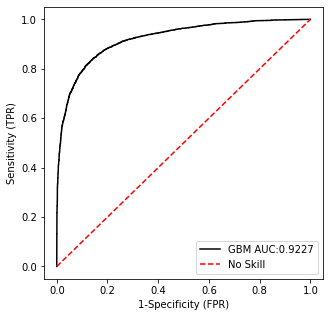

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

#ROC CUrves

### SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/asexualsSVCFinalHPT_UMFP_model5005.pkl')

##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/asexualsRandomForestFinalizedhpt5005_UMFP_model.pkl')

##LR

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl')

##GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')

## Plots

<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-16-ae0dbcff23d2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))


[1.50310644e-01 5.45295259e-02 4.86448491e-02 4.60768752e-02
 4.12728676e-02 3.76893388e-02 3.40285782e-02 3.22735146e-02
 3.01637725e-02 2.80127631e-02 2.59728190e-02 2.43720427e-02
 2.34482871e-02 2.23852079e-02 2.06480422e-02 1.95063542e-02
 1.77061590e-02 1.73308727e-02 1.73308727e-02 1.73308727e-02
 1.73308727e-02 1.73308727e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72684099e-02
 1.72684099e-02 1.72684099e-02 1.72684099e-02 1.72499412e-02
 1.72426438e-02 1.72728113e-02 1.71042412e-02 1.68379464e-02
 1.63051118e-02 1.58231697e-02 1.52491770e-02 1.49295026e-02
 1.45986142e-02 1.42432358e-02 1.38661317e-02 1.29719417e-02
 1.28058573e-02 1.24817335e-02 1.22597747e-02 1.16809647e-02
 1.13069740e-02 1.10443254e-02 1.04850814e-02 1.00363962e-02
 9.53606755e-03 8.501814

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-16-ae0dbcff23d2>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-16-ae0dbcff23d2>:54: DeprecationWarning: scipy.interp is deprecated and will be removed i

[1.07909791e-01 7.83701268e-02 6.46336998e-02 5.66732792e-02
 5.21842845e-02 4.91887285e-02 4.58332817e-02 4.38086157e-02
 4.09560081e-02 3.92087313e-02 3.66198544e-02 3.61845732e-02
 3.35427327e-02 3.24786342e-02 3.06882805e-02 2.97305631e-02
 2.86549181e-02 2.73481311e-02 2.66411461e-02 2.60170431e-02
 2.48546401e-02 2.36117452e-02 2.30360372e-02 2.20989837e-02
 2.09011613e-02 1.96661615e-02 1.91657745e-02 1.86028714e-02
 1.81440565e-02 1.73462697e-02 1.66530327e-02 1.58566741e-02
 1.55602963e-02 1.47257816e-02 1.37106643e-02 1.36798372e-02
 1.34997629e-02 1.30501924e-02 1.27251897e-02 1.18721948e-02
 1.15213552e-02 1.13654269e-02 1.07865185e-02 1.02720419e-02
 9.72962557e-03 9.53778436e-03 9.34105592e-03 9.02013579e-03
 8.64064405e-03 8.44136255e-03 8.08402099e-03 7.68562985e-03
 7.66038351e-03 7.28582208e-03 7.24439245e-03 6.97064837e-03
 6.73925340e-03 6.52854524e-03 6.46571799e-03 6.09007820e-03
 5.75704545e-03 5.23122441e-03 5.10552737e-03 4.95834884e-03
 4.52015452e-03 4.189993

<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-16-ae0dbcff23d2>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[0.03368491 0.11575986 0.11957251 0.11627737 0.11168051 0.10099833
 0.09793039 0.09189208 0.0839137  0.08043682 0.07648013 0.07133917
 0.06725685 0.06506853 0.06184026 0.05923549 0.057771   0.05633103
 0.05398757 0.05241103 0.05135925 0.05082523 0.04949321 0.04756787
 0.04653234 0.04572044 0.04446496 0.04377198 0.04202588 0.04039273
 0.03852527 0.03742804 0.03609522 0.0351111  0.03407289 0.03295261
 0.03224614 0.03109995 0.03007776 0.02959142 0.0287751  0.02805116
 0.02764462 0.02674966 0.02618602 0.02525652 0.02429621 0.02379573
 0.02351165 0.02287589 0.02195587 0.02115194 0.02038627 0.01948853
 0.01846489 0.01803348 0.01760606 0.01710632 0.0162963  0.01513114
 0.01395145 0.01329623 0.01276439 0.01214798 0.01169246 0.01120819
 0.01022399 0.00980554 0.00938584 0.00883906 0.00830875 0.00787782
 0.00753006 0.00716456 0.00649792 0.00572464 0.00542536 0.00537645
 0.00493912 0.00489395 0.00455309 0.00433005 0.00391649 0.00315729
 0.00294395 0.00263247 0.00231276 0.00224048 0.00213862 0.0016

<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-16-ae0dbcff23d2>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))


[0.04929523 0.07471171 0.07316495 0.07400883 0.0696356  0.06567406
 0.06377178 0.05947045 0.05639329 0.05463353 0.05125373 0.05071694
 0.04865021 0.04670933 0.04575826 0.04485379 0.04401086 0.04182283
 0.04070506 0.0395689  0.03874862 0.03804049 0.03694545 0.03621286
 0.03464498 0.03372464 0.03279665 0.03186856 0.0313417  0.0305271
 0.02944285 0.02870974 0.02780405 0.02698289 0.0262602  0.02578405
 0.02463519 0.02417311 0.0236513  0.02286574 0.02225391 0.02179124
 0.02098016 0.02033279 0.01937637 0.01927924 0.018408   0.0178634
 0.01774053 0.0171531  0.01682548 0.0163964  0.01576119 0.0152681
 0.01451937 0.01408171 0.01336004 0.01250985 0.01182142 0.01150014
 0.01092111 0.01054463 0.01012365 0.01004635 0.00962078 0.0094092
 0.00912694 0.00857159 0.00839674 0.00806187 0.0077377  0.00723842
 0.00703897 0.00669815 0.00667908 0.00648111 0.00623902 0.00576775
 0.00507043 0.00470628 0.00446906 0.00429108 0.00381134 0.00323311
 0.00291653 0.00261468 0.0024483  0.00207227 0.00161408 0.00144188

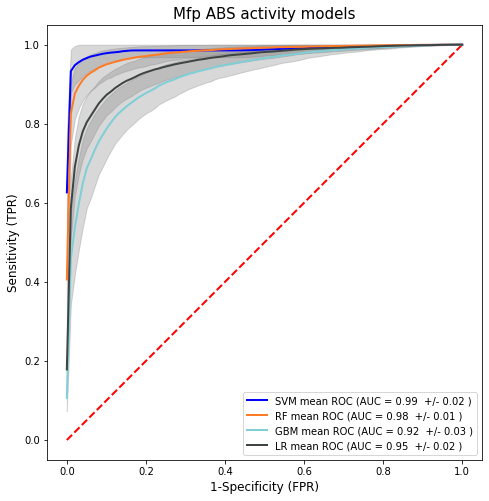

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Mfp ABS activity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

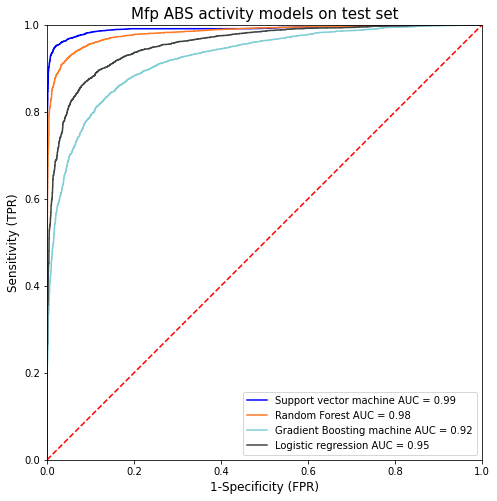

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp ABS activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

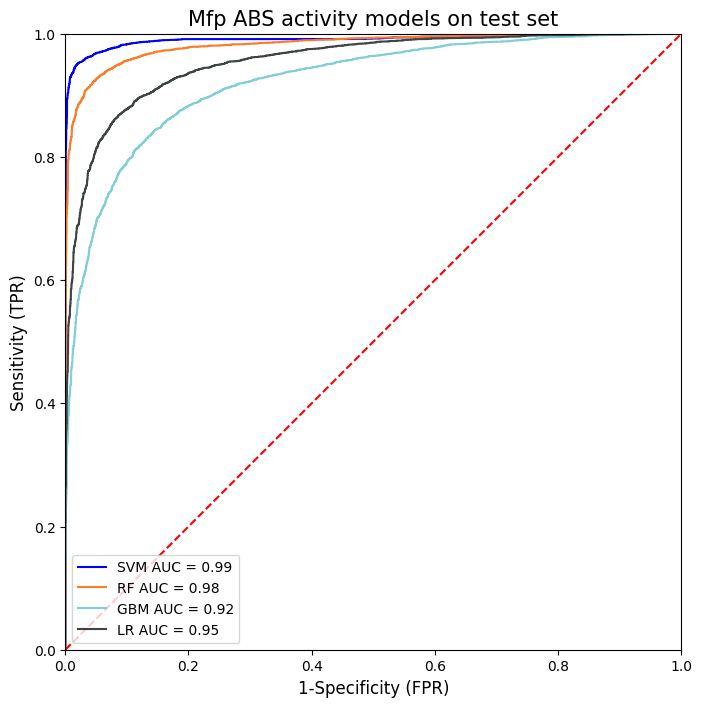

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp ABS activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.9931
0.9852
0.9317
0.9602


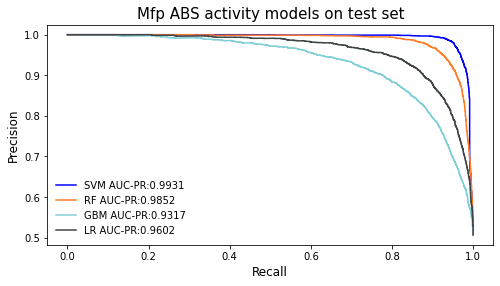

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp ABS activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_auc = roc_auc_score(Yt_test, s_probs)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_auc = roc_auc_score(Yt_test, rf_probs)
# predict probabilities
gbm_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
gbm_auc = roc_auc_score(Yt_test, gbm_probs)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = rf_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(Yt_test, lr_probs)


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
gbm_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
gbm_auc = roc_auc_score(Yt_test, gbm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBM: ROC AUC=%.3f' % (gbm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(Yt_test, gbm_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gbm_fpr, gbm_tpr, marker="D", label="GBM AUC: "+str(gbm_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




In [ ]:
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


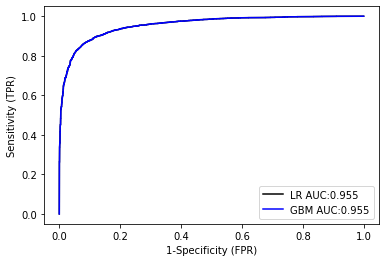

In [ ]:

#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(aucgbm), color="blue")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

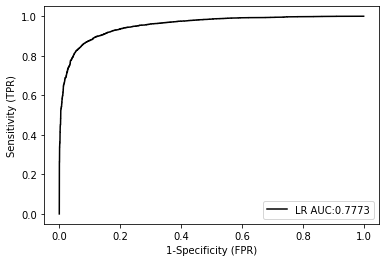

In [ ]:
#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
#plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(auclr), color="blue")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

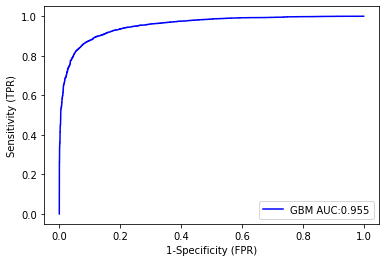

In [ ]:
#plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(aucgbm), color="blue")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
loaded_model

LogisticRegression(C=10, class_weight={0: 1, 1: 10})

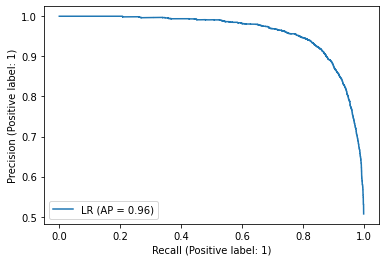

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    loaded_model, Xt_test, Yt_test, name="LR"
)


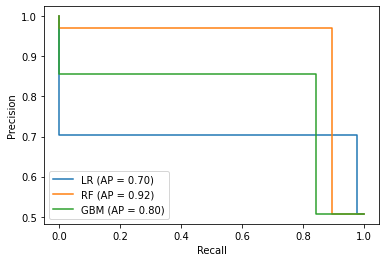

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(Yt_test, lr_predict, ax=ax,name = "LR")
PrecisionRecallDisplay.from_predictions(Yt_test, rf_predict, ax=ax,name = "RF")
PrecisionRecallDisplay.from_predictions(Yt_test, gbm_predict, ax=ax, name = "GBM")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_precision_recall_curve(lr_model, Xt_test, Yt_test, ax = plt.gca(),name = "LR")

plot_precision_recall_curve(rf_model, Xt_test, Yt_test, ax = plt.gca(),name = "RF")

plot_precision_recall_curve(gbm_model, Xt_test, Yt_test, ax = plt.gca(),name = "GBM")

plt.title('Precision-Recall curve')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-385-d9bb0400bd71>", line 2, in <module>
    from sklearn.metrics import plot_precision_recall_curve
ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/lib/python3.9/dist-packages/sklearn/metrics/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 319, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 353, in _fixed_getinnerframes
    records = fi

ImportError: ignored

# Dual graphs compiled

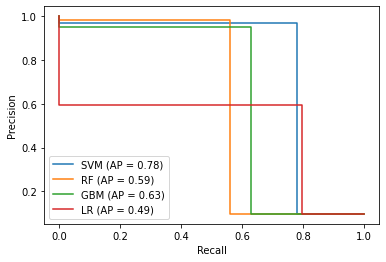

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(Yt_test, svc_predict, ax=ax,name = "SVM")
PrecisionRecallDisplay.from_predictions(Yt_test, rf_predict, ax=ax,name = "RF")
PrecisionRecallDisplay.from_predictions(Yt_test, gbm_predict, ax=ax, name = "GBM")
PrecisionRecallDisplay.from_predictions(Yt_test, lr_predict, ax=ax,name = "LR")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-130-b51475724831>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-130-b51475724831>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.

[0.36097175 0.28116799 0.25869259 0.24800608 0.23687134 0.23546715
 0.23115089 0.23046087 0.22604095 0.21755597 0.20904871 0.20495394
 0.20109406 0.19556449 0.1915217  0.18447654 0.17777502 0.17165326
 0.16546905 0.16251549 0.1545456  0.14839606 0.14796604 0.14182278
 0.13426547 0.13134232 0.13073481 0.12607503 0.12250122 0.1206026
 0.11878338 0.11708661 0.11255084 0.11081848 0.10909954 0.10739464
 0.10570448 0.10338944 0.10103586 0.0986331  0.09536655 0.09272762
 0.09082224 0.08778275 0.08616362 0.08537713 0.08302792 0.08016861
 0.07990354 0.08034112 0.07972866 0.07972866 0.07682328 0.06972964
 0.05836738 0.05836738 0.05752142 0.05752142 0.05685019 0.05685019
 0.05254696 0.04885372 0.04406733 0.04406733 0.04406733 0.04406733
 0.04406733 0.04406733 0.04370781 0.04192149 0.04131395 0.04094882
 0.03932805 0.03658794 0.03483917 0.03295485 0.03132137 0.03024409
 0.02918472 0.02814528 0.02712805 0.02613565 0.02517099 0.0242374
 0.0224707  0.02098169 0.01952033 0.01799805 0.0167158  0.015225

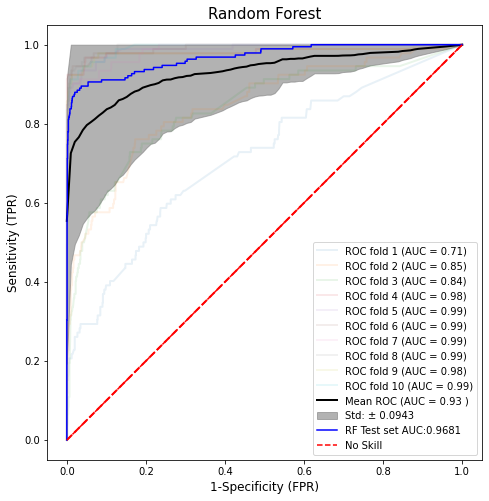

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=10,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.in

[0.20590679 0.23424239 0.22454698 0.22374971 0.19128991 0.17857359
 0.17562237 0.17083514 0.15942971 0.15786599 0.15132667 0.14810641
 0.14568201 0.13105585 0.12246376 0.11814927 0.11814927 0.11514096
 0.11072887 0.10416847 0.10066328 0.10126683 0.09441473 0.08868831
 0.08656645 0.08604635 0.08353933 0.07718211 0.06846652 0.06707259
 0.06707259 0.06054708 0.06054708 0.0571345  0.05668862 0.05726433
 0.05473347 0.05473347 0.05522124 0.049154   0.04616687 0.04528841
 0.04528841 0.04222375 0.03919077 0.03919077 0.03919077 0.03919077
 0.03962549 0.03890333 0.03864432 0.03231754 0.03231754 0.03231754
 0.03231754 0.03226266 0.02908497 0.02908497 0.02908497 0.02592796
 0.02280019 0.02280019 0.02251339 0.02251339 0.02251339 0.02251339
 0.01615877 0.01615877 0.01615877 0.01630435 0.01630435 0.01304348
 0.00978261 0.00978261 0.00978261 0.00652174 0.00326087 0.00326087
 0.00326087 0.00326087 0.00326087 0.00326087 0.00326087 0.
 0.         0.         0.         0.         0.         0.
 0.        

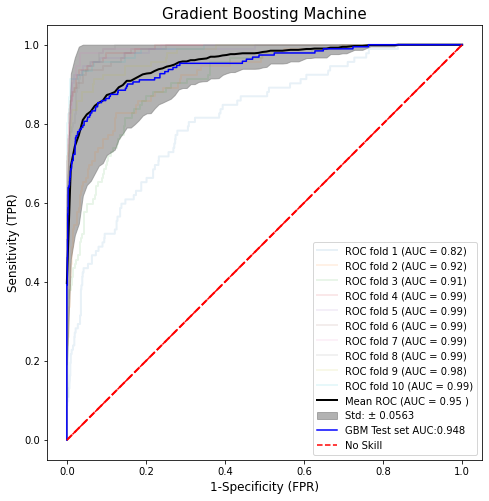

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=10,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-127-43e792a001a2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-127-43e792a001a2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-127-43e792a001a2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

[0.17043114 0.19331176 0.20418088 0.21969001 0.21071998 0.21385513
 0.21040819 0.20548857 0.19144493 0.18505153 0.17955813 0.17579099
 0.17496982 0.1726811  0.1697261  0.16706826 0.15911606 0.14562596
 0.13811419 0.13830394 0.13260016 0.12551653 0.12439663 0.12458481
 0.12028858 0.11758624 0.11264476 0.10938845 0.10660435 0.10660435
 0.10343204 0.09564621 0.09525644 0.09245572 0.08624139 0.08643868
 0.08221445 0.08221445 0.08221445 0.08203462 0.08203462 0.07969697
 0.07605408 0.07596263 0.07581473 0.07518094 0.07118528 0.07118528
 0.06805424 0.06463508 0.06149715 0.0583727  0.05500687 0.05500687
 0.05473773 0.05154742 0.04847631 0.04847631 0.04528841 0.04513161
 0.04513161 0.04188663 0.04188663 0.03540543 0.03540543 0.03540543
 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209
 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209
 0.02572209 0.01932216 0.01630435 0.01630435 0.01304348 0.01304348
 0.01304348 0.01304348 0.01304348 0.01304348 0.00978261 0.0097

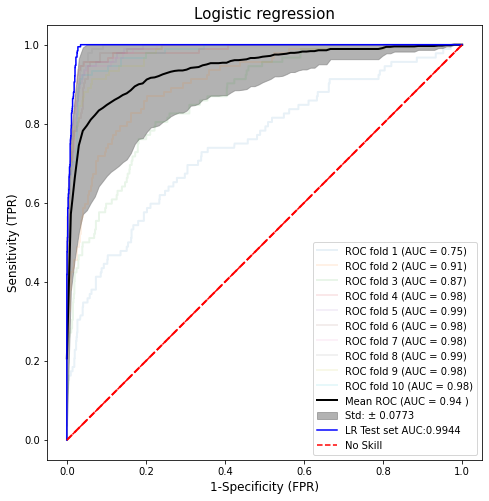

In [ ]:
x=df
y=axl["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=10,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


0.8881


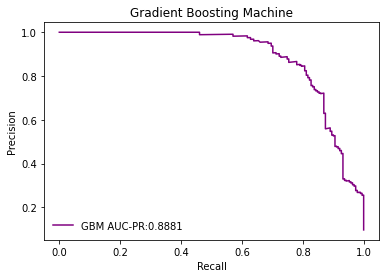

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="GBM AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Gradient Boosting Machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9974


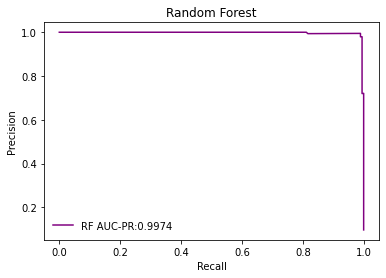

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="RF AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9449


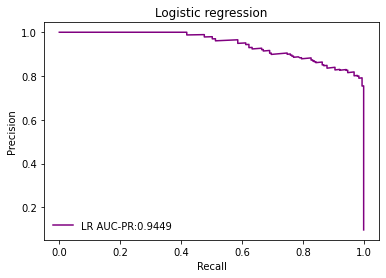

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="LR AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Logistic regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9929


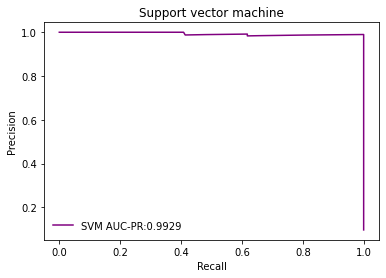

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="SVM AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Support vector machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9929
0.9449
0.8881
0.9974


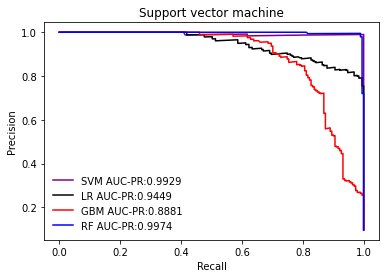

In [ ]:
#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

ax.plot(recall, precision, color='black',label="LR AUC-PR:"+str(auc_prc))
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

ax.plot(recall, precision, color='red',label="GBM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

ax.plot(recall, precision, color='blue',label="RF AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Support vector machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

# MACCS

In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

real	0m11.305s
user	0m6.466s
sys	0m0.283s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

from scipy import interp


In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())

compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

compounds


/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

[(<rdkit.Chem.rdchem.Mol at 0x7fdde9f42580>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42460>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f421c0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42040>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42280>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42640>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f425e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42760>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42700>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42220>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f422e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42880>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f428e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42940>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f429a0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42a00>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42a60>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42ac0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fdde9f42b20>, '

In [ ]:
compounds
dpchm= pd.DataFrame (compounds, columns = ['mol', 'hit']) 
dpchm
dpchm["Target"] = np.where(dpchm["hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()
dchm= dpchm["mol"]
dchm
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df = pd.DataFrame(maccs)

In [ ]:
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, dpchm["Target"],test_size=0.2, random_state=42)

### SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/asexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = svc_model.score(Xt_test, Yt_test)
print(result)


0.9760624895010919


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svc_predict = svc_model.predict(Xt_test)
p= svc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    6019
1    5887
dtype: int64


<Axes: >

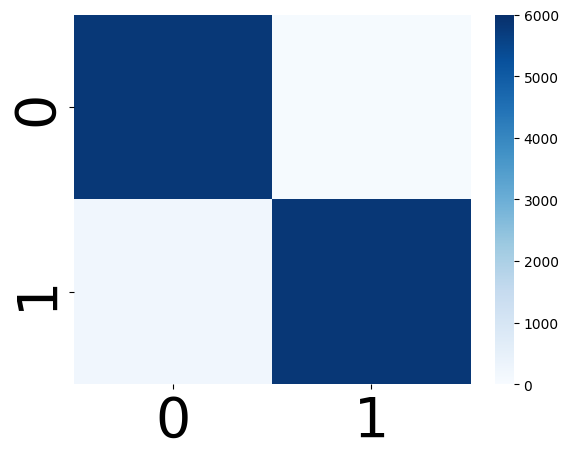

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,svc_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

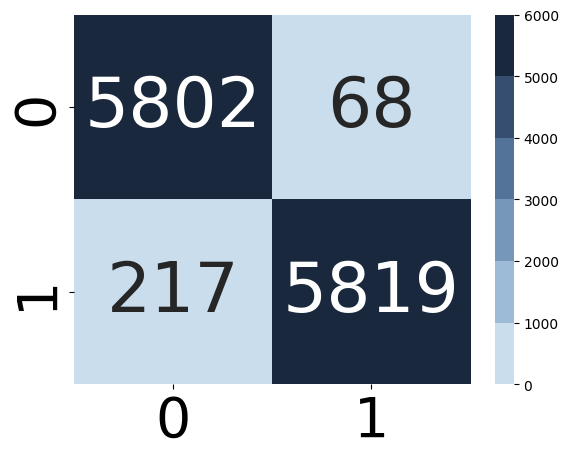

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,svc_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Accuracy: 0.976062
Recall 0.964049
precision 0.988449
F1 score: 0.976097
ROCAUC score: 0.9762323560059292
Accuracy score: 0.9760624895010919
F1 score: 0.9760966199781934
Cohens kappa: 0.952132
ROC AUC: 0.976232
[[5802   68]
 [ 217 5819]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]
fprs, tprs, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucs = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucs= aucs.round(4)

<Axes: >

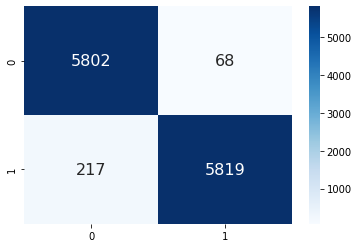

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

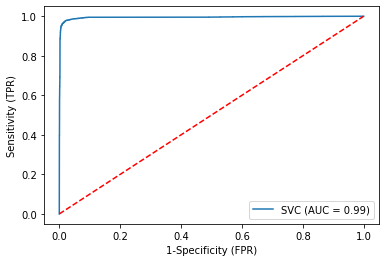

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(svc_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

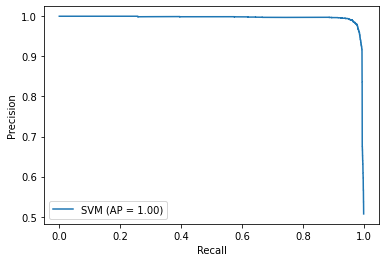

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc_model, Xt_test, Yt_test, name="SVM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

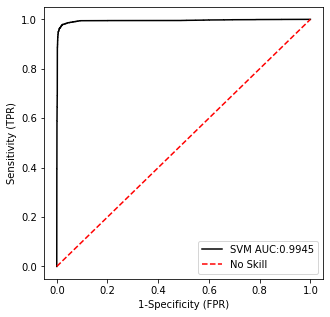

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprs,tprs,label="SVM AUC:"+str(aucs), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         #label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
#fig1 = plt.figure(figsize=[8,8])
#ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

In [ ]:

from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
svc_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
svc_auc = roc_auc_score(Yt_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(Yt_test, svc_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svc_fpr, svc_tpr, marker="D", label="SVM AUC: "+str(svc_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/asexualsRF_HPTFinal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = rf_model.score(Xt_test, Yt_test)
print(result)


0.9370905425835713


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    6197
1    5709
dtype: int64


<Axes: >

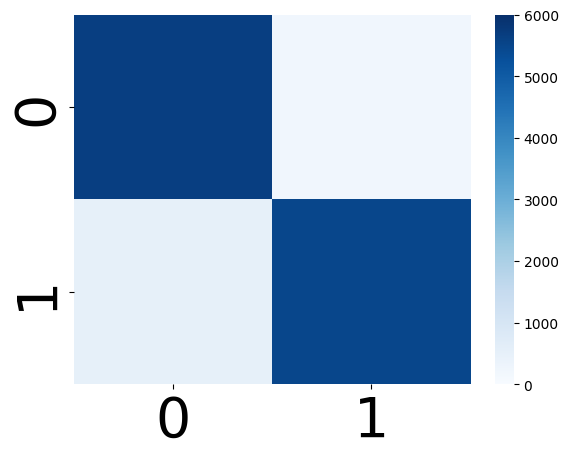

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,rf_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

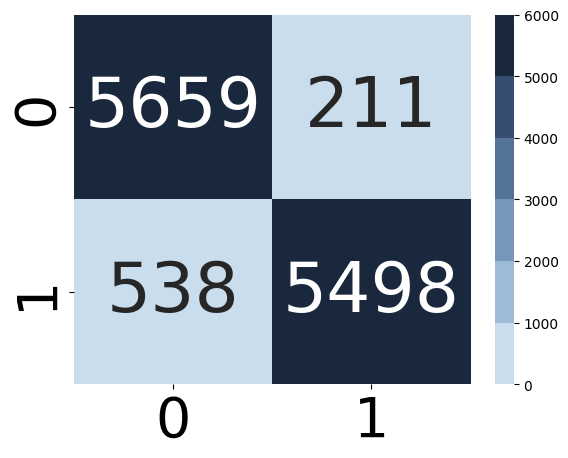

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,rf_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.937091
Recall 0.910868
precision 0.963041
F1 score: 0.936228
ROCAUC score: 0.9374613195331136
Accuracy score: 0.9370905425835713
F1 score: 0.9362281822051937
Cohens kappa: 0.874253
ROC AUC: 0.937461
[[5659  211]
 [ 538 5498]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucrf = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucrf= aucrf.round(4)

<Axes: >

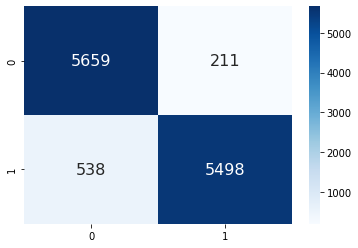

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

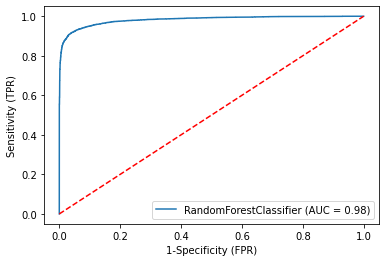

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(rf_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

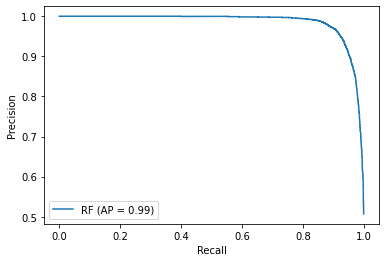

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf_model, Xt_test, Yt_test, name="RF"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

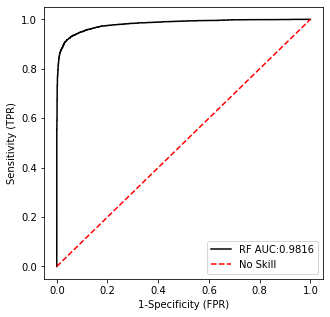

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprrf,tprrf,label="RF AUC:"+str(aucrf), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-22-80ae7ab1b6b9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-22-80ae7ab1b6b9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.

[0.11075894 0.06212535 0.05338993 0.0497629  0.04810394 0.0467622
 0.04518242 0.04267049 0.04121191 0.03978088 0.03803283 0.03674793
 0.03501176 0.0339539  0.03342328 0.03214917 0.03146663 0.03058172
 0.0300945  0.02974242 0.02896938 0.02813686 0.02735906 0.02643187
 0.02590441 0.02479004 0.02390137 0.02340378 0.02283952 0.02231318
 0.02170088 0.02116044 0.0206276  0.02005647 0.01949078 0.01913438
 0.01901277 0.01820039 0.01757359 0.01731944 0.01674617 0.01600293
 0.01589751 0.01534355 0.01489904 0.01455837 0.0144505  0.01375756
 0.01332742 0.01283282 0.01251165 0.01208779 0.01147309 0.01119636
 0.01087742 0.01035032 0.00988062 0.00962359 0.00949515 0.00906998
 0.00864582 0.00845395 0.00769102 0.00730961 0.00712007 0.00682232
 0.00658686 0.00647862 0.00641497 0.00603401 0.00560843 0.00565208
 0.00548348 0.00516689 0.00504924 0.00493911 0.00474524 0.00430118
 0.00430118 0.0042365  0.00386972 0.00310186 0.00265986 0.00228689
 0.00209514 0.00184214 0.00177325 0.00176467 0.00157328 0.00131

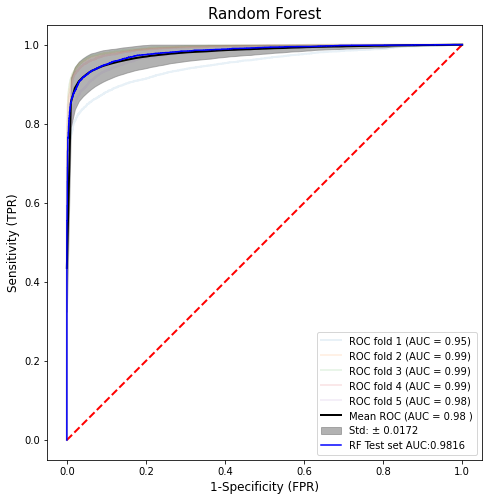

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.989


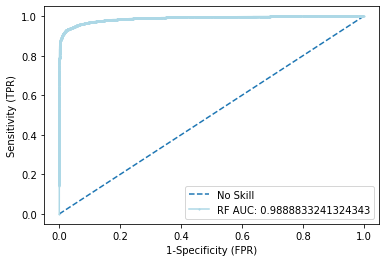

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
rf_auc = roc_auc_score(Yt_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(Yt_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker="D", label="RF AUC: "+str(rf_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##LR

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, dpchm["Target"],test_size=0.2, random_state=42)

In [ ]:

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/asexualsLR_HPTFInal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = lr_model.score(Xt_test, Yt_test)
print(result)


0.7875860910465312


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(Xt_test)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())

1    8333
0    3573
dtype: int64


<Axes: >

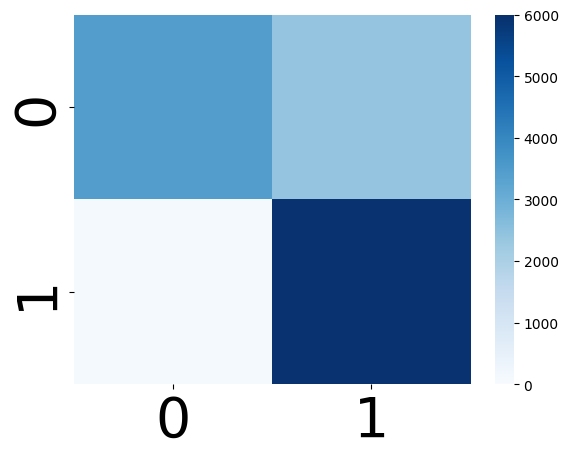

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,lr_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

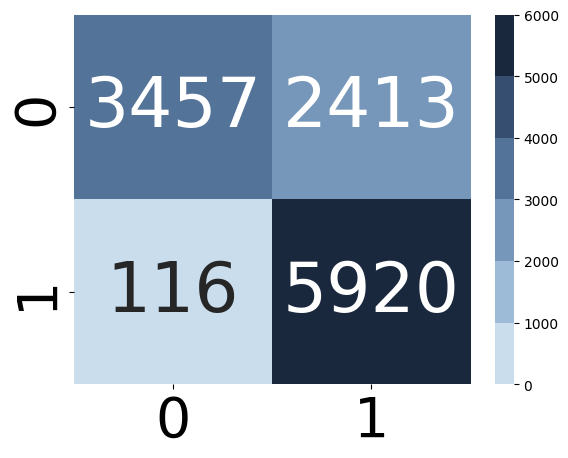

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,lr_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lr_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lr_predict))
print('Accuracy score:',accuracy_score(Yt_test, lr_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lr_predict)
print(matrix)

Accuracy: 0.787586
Recall 0.980782
precision 0.710428
F1 score: 0.823996
ROCAUC score: 0.7848543604923555
Accuracy score: 0.7875860910465312
F1 score: 0.8239961027211357
Cohens kappa: 0.572791
ROC AUC: 0.784854
[[3457 2413]
 [ 116 5920]]


<Axes: >

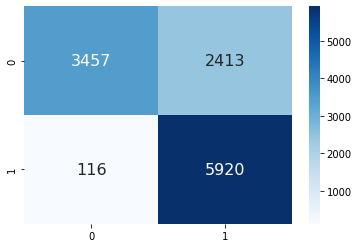

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

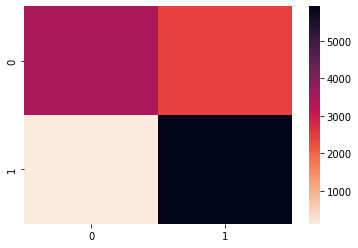

In [ ]:

import seaborn as sns
cmap = sns.cm.rocket_r
sns.heatmap(cm, cmap = cmap)

Text(0.5, 0, 'Recall')

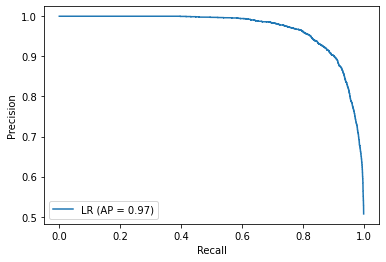

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lr_model, Xt_test, Yt_test, name="LR"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

Text(0.5, 0, '1-Specificity (FPR)')

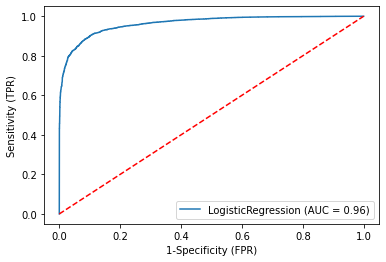

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

In [ ]:

import matplotlib.pyplot as plt

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
y_pred_proba

array([0.81021059, 0.3704365 , 0.16135081, ..., 1.        , 0.04802546,
       0.99835054])

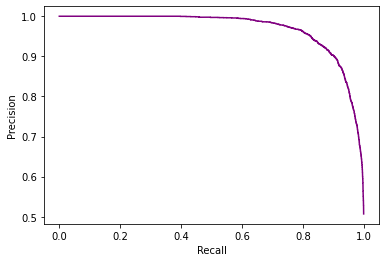

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
#ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
fprlr, tprlr, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

auclr = metrics.roc_auc_score(Yt_test, y_pred_proba)
auclr= auclr.round(4)
auclr

0.9632

<ipython-input-39-de1c144ddffe>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-39-de1c144ddffe>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-39-de1c144ddffe>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-39-de1c144ddffe>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-39-de1c144ddffe>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[6.81366660e-02 6.80437163e-02 6.93571245e-02 6.43383223e-02
 6.15410117e-02 5.56420060e-02 5.44462084e-02 5.24923957e-02
 5.15617166e-02 5.10451964e-02 4.98924427e-02 4.88073692e-02
 4.66071514e-02 4.50005332e-02 4.35344931e-02 4.18600719e-02
 4.07405096e-02 3.85970290e-02 3.72570820e-02 3.58771544e-02
 3.51181801e-02 3.34615764e-02 3.32688265e-02 3.24772457e-02
 3.22843640e-02 3.17541901e-02 3.08945520e-02 2.99803304e-02
 2.93567748e-02 2.89897599e-02 2.78386223e-02 2.71904535e-02
 2.62736591e-02 2.54561546e-02 2.47689035e-02 2.34053959e-02
 2.25950786e-02 2.23484739e-02 2.21150147e-02 2.16159402e-02
 2.04647562e-02 1.98893162e-02 1.91871581e-02 1.83723096e-02
 1.76054847e-02 1.70824078e-02 1.66128788e-02 1.59421217e-02
 1.55284826e-02 1.51766546e-02 1.45484640e-02 1.40876767e-02
 1.33795402e-02 1.30254978e-02 1.21489414e-02 1.18044829e-02
 1.11264390e-02 1.09503640e-02 1.03287551e-02 9.93333165e-03
 9.45130954e-03 9.08958617e-03 8.32730523e-03 8.06587800e-03
 7.65103124e-03 7.412532

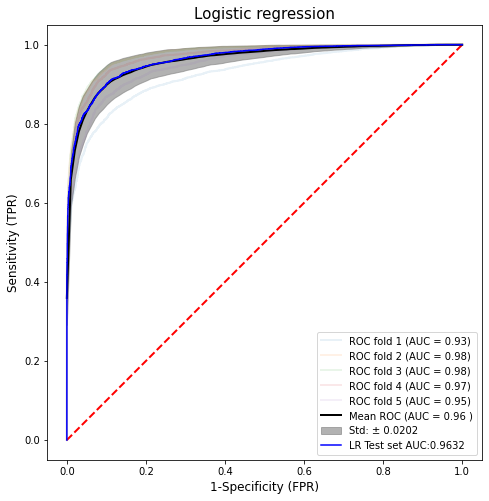

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

KeyboardInterrupt: ignored

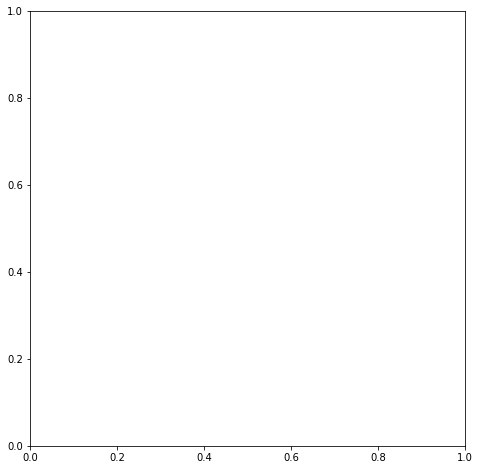

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

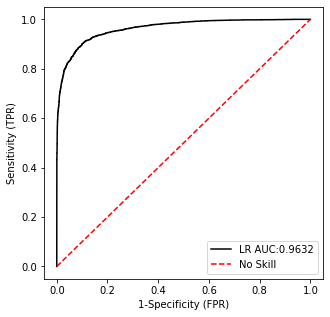

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
fprlr,tprlr, thresholds = roc_curve(Yt_test, lr_model.predict(Xt_test))

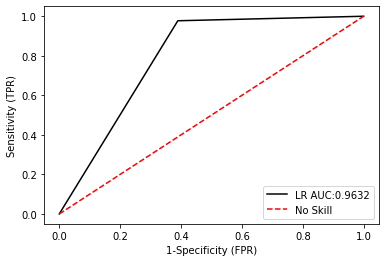

In [ ]:
#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.964


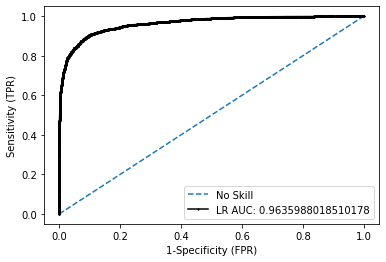

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
lr_auc = roc_auc_score(Yt_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Yt_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker="D", label="LR AUC: "+str(lr_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, dpchm["Target"],test_size=0.2, random_state=42)

In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/asexualsGBM_HPTFInal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# load the model from disk
Yt_test= np.where(Yt_test== 1, "Yes", "No")
result = gbm_model.score(Xt_test, Yt_test)
print(result)


0.9412061145640853


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(Xt_test)
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())


gbm_predict= np.where(gbm_predict== "Yes", 1, 0)
Yt_test= np.where(Yt_test== "Yes", 1, 0)

No     6058
Yes    5848
dtype: int64


In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,gbm_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 50}, fmt='d',vmin=0, vmax=6000)# font size

<Axes: >

<Axes: >

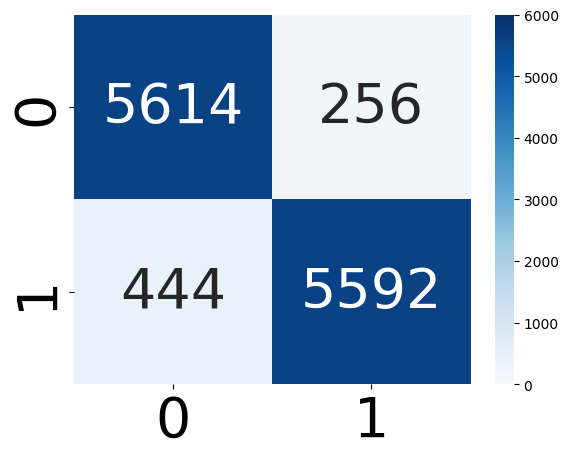

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=6000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,gbm_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, gbm_predict))
print('Accuracy score:',accuracy_score(Yt_test, gbm_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, gbm_predict)
print(matrix)

Accuracy: 0.941206
Recall 0.926441
precision 0.956224
F1 score: 0.823996
ROCAUC score: 0.9414148837807906
Accuracy score: 0.9412061145640853
F1 score: 0.8239961027211357
Cohens kappa: 0.882441
ROC AUC: 0.941415
[[5614  256]
 [ 444 5592]]


<Axes: >

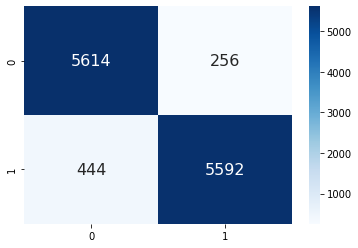

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]
fprgbm, tprgbm, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucgbm= metrics.roc_auc_score(Yt_test, y_pred_proba)
aucgbm= aucgbm.round(4)
aucgbm

0.9835

<ipython-input-67-1d0eb4d8ff8a>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-67-1d0eb4d8ff8a>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-67-1d0eb4d8ff8a>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-67-1d0eb4d8ff8a>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-67-1d0eb4d8ff8a>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[1.40880438e-01 6.11239942e-02 5.75816555e-02 5.47454106e-02
 5.00507532e-02 4.88442867e-02 4.67317370e-02 4.50806856e-02
 4.34404152e-02 4.29952825e-02 4.23413599e-02 4.10379404e-02
 4.00605390e-02 3.99011589e-02 3.92842836e-02 3.77831071e-02
 3.71437633e-02 3.58287671e-02 3.45354091e-02 3.39934302e-02
 3.32275593e-02 3.25309815e-02 3.16851080e-02 3.08354700e-02
 2.98641895e-02 2.92576035e-02 2.87304974e-02 2.78550713e-02
 2.74715759e-02 2.68019197e-02 2.62333712e-02 2.50992170e-02
 2.44961595e-02 2.37632856e-02 2.31091883e-02 2.26266178e-02
 2.18612930e-02 2.15651019e-02 2.08027221e-02 2.06116552e-02
 2.01171918e-02 1.96058158e-02 1.95241476e-02 1.89515211e-02
 1.84383222e-02 1.81561060e-02 1.79426652e-02 1.71098697e-02
 1.66813334e-02 1.64121876e-02 1.56877829e-02 1.55776691e-02
 1.50294038e-02 1.48047484e-02 1.42516704e-02 1.37426646e-02
 1.31730313e-02 1.25350290e-02 1.22849694e-02 1.15986879e-02
 1.08889675e-02 1.04383428e-02 9.99643121e-03 9.62020899e-03
 9.43989680e-03 9.197398

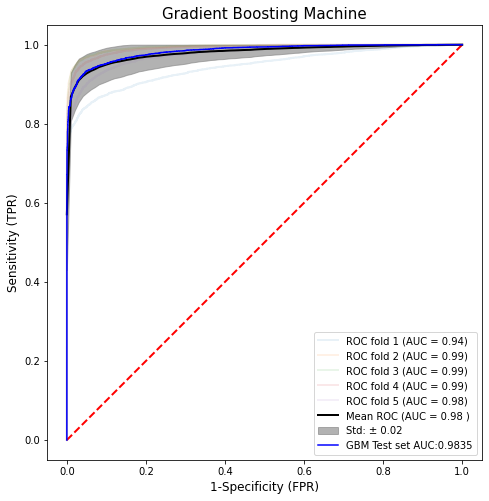

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Text(0.5, 0, '1-Specificity (FPR)')

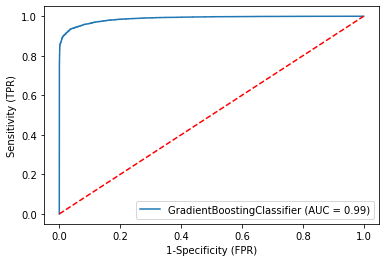

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gbm_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

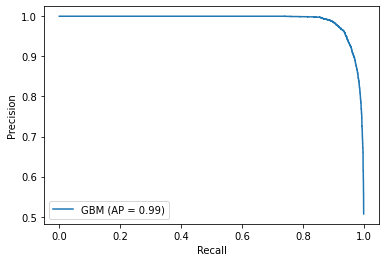

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gbm_model, Xt_test, Yt_test, name="GBM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

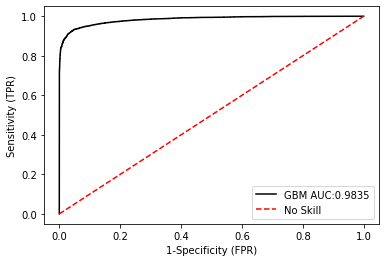

In [ ]:
#create ROC curve
plt.plot(fprgbm, tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
GBM: ROC AUC=0.988


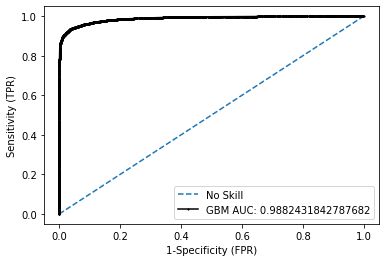

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
gbm_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
gbm_auc = roc_auc_score(Yt_test, gbm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBM: ROC AUC=%.3f' % (gbm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(Yt_test, gbm_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gbm_fpr, gbm_tpr, marker="D", label="GBM AUC: "+str(gbm_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




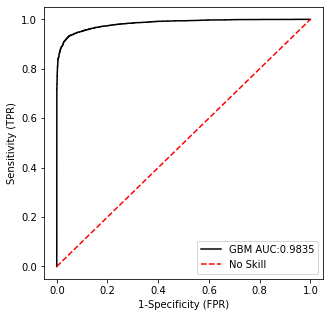

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

### SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/asexualsSVCFinalHPT_UMFP_model5005.pkl')

#Plots

##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/asexualsRF_HPTFinal_UMACCS_model.pkl')

## SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/asexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')

##LR

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/asexualsLR_HPTFInal_UMACCS_model.pkl')

##GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/asexualsGBM_HPTFInal_UMACCS_model.pkl')

#Graphs

<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-18-e79ba2f6d085>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
/usr/local

[0.16212625 0.0482931  0.04326865 0.03953337 0.03707853 0.03090593
 0.02690055 0.02389222 0.02389543 0.02389543 0.02389543 0.02389543
 0.02389543 0.02389543 0.02389543 0.02389543 0.02389543 0.02383009
 0.02369942 0.02369942 0.02363409 0.02363409 0.02356876 0.02350344
 0.02343811 0.02343811 0.02343811 0.02343811 0.02343811 0.02337279
 0.02337279 0.02337279 0.02337279 0.02324216 0.02324216 0.02324216
 0.02324216 0.02317684 0.02317684 0.02317684 0.02317684 0.02317684
 0.02317684 0.02317684 0.02317684 0.02317684 0.02247546 0.02208356
 0.02137179 0.02062367 0.02025021 0.01969931 0.01940096 0.01871892
 0.0179174  0.01715207 0.01692547 0.0164861  0.01596234 0.01542467
 0.01522798 0.01504227 0.01470669 0.0143537  0.01428808 0.01382873
 0.01348264 0.0129578  0.01265281 0.01241438 0.01203773 0.01165596
 0.01120864 0.010858   0.01052943 0.01000379 0.00969377 0.00919388
 0.00906245 0.00874716 0.0080242  0.00736714 0.00651328 0.00617536
 0.00597811 0.00569788 0.00543488 0.00484326 0.00425181 0.0035

<ipython-input-18-e79ba2f6d085>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-18-e79ba2f6d085>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter a

[0.11075894 0.06212535 0.05338993 0.0497629  0.04810394 0.0467622
 0.04518242 0.04267049 0.04121191 0.03978088 0.03803283 0.03674793
 0.03501176 0.0339539  0.03342328 0.03214917 0.03146663 0.03058172
 0.0300945  0.02974242 0.02896938 0.02813686 0.02735906 0.02643187
 0.02590441 0.02479004 0.02390137 0.02340378 0.02283952 0.02231318
 0.02170088 0.02116044 0.0206276  0.02005647 0.01949078 0.01913438
 0.01901277 0.01820039 0.01757359 0.01731944 0.01674617 0.01600293
 0.01589751 0.01534355 0.01489904 0.01455837 0.0144505  0.01375756
 0.01332742 0.01283282 0.01251165 0.01208779 0.01147309 0.01119636
 0.01087742 0.01035032 0.00988062 0.00962359 0.00949515 0.00906998
 0.00864582 0.00845395 0.00769102 0.00730961 0.00712007 0.00682232
 0.00658686 0.00647862 0.00641497 0.00603401 0.00560843 0.00565208
 0.00548348 0.00516689 0.00504924 0.00493911 0.00474524 0.00430118
 0.00430118 0.0042365  0.00386972 0.00310186 0.00265986 0.00228689
 0.00209514 0.00184214 0.00177325 0.00176467 0.00157328 0.00131

<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-18-e79ba2f6d085>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[1.14740695e-01 5.94348668e-02 5.80433677e-02 5.45071570e-02
 5.18646076e-02 5.07013947e-02 4.87508880e-02 4.65135466e-02
 4.47290422e-02 4.32418818e-02 4.23109483e-02 4.13676430e-02
 4.07519554e-02 3.97743799e-02 3.90147686e-02 3.75017098e-02
 3.61508991e-02 3.49188390e-02 3.42808515e-02 3.31663249e-02
 3.22689437e-02 3.16583696e-02 3.12338423e-02 3.07612214e-02
 3.00086360e-02 2.92187582e-02 2.85222746e-02 2.73307912e-02
 2.63882935e-02 2.59190696e-02 2.55569171e-02 2.52694434e-02
 2.46150367e-02 2.34879933e-02 2.28288441e-02 2.26399372e-02
 2.24407738e-02 2.15716647e-02 2.08936896e-02 2.05522432e-02
 1.99759083e-02 1.93843630e-02 1.88731048e-02 1.81316487e-02
 1.78311013e-02 1.73006818e-02 1.70837874e-02 1.66774487e-02
 1.62080702e-02 1.58905056e-02 1.54122468e-02 1.49005248e-02
 1.40919753e-02 1.40492789e-02 1.31129796e-02 1.25354711e-02
 1.23513387e-02 1.19167627e-02 1.16065198e-02 1.13476468e-02
 1.11385714e-02 1.06302333e-02 1.02517133e-02 9.92762422e-03
 9.61401210e-03 9.315543

<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
<ipython-input-18-e79ba2f6d085>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))


[6.81366660e-02 6.80437163e-02 6.93571245e-02 6.43383223e-02
 6.15410117e-02 5.56420060e-02 5.44462084e-02 5.24923957e-02
 5.15617166e-02 5.10451964e-02 4.98924427e-02 4.88073692e-02
 4.66071514e-02 4.50005332e-02 4.35344931e-02 4.18600719e-02
 4.07405096e-02 3.85970290e-02 3.72570820e-02 3.58771544e-02
 3.51181801e-02 3.34615764e-02 3.32688265e-02 3.24772457e-02
 3.22843640e-02 3.17541901e-02 3.08945520e-02 2.99803304e-02
 2.93567748e-02 2.89897599e-02 2.78386223e-02 2.71904535e-02
 2.62736591e-02 2.54561546e-02 2.47689035e-02 2.34053959e-02
 2.25950786e-02 2.23484739e-02 2.21150147e-02 2.16159402e-02
 2.04647562e-02 1.98893162e-02 1.91871581e-02 1.83723096e-02
 1.76054847e-02 1.70824078e-02 1.66128788e-02 1.59421217e-02
 1.55284826e-02 1.51766546e-02 1.45484640e-02 1.40876767e-02
 1.33795402e-02 1.30254978e-02 1.21489414e-02 1.18044829e-02
 1.11264390e-02 1.09503640e-02 1.03287551e-02 9.93333165e-03
 9.45130954e-03 9.08958617e-03 8.32730523e-03 8.06587800e-03
 7.65103124e-03 7.412532

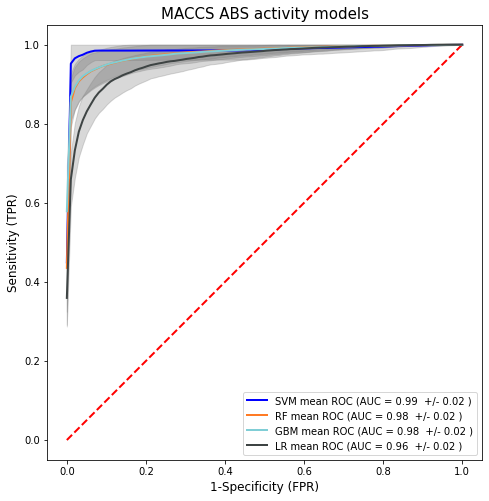

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('MACCS ABS activity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

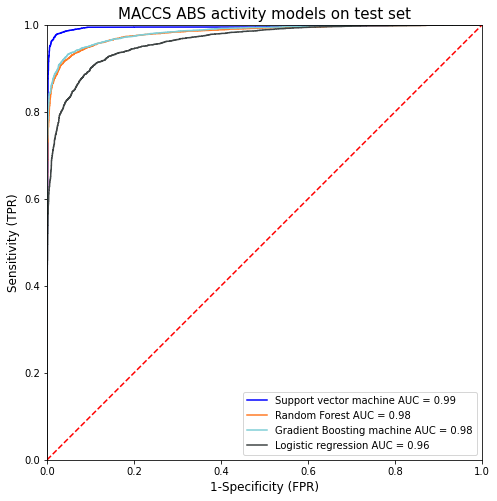

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS ABS activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

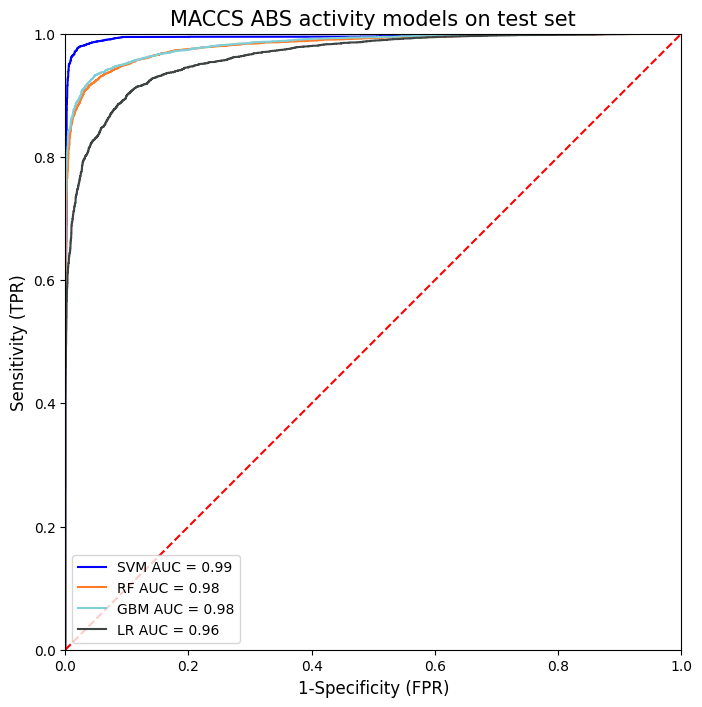

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS ABS activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.9955
0.9852
0.9868
0.9687


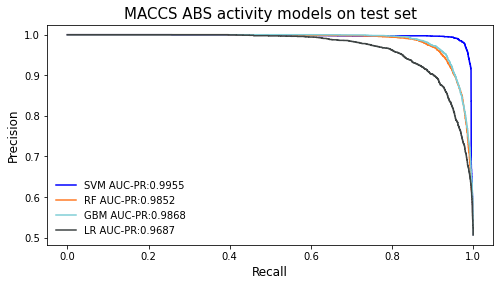

In [ ]:
#define metrics
#create precision recall curve
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS ABS activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

#Duals

In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 8.2 MB/s eta 0:00:00

real	0m15.353s
user	0m8.390s
sys	0m0.864s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp




In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
############################################Sexual data
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

Smiles S_Hit
0     NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12   Yes
1              Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1   Yes
2                      COc1c(C)cnc(CN(C)C2CCCCC2)c1C   Yes
3              Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1   Yes
4                 CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C   Yes
...                                              ...   ...
9886        Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1    No
9887            COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21    No
9888             CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2    No
9889            CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1    No
9890              Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1    No

[9891 rows x 2 columns]

# Molecular Morgan Fingerprint (MFP)

Smiles S_Hit  Target  \
0  NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12   Yes       1   
1           Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1   Yes       1   
2                   COc1c(C)cnc(CN(C)C2CCCCC2)c1C   Yes       1   
3           Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1   Yes       1   
4              CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C   Yes       1   

                                               ROMol  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
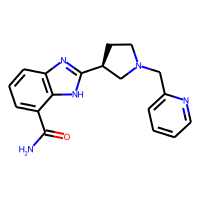
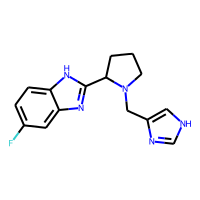
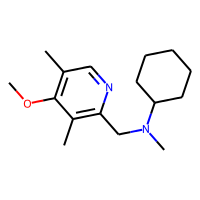
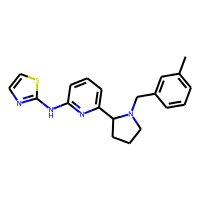
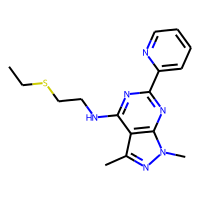

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
sxl.head()

## NB WE are using 5 insteat of 2 atom radius, 500 bits

Smiles S_Hit  Target  \
0     NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12   Yes       1   
1              Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1   Yes       1   
2                      COc1c(C)cnc(CN(C)C2CCCCC2)c1C   Yes       1   
3              Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1   Yes       1   
4                 CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C   Yes       1   
...                                              ...   ...     ...   
9886        Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1    No       0   
9887            COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21    No       0   
9888             CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2    No       0   
9889            CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1    No       0   
9890              Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1    No       0   

                                                  ROMol  \
0     <img data-content="rdkit/molecule" src="data:i...   
1     <img data-content="rdkit/molecule" src="data:i...   
2     <img data-content="rdkit/molecule" src="data:i...   
3     <img data-content="rdkit/molecule" src="data:i...   
4     <img data-content="rdkit/molecule" src="data:i...   
...                                                 ...   
9886  <img data-content="rdkit/molecule" src="data:i...   
9887  <img data-content="rdkit/molecule" src="data:i...   
9888  <img data-content="rdkit/molecule" src="data:i...   
9889  <img data-content="rdkit/molecule" src="data:i...   
9890  <img data-content="rdkit/molecule" src="data:i...   

                                                  Input  
0     [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...  
4     [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...  
...                                                 ...  
9886  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...  
9887  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...  
9888  [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...  
9889  [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...  
9890  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...  

[9891 rows x 5 columns]
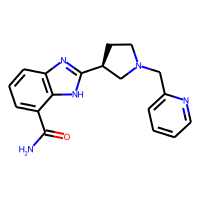
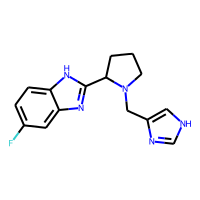
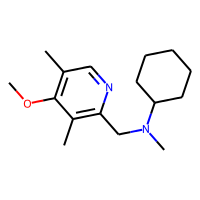
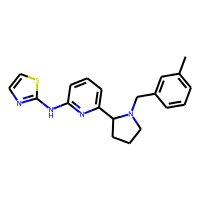
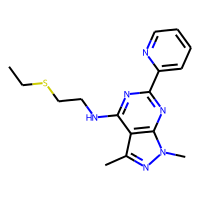
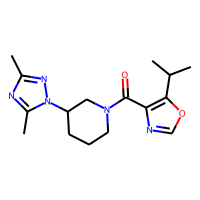
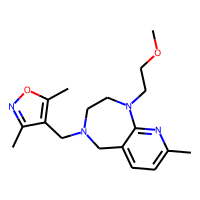
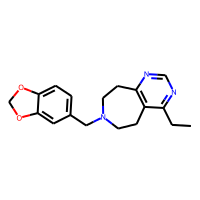
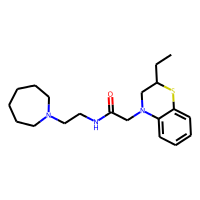
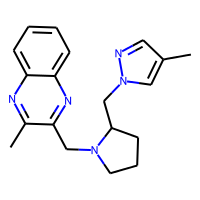

In [ ]:


def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

sxl["Input"] = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
sxl

In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
mfp= []
mfp = sxl["ROMol"].apply(get_input) # adding the input column to the dataframe
print(type(mfp))
mfp

<class 'pandas.core.series.Series'>


0       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
                              ...                        
9886    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...
9887    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
9888    [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
9889    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
9890    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
Name: ROMol, Length: 9891, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0     1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
4     1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9886  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
9887  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
9888  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
9889  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
9890  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0   

      493  494  495  496  497  498  499  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     1.0  0.0  1.0  0.0  0.0  1.0  1.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
9886  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
9887  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9888  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9889  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9890  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[9891 rows x 500 columns]

In [ ]:
#df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0     1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
4     1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9886  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
9887  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
9888  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
9889  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
9890  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0   

      493  494  495  496  497  498  499  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     1.0  0.0  1.0  0.0  0.0  1.0  1.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
9886  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
9887  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9888  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9889  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9890  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[9891 rows x 500 columns]

In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

##SVM

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsSVCFinalHPT_UMFP_model5005.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = svc_model.score(Xt_test, Yt_test)
print(result)


0.9762506316321374


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svc_predict = svc_model.predict(Xt_test)
p= svc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    1825
1     154
dtype: int64


<Axes: >

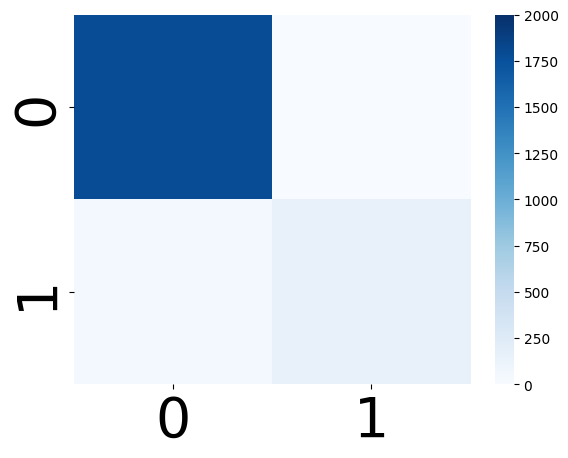

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,svc_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

<Axes: >

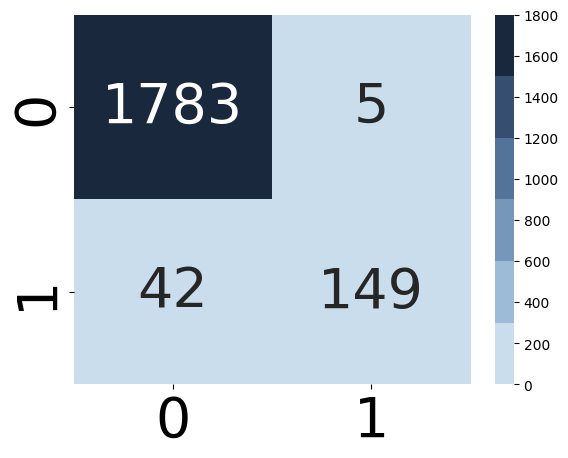

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,svc_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Accuracy: 0.976251
Recall 0.780105
precision 0.967532
F1 score: 0.863768
ROCAUC score: 0.8886541457301146
Accuracy score: 0.9762506316321374
F1 score: 0.863768115942029
Cohens kappa: 0.850923
ROC AUC: 0.888654
[[1783    5]
 [  42  149]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]
fprs, tprs, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucs = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucs= aucs.round(4)

In [ ]:
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]
fprs, tprs, _ = metrics.roc_curve(Yt_test,  y_pred_proba)
fprs

array([0.        , 0.00279642, 1.        ])

<AxesSubplot:>

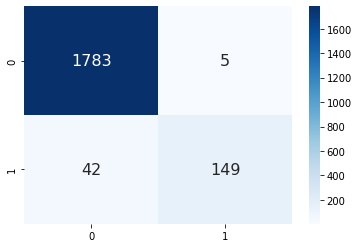

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

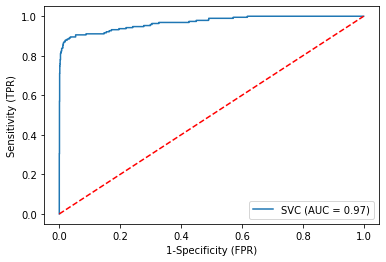

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(svc_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

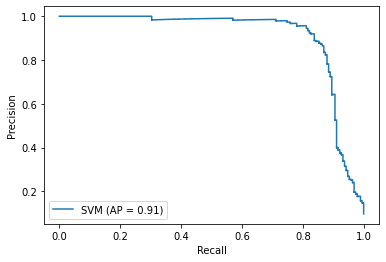

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc_model, Xt_test, Yt_test, name="SVM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

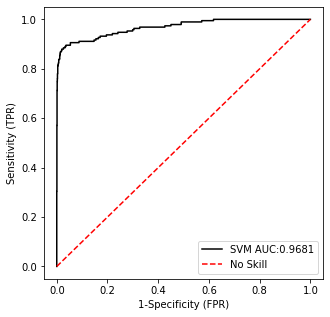

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprs,tprs,label="SVM AUC:"+str(aucs), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

<ipython-input-157-e282aa5ac6f5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-157-e282aa5ac6f5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-157-e282aa5ac6f5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-157-e282aa5ac6f5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-157-e282aa5ac6f5>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-157-e282aa5ac6f5>:19: DeprecationWarning: scipy.in

[0.33341027 0.25355515 0.21106319 0.19171732 0.18231844 0.1701198
 0.16110154 0.16031325 0.15629145 0.13644761 0.13555737 0.13100603
 0.12724261 0.123645   0.1106347  0.10729539 0.1042744  0.10126828
 0.10126828 0.10126828 0.10126828 0.10037795 0.09453398 0.08551108
 0.0824942  0.07949658 0.07702067 0.07311752 0.07217424 0.06908804
 0.06908804 0.06908804 0.06908804 0.06908804 0.06908804 0.06847826
 0.06847826 0.06847826 0.06536216 0.06226088 0.05917677 0.05858484
 0.05546674 0.05236604 0.04928602 0.04623081 0.04320567 0.04320567
 0.04250264 0.04250264 0.04204148 0.04211168 0.04187252 0.04188663
 0.04188663 0.04188663 0.03864432 0.03864432 0.03540543 0.03217098
 0.02894245 0.02894245 0.01932216 0.01615877 0.01615877 0.01615877
 0.01626808 0.01626808 0.01626808 0.01308869 0.01308869 0.01308869
 0.00996212 0.00996212 0.00996212 0.00996212 0.00996212 0.00652174
 0.00652174 0.00652174 0.00652174 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

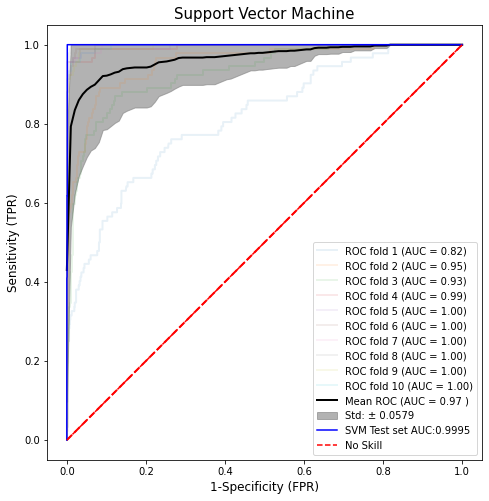

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.946


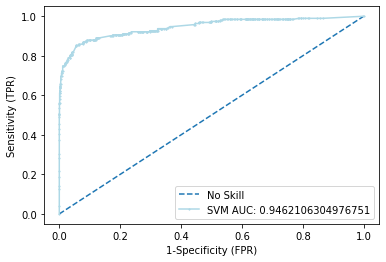

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
svc_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
svc_auc = roc_auc_score(Yt_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(Yt_test, svc_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svc_fpr, svc_tpr, marker="D", label="SVM AUC: "+str(svc_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/sexualsRFFinalHPT_UMFP_model5005.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = rf_model.score(Xt_test, Yt_test)
print(result)


0.956543708943911


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    1870
1     109
dtype: int64


<Axes: >

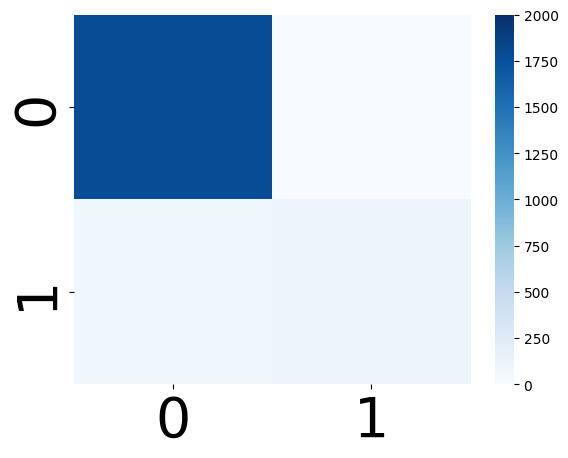

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,rf_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,rf_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

<Axes: >

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.956544
Recall 0.560209
precision 0.981651
F1 score: 0.713333
ROCAUC score: 0.7795454279255537
Accuracy score: 0.956543708943911
F1 score: 0.7133333333333333
Cohens kappa: 0.691712
ROC AUC: 0.779545
[[1786    2]
 [  84  107]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucrf = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucrf= aucrf.round(4)

<AxesSubplot:>

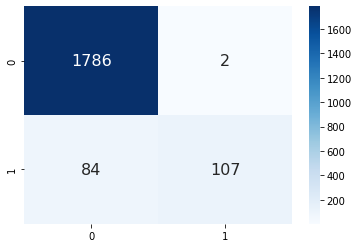

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

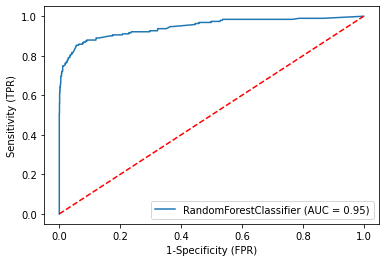

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(rf_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

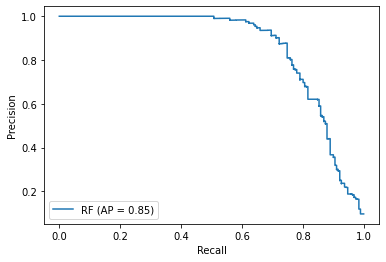

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf_model, Xt_test, Yt_test, name="RF"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

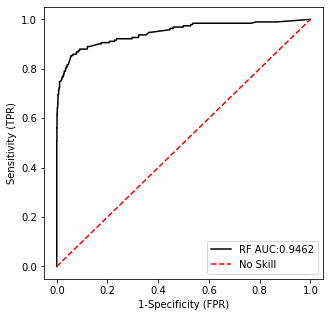

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprrf,tprrf,label="RF AUC:"+str(aucrf), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.946


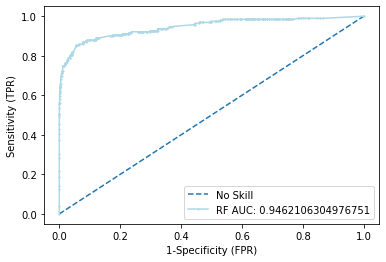

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
rf_auc = roc_auc_score(Yt_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(Yt_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker="D", label="RF AUC: "+str(rf_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##LR

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/sexualsLRFinalHPT_UMFP_model5005.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = lr_model.score(Xt_test, Yt_test)
print(result)


0.9282465891864579


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(Xt_test)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())

0    1724
1     255
dtype: int64


<Axes: >

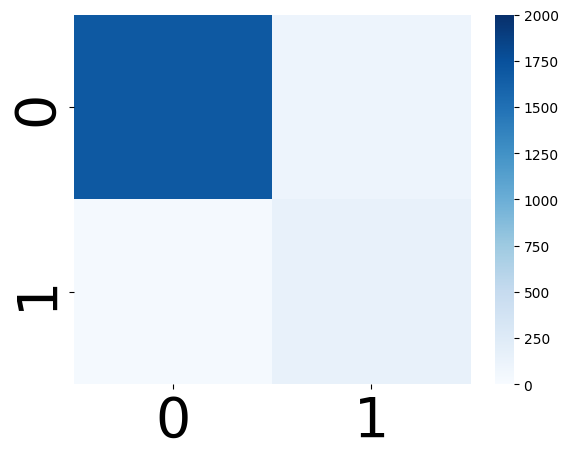

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,lr_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

<Axes: >

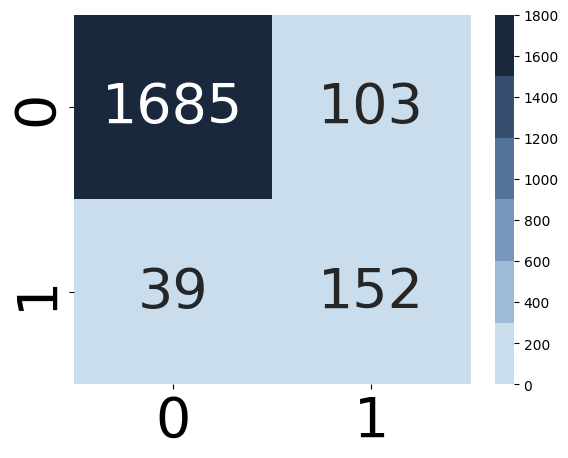

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,lr_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lr_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lr_predict))
print('Accuracy score:',accuracy_score(Yt_test, lr_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lr_predict)
print(matrix)

Accuracy: 0.928247
Recall 0.795812
precision 0.596078
F1 score: 0.681614
ROCAUC score: 0.8691026271712522
Accuracy score: 0.9282465891864579
F1 score: 0.6816143497757847
Cohens kappa: 0.642117
ROC AUC: 0.869103
[[1685  103]
 [  39  152]]


<AxesSubplot:>

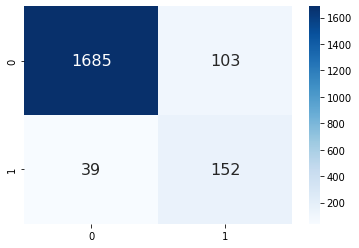

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<AxesSubplot:>

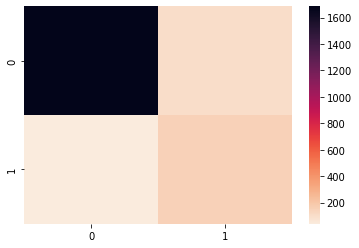

In [ ]:

import seaborn as sns
cmap = sns.cm.rocket_r
sns.heatmap(cm, cmap = cmap)

Text(0.5, 0, 'Recall')

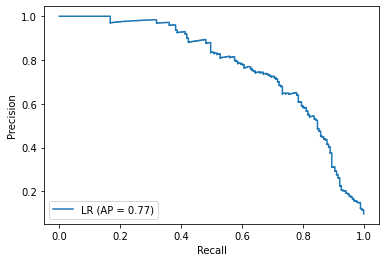

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lr_model, Xt_test, Yt_test, name="LR"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, '1-Specificity (FPR)')

In [ ]:

import matplotlib.pyplot as plt

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
y_pred_proba

array([3.79205084e-08, 9.99999007e-01, 1.94848613e-05, ...,
       4.79509388e-01, 2.21214597e-12, 4.40134764e-01])

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
#ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
fprlr, tprlr, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

auclr = metrics.roc_auc_score(Yt_test, y_pred_proba)
auclr= auclr.round(4)
auclr

0.9944

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
#fprlr,tprlr, thresholds = roc_curve(Yt_test, lr_model.predict(Xt_test))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.935


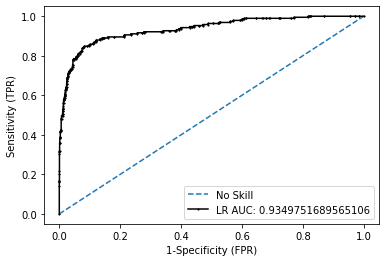

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
lr_auc = roc_auc_score(Yt_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Yt_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker="D", label="LR AUC: "+str(lr_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/sexualsGBMFinalHPT_UMFP_model5005.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# load the model from disk

result = gbm_model.score(Xt_test, Yt_test)
print(result)


0.9610914603335018


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(Xt_test)
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    1853
1     126
dtype: int64


In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,gbm_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

<Axes: >

<Axes: >

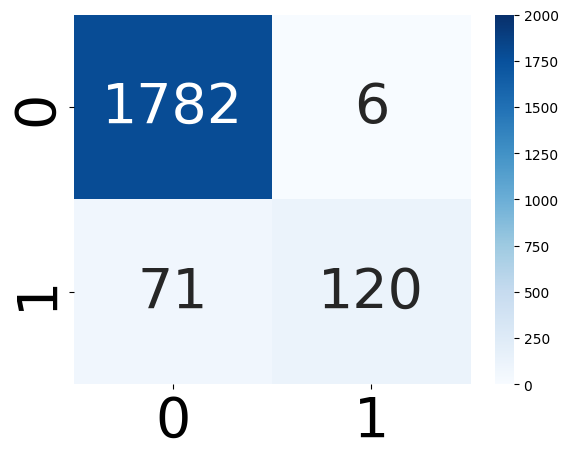

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=2000)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,gbm_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, gbm_predict))
print('Accuracy score:',accuracy_score(Yt_test, gbm_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, gbm_predict)
print(matrix)

Accuracy: 0.961091
Recall 0.628272
precision 0.952381
F1 score: 0.681614
ROCAUC score: 0.812458273305457
Accuracy score: 0.9610914603335018
F1 score: 0.6816143497757847
Cohens kappa: 0.736913
ROC AUC: 0.812458
[[1782    6]
 [  71  120]]


<AxesSubplot:>

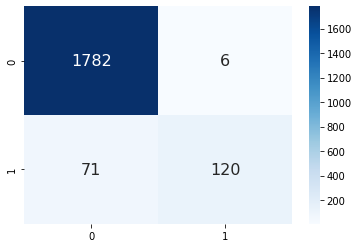

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]
fprgbm, tprgbm, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucgbm= metrics.roc_auc_score(Yt_test, y_pred_proba)
aucgbm= aucgbm.round(4)
aucgbm

0.948

Text(0.5, 0, '1-Specificity (FPR)')

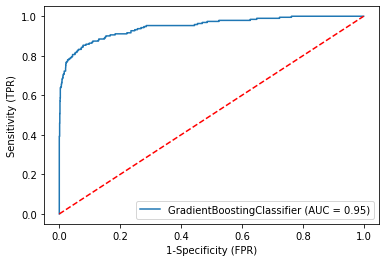

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gbm_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

Text(0.5, 0, 'Recall')

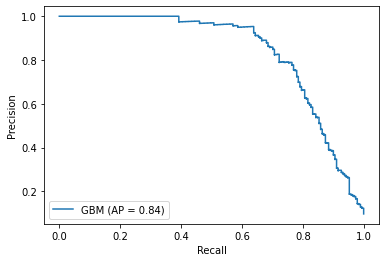

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gbm_model, Xt_test, Yt_test, name="GBM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

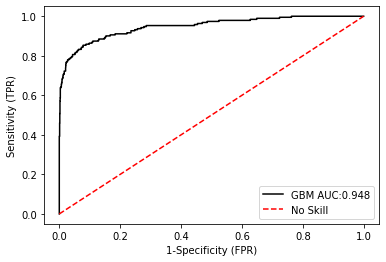

In [ ]:
#create ROC curve
plt.plot(fprgbm, tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
GBM: ROC AUC=0.948


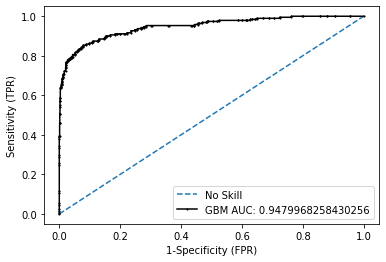

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
gbm_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
gbm_auc = roc_auc_score(Yt_test, gbm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBM: ROC AUC=%.3f' % (gbm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(Yt_test, gbm_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gbm_fpr, gbm_tpr, marker="D", label="GBM AUC: "+str(gbm_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




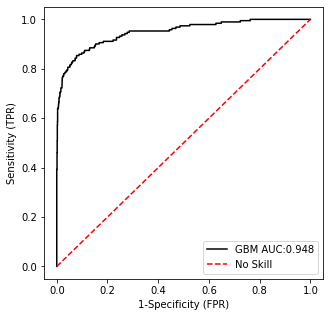

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

# Dual graphs compiled

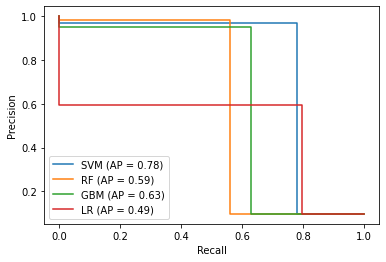

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(Yt_test, svc_predict, ax=ax,name = "SVM")
PrecisionRecallDisplay.from_predictions(Yt_test, rf_predict, ax=ax,name = "RF")
PrecisionRecallDisplay.from_predictions(Yt_test, gbm_predict, ax=ax, name = "GBM")
PrecisionRecallDisplay.from_predictions(Yt_test, lr_predict, ax=ax,name = "LR")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-130-b51475724831>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-130-b51475724831>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.

[0.36097175 0.28116799 0.25869259 0.24800608 0.23687134 0.23546715
 0.23115089 0.23046087 0.22604095 0.21755597 0.20904871 0.20495394
 0.20109406 0.19556449 0.1915217  0.18447654 0.17777502 0.17165326
 0.16546905 0.16251549 0.1545456  0.14839606 0.14796604 0.14182278
 0.13426547 0.13134232 0.13073481 0.12607503 0.12250122 0.1206026
 0.11878338 0.11708661 0.11255084 0.11081848 0.10909954 0.10739464
 0.10570448 0.10338944 0.10103586 0.0986331  0.09536655 0.09272762
 0.09082224 0.08778275 0.08616362 0.08537713 0.08302792 0.08016861
 0.07990354 0.08034112 0.07972866 0.07972866 0.07682328 0.06972964
 0.05836738 0.05836738 0.05752142 0.05752142 0.05685019 0.05685019
 0.05254696 0.04885372 0.04406733 0.04406733 0.04406733 0.04406733
 0.04406733 0.04406733 0.04370781 0.04192149 0.04131395 0.04094882
 0.03932805 0.03658794 0.03483917 0.03295485 0.03132137 0.03024409
 0.02918472 0.02814528 0.02712805 0.02613565 0.02517099 0.0242374
 0.0224707  0.02098169 0.01952033 0.01799805 0.0167158  0.015225

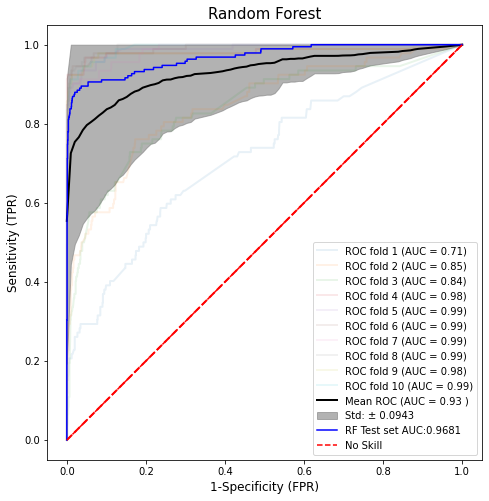

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=10,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-5463252270b6>:19: DeprecationWarning: scipy.in

[0.20590679 0.23424239 0.22454698 0.22374971 0.19128991 0.17857359
 0.17562237 0.17083514 0.15942971 0.15786599 0.15132667 0.14810641
 0.14568201 0.13105585 0.12246376 0.11814927 0.11814927 0.11514096
 0.11072887 0.10416847 0.10066328 0.10126683 0.09441473 0.08868831
 0.08656645 0.08604635 0.08353933 0.07718211 0.06846652 0.06707259
 0.06707259 0.06054708 0.06054708 0.0571345  0.05668862 0.05726433
 0.05473347 0.05473347 0.05522124 0.049154   0.04616687 0.04528841
 0.04528841 0.04222375 0.03919077 0.03919077 0.03919077 0.03919077
 0.03962549 0.03890333 0.03864432 0.03231754 0.03231754 0.03231754
 0.03231754 0.03226266 0.02908497 0.02908497 0.02908497 0.02592796
 0.02280019 0.02280019 0.02251339 0.02251339 0.02251339 0.02251339
 0.01615877 0.01615877 0.01615877 0.01630435 0.01630435 0.01304348
 0.00978261 0.00978261 0.00978261 0.00652174 0.00326087 0.00326087
 0.00326087 0.00326087 0.00326087 0.00326087 0.00326087 0.
 0.         0.         0.         0.         0.         0.
 0.        

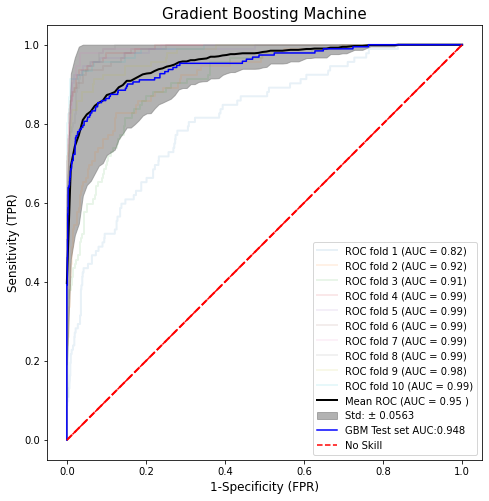

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=10,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-127-43e792a001a2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-127-43e792a001a2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-127-43e792a001a2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0

[0.17043114 0.19331176 0.20418088 0.21969001 0.21071998 0.21385513
 0.21040819 0.20548857 0.19144493 0.18505153 0.17955813 0.17579099
 0.17496982 0.1726811  0.1697261  0.16706826 0.15911606 0.14562596
 0.13811419 0.13830394 0.13260016 0.12551653 0.12439663 0.12458481
 0.12028858 0.11758624 0.11264476 0.10938845 0.10660435 0.10660435
 0.10343204 0.09564621 0.09525644 0.09245572 0.08624139 0.08643868
 0.08221445 0.08221445 0.08221445 0.08203462 0.08203462 0.07969697
 0.07605408 0.07596263 0.07581473 0.07518094 0.07118528 0.07118528
 0.06805424 0.06463508 0.06149715 0.0583727  0.05500687 0.05500687
 0.05473773 0.05154742 0.04847631 0.04847631 0.04528841 0.04513161
 0.04513161 0.04188663 0.04188663 0.03540543 0.03540543 0.03540543
 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209
 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209 0.02572209
 0.02572209 0.01932216 0.01630435 0.01630435 0.01304348 0.01304348
 0.01304348 0.01304348 0.01304348 0.01304348 0.00978261 0.0097

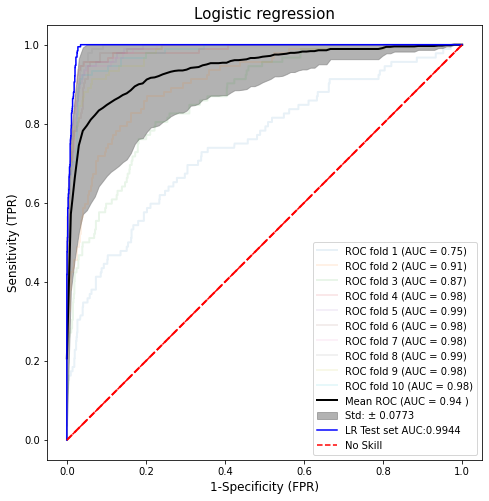

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=10,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


0.8881


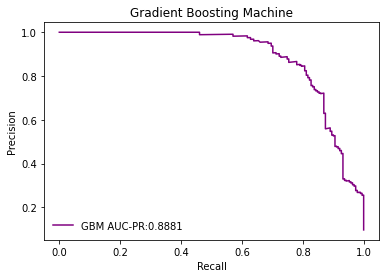

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="GBM AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Gradient Boosting Machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9974


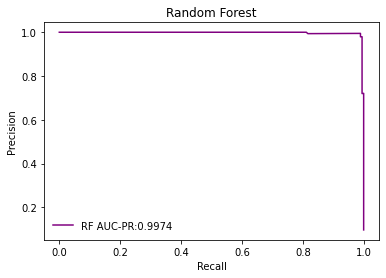

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="RF AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9449


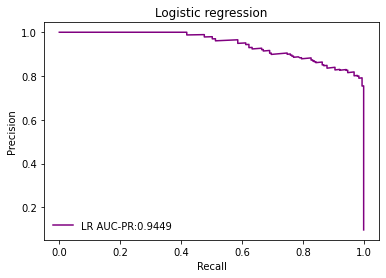

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="LR AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Logistic regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9929


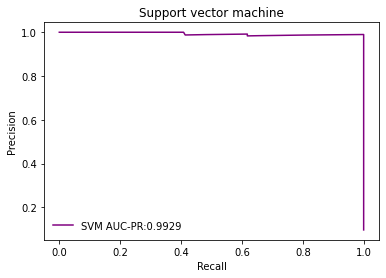

In [ ]:
# calculate precision-recall AUC

#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="SVM AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Support vector machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

0.9929
0.9449
0.8881
0.9974


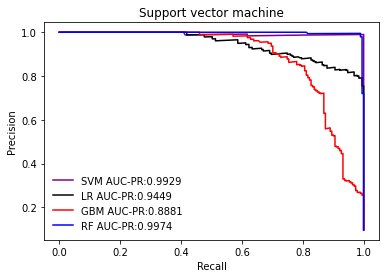

In [ ]:
#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

ax.plot(recall, precision, color='black',label="LR AUC-PR:"+str(auc_prc))
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

ax.plot(recall, precision, color='red',label="GBM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

ax.plot(recall, precision, color='blue',label="RF AUC-PR:"+str(auc_prc))

leg = ax.legend();
#add axis labels to plot
ax.set_title('Support vector machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left', frameon=False)
#display plot
plt.show()

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsSVCFinalHPT_UMFP_model5005.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/sexualsRFFinalHPT_UMFP_model5005.pkl')

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/sexualsLRFinalHPT_UMFP_model5005.pkl')

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/sexualsGBMFinalHPT_UMFP_model5005.pkl')

<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-42-630cf4fa1cff>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
/usr/local

[0.27394571 0.19571763 0.16750593 0.15692091 0.14511399 0.13441424
 0.12549048 0.1207545  0.10811712 0.10575574 0.10545527 0.10197328
 0.10110883 0.10110253 0.09964794 0.0975398  0.09543462 0.09123393
 0.08704768 0.08496065 0.08281728 0.07863354 0.0744686  0.06900915
 0.06679577 0.06473081 0.06253655 0.05829087 0.05616187 0.05406191
 0.05264995 0.05056757 0.05056757 0.04849323 0.04642799 0.04642799
 0.04632189 0.04423527 0.04008987 0.03803413 0.03790522 0.03790522
 0.03790522 0.03582288 0.03582288 0.03582288 0.03375208 0.0316951
 0.03157876 0.03157876 0.03161349 0.03161349 0.03161349 0.02736818
 0.02736818 0.02525861 0.02534994 0.02562804 0.02562804 0.02562804
 0.02346224 0.02173913 0.01956522 0.01521739 0.01521739 0.01521739
 0.01304348 0.01304348 0.01304348 0.01086957 0.00869565 0.00869565
 0.00869565 0.00652174 0.00652174 0.00434783 0.00434783 0.00434783
 0.00217391 0.00217391 0.00217391 0.00217391 0.00217391 0.00217391
 0.00217391 0.00217391 0.         0.         0.         0.
 0. 

<ipython-input-42-630cf4fa1cff>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-42-630cf4fa1cff>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter a

[0.27358497 0.2437456  0.22233157 0.1991497  0.19248105 0.18508421
 0.16726173 0.16320786 0.16566517 0.16757345 0.16526568 0.16078354
 0.1556497  0.15117606 0.14853131 0.14447293 0.13754951 0.1370884
 0.13822739 0.13190384 0.12591771 0.12948586 0.12892456 0.11888049
 0.11818795 0.11590261 0.11585667 0.10904105 0.10882499 0.10774245
 0.105845   0.10507417 0.10378147 0.10266953 0.10052889 0.09773023
 0.09494142 0.09216336 0.08930398 0.08638135 0.08347255 0.08057907
 0.07770262 0.0754805  0.07265798 0.07089375 0.06459907 0.06036596
 0.06044183 0.05831399 0.05838316 0.05978108 0.05978108 0.05764901
 0.05552018 0.05552018 0.05339499 0.05408088 0.05012372 0.04477004
 0.043555   0.043555   0.04148199 0.04152636 0.04152636 0.04152636
 0.04215131 0.04215131 0.04002408 0.04002408 0.04002408 0.03996685
 0.03660077 0.03345629 0.03233605 0.03157876 0.03026389 0.02884969
 0.02742752 0.02600952 0.02465077 0.02335861 0.02207214 0.02079243
 0.0195208  0.01825894 0.01700902 0.01577389 0.01449071 0.01317

<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-42-630cf4fa1cff>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[0.13909194 0.20273063 0.18392983 0.17982901 0.17380835 0.16881528
 0.16460684 0.15822358 0.14449742 0.13051806 0.12215559 0.12419678
 0.11639467 0.1121433  0.10601123 0.09856278 0.08657314 0.0823214
 0.07985429 0.0755922  0.07091436 0.06860573 0.06925702 0.06635594
 0.06753774 0.06340639 0.06349714 0.06139906 0.05721989 0.05925414
 0.05956925 0.05814666 0.05897647 0.05681421 0.05681421 0.05681421
 0.05681421 0.05534464 0.05352273 0.05188965 0.04818746 0.04818746
 0.04603118 0.04387663 0.04387663 0.04446843 0.04446843 0.04043361
 0.03827232 0.03611255 0.03611255 0.03395457 0.03395457 0.03395457
 0.02964562 0.02964562 0.02964562 0.02534994 0.02320938 0.02320938
 0.02107566 0.02107566 0.01895107 0.01474509 0.01267804 0.01267804
 0.01267804 0.01267804 0.01267497 0.01267497 0.01267497 0.01267497
 0.01053783 0.00841954 0.00841954 0.00841954 0.00869565 0.00869565
 0.00869565 0.00869565 0.00869565 0.00652174 0.00652174 0.00652174
 0.00434783 0.00217391 0.         0.         0.         0.
 0. 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-42-630cf4fa1cff>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

[0.05534173 0.15552932 0.15447476 0.1494976  0.16855042 0.16413103
 0.15111945 0.1413413  0.14061804 0.13196232 0.1253373  0.12035965
 0.11576623 0.1142144  0.11233494 0.11342957 0.10917331 0.10853361
 0.10729715 0.10741294 0.10385747 0.10506001 0.09957808 0.09660083
 0.09415344 0.09438798 0.09438798 0.09089483 0.09041744 0.08649004
 0.0821406  0.0792864  0.07344221 0.06961298 0.06584818 0.06526217
 0.06526217 0.06337161 0.06337161 0.05995667 0.05995667 0.05995667
 0.05604842 0.05604842 0.05032146 0.04930842 0.04930842 0.04930842
 0.04894067 0.04694579 0.0446178  0.04233019 0.04233019 0.04233019
 0.04008987 0.04002408 0.03790214 0.03790214 0.03578644 0.03578644
 0.03395457 0.03395457 0.03179877 0.03179877 0.02779511 0.02779511
 0.02779511 0.02779511 0.02779511 0.02779511 0.02562804 0.0212981
 0.01913616 0.01913616 0.01697729 0.01697729 0.01697729 0.01482281
 0.01482281 0.01267497 0.01053783 0.00869565 0.00652174 0.00652174
 0.00434783 0.00217391 0.00217391 0.00217391 0.00217391 0.00217

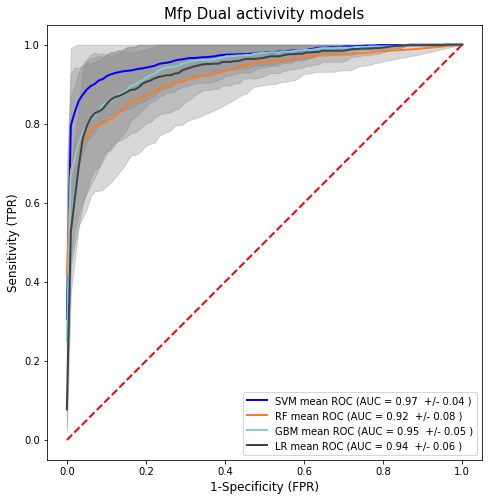

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Mfp Dual activivity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

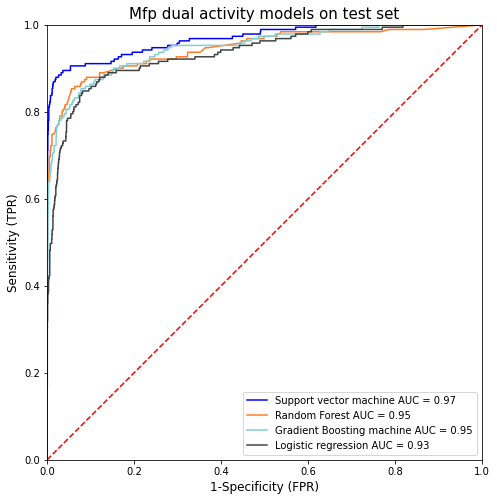

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

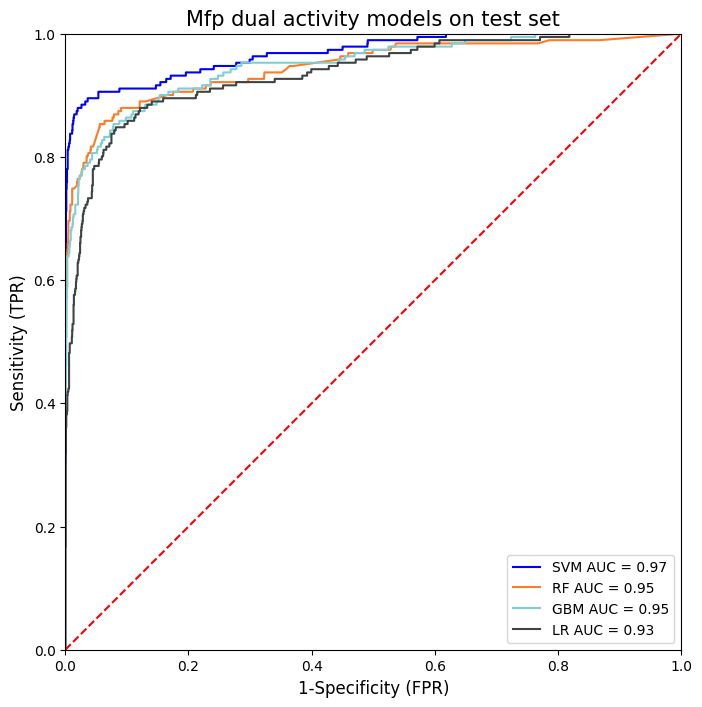

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.9084
0.8555
0.8372
0.7728


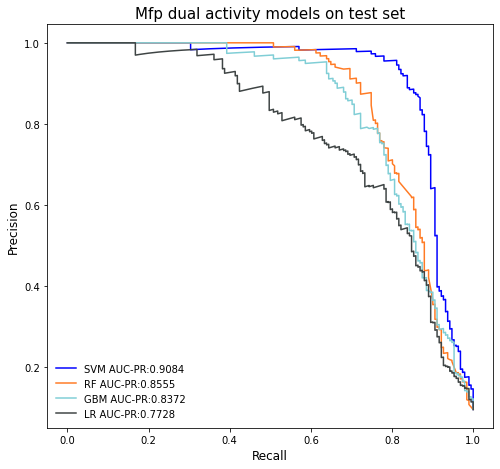

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp dual activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

#Dual MACCS

In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi==2021.09.1
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

real	0m8.723s
user	0m6.204s
sys	0m0.273s
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp




In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
############################################Sexual data
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_GBM_HPT5005_FeatureImpFinal.

Smiles S_Hit
0     NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12   Yes
1              Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1   Yes
2                      COc1c(C)cnc(CN(C)C2CCCCC2)c1C   Yes
3              Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1   Yes
4                 CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C   Yes
...                                              ...   ...
9886        Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1    No
9887            COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21    No
9888             CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2    No
9889            CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1    No
9890              Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1    No

[9891 rows x 2 columns]

Smiles S_Hit  Target  \
0  NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12   Yes       1   
1           Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1   Yes       1   
2                   COc1c(C)cnc(CN(C)C2CCCCC2)c1C   Yes       1   
3           Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1   Yes       1   
4              CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C   Yes       1   

                                               ROMol  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
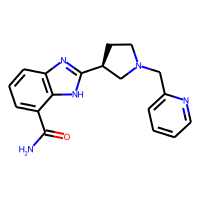
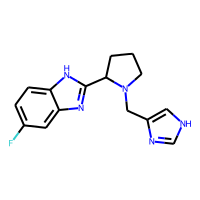
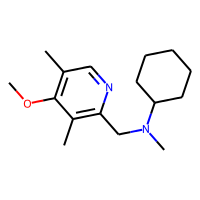
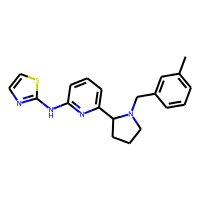
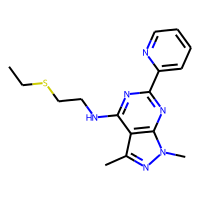

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(sxl,smilesCol="Smiles")
sxl.head()

In [ ]:

dchm= sxl["ROMol"]
dchm
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
df = pd.DataFrame(maccs)

In [ ]:
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

### SVC

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/sexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = svc_model.score(Xt_test, Yt_test)
print(result)


0.9717028802425467


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svc_predict = svc_model.predict(Xt_test)
p= svc_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    1804
1     175
dtype: int64


<Axes: >

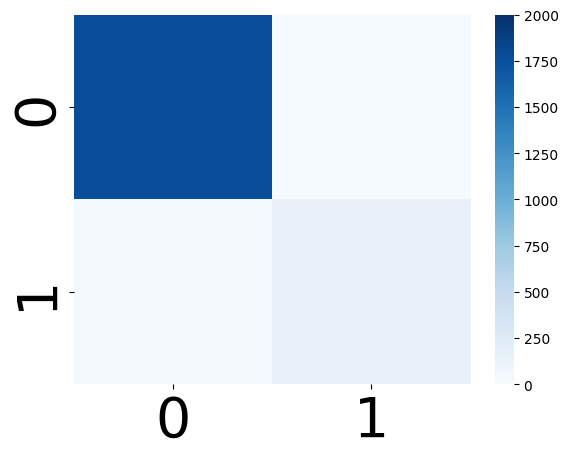

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,svc_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

<Axes: >

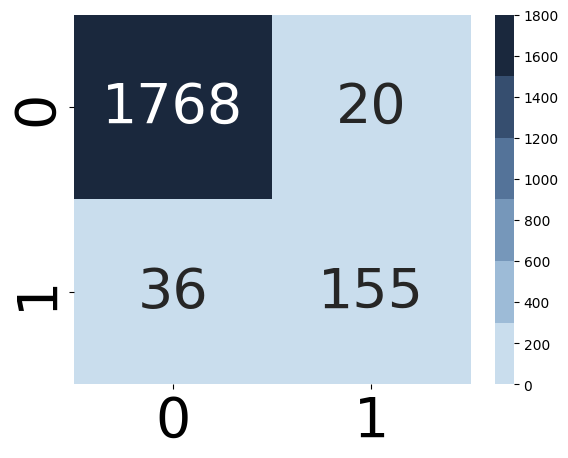

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,svc_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,svc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,svc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,svc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,svc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,svc_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, svc_predict))
print('Accuracy score:',accuracy_score(Yt_test, svc_predict))
print('F1 score:',f1_score(Yt_test, svc_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, svc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, svc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, svc_predict)
print(matrix)

Accuracy: 0.971703
Recall 0.811518
precision 0.885714
F1 score: 0.846995
ROCAUC score: 0.900166321140354
Accuracy score: 0.9717028802425467
F1 score: 0.8469945355191256
Cohens kappa: 0.831437
ROC AUC: 0.900166
[[1768   20]
 [  36  155]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]
fprs, tprs, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucs = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucs= aucs.round(4)

<Axes: >

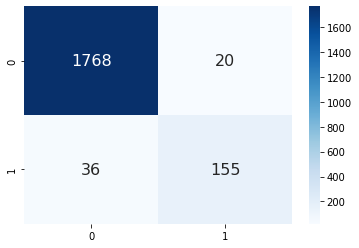

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

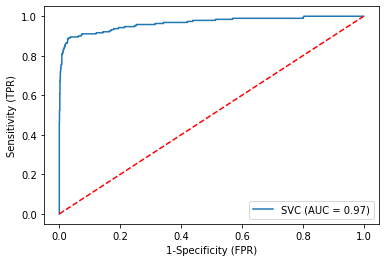

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(svc_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc_model, Xt_test, Yt_test, name="SVM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

Text(0.5, 0, 'Recall')

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprs,tprs,label="SVM AUC:"+str(aucs), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         #label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

<ipython-input-91-7ed338aae6c9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-91-7ed338aae6c9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-91-7ed338aae6c9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-91-7ed338aae6c9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-91-7ed338aae6c9>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[0.18240669 0.20481511 0.17852417 0.16975576 0.15873346 0.14993588
 0.14437481 0.14127494 0.1368797  0.12638823 0.11589089 0.10540162
 0.10193435 0.09573753 0.09340317 0.08784789 0.08848117 0.08847082
 0.08847771 0.08585604 0.08593705 0.08174113 0.07660377 0.07038814
 0.06683807 0.06683807 0.06683807 0.06473857 0.06322588 0.0645653
 0.0645653  0.05827947 0.05827947 0.05615038 0.05615038 0.05405045
 0.05275188 0.0506742  0.0443797  0.04435873 0.04432857 0.04228116
 0.04228116 0.04016145 0.03603776 0.03603776 0.03411828 0.03411828
 0.03411828 0.03411828 0.03015006 0.03015006 0.03015006 0.0279974
 0.02845961 0.02630312 0.02630312 0.02630312 0.02414974 0.0220004
 0.0220004  0.01771972 0.01837825 0.01837825 0.01837825 0.01626492
 0.01683907 0.01683907 0.01474509 0.01474509 0.01267804 0.01267804
 0.01065362 0.00870162 0.00870162 0.00688394 0.00688394 0.00688394
 0.00533956 0.00533956 0.00533956 0.00533956 0.00533956 0.00533956
 0.00533956 0.00533956 0.00533956 0.00533956 0.00533956 0.0053395

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
#fig1 = plt.figure(figsize=[8,8])
#ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

In [ ]:

from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = svc_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
prediction = svc_model.predict_proba(Xt_test)
fprs, tprs, t = roc_curve(Yt_test, prediction[:, 1])
aucs = auc(fprs, tprs)
aucs= aucs.round(4)
plt.plot(fprs,tprs,label="SVM Test set AUC:"+str(aucs), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Support Vector Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.996


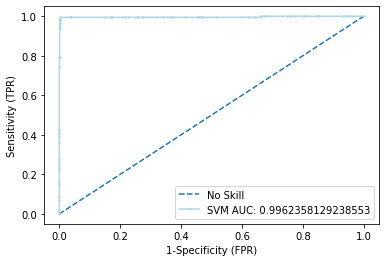

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
svc_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
svc_auc = roc_auc_score(Yt_test, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
svc_fpr, svc_tpr, _ = roc_curve(Yt_test, svc_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svc_fpr, svc_tpr, marker="D", label="SVM AUC: "+str(svc_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##RF

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRF_HPTFinal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = rf_model.score(Xt_test, Yt_test)
print(result)


0.9691763516927742


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(Xt_test)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    1839
1     140
dtype: int64


<Axes: >

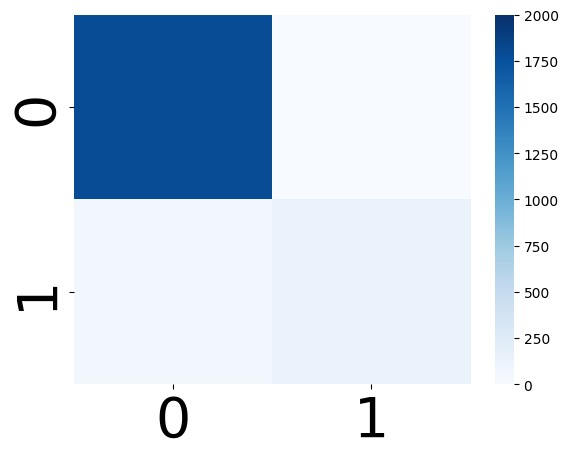

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,rf_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

<Axes: >

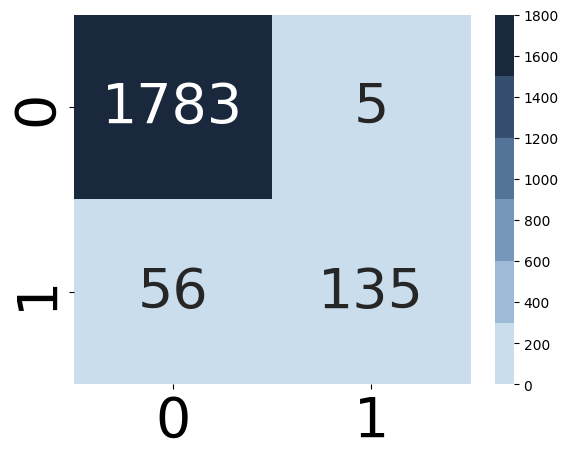

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,rf_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,rf_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, rf_predict))
print('Accuracy score:',accuracy_score(Yt_test, rf_predict))
print('F1 score:',f1_score(Yt_test, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, rf_predict)
print(matrix)

Accuracy: 0.969176
Recall 0.706806
precision 0.964286
F1 score: 0.815710
ROCAUC score: 0.8520049310704289
Accuracy score: 0.9691763516927742
F1 score: 0.8157099697885197
Cohens kappa: 0.799326
ROC AUC: 0.852005
[[1783    5]
 [  56  135]]


In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucrf = metrics.roc_auc_score(Yt_test, y_pred_proba)
aucrf= aucrf.round(4)

<Axes: >

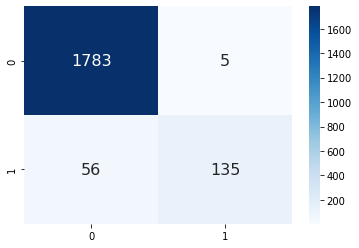

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(rf_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf_model, Xt_test, Yt_test, name="RF"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

Text(0.5, 0, 'Recall')

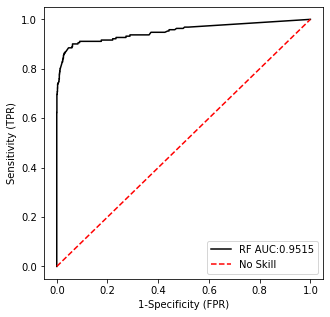

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprrf,tprrf,label="RF AUC:"+str(aucrf), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-104-11cdd35274f3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-104-11cdd35274f3>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.

[0.21510207 0.2060709  0.18625376 0.16890155 0.15508657 0.13671163
 0.12706166 0.1305816  0.11644394 0.10456933 0.10528995 0.10513439
 0.10540568 0.10585259 0.10023827 0.09444703 0.08832994 0.08446094
 0.08246663 0.07850663 0.07813748 0.07757887 0.07757887 0.066348
 0.06400419 0.06400419 0.06400419 0.05851096 0.05458625 0.05527897
 0.05289167 0.05093594 0.04780172 0.04780172 0.04567271 0.04144311
 0.03790522 0.03790522 0.03665559 0.03582288 0.03582288 0.03582288
 0.03375208 0.03375208 0.03375208 0.03367815 0.02879181 0.02743074
 0.02736837 0.02578673 0.02347451 0.02184919 0.0208588  0.020415
 0.01997119 0.01952739 0.01908358 0.01863978 0.01819597 0.01775217
 0.01730837 0.01686456 0.01642076 0.01597695 0.01553315 0.01508934
 0.01464554 0.01420174 0.01375793 0.01331413 0.01287032 0.01242652
 0.01198271 0.01153891 0.01109511 0.0106513  0.0102075  0.00976369
 0.00931989 0.00887608 0.00843228 0.00798848 0.00754467 0.00710087
 0.00665706 0.00621326 0.00576946 0.00532565 0.00488185 0.00443804

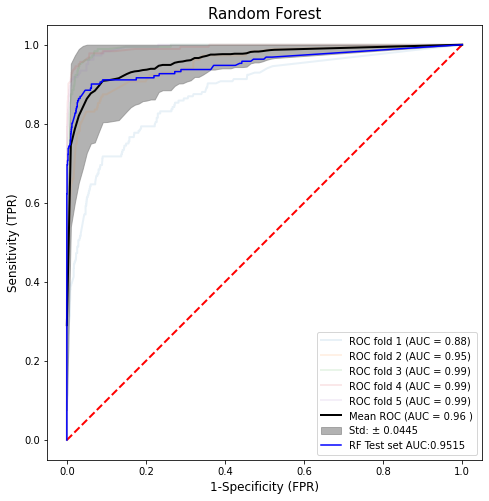

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = rf_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprrf,tprrf,label="RF Test set AUC:"+str(aucrf), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Random Forest',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.998


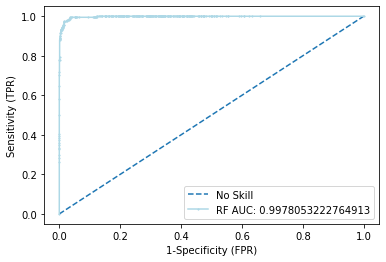

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
rf_auc = roc_auc_score(Yt_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(Yt_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker="D", label="RF AUC: "+str(rf_auc), color= "lightblue", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##LR

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/sexualsLR_HPTFInal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk

result = lr_model.score(Xt_test, Yt_test)
print(result)


0.9196563921172309


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(Xt_test)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())

0    1685
1     294
dtype: int64


<Axes: >

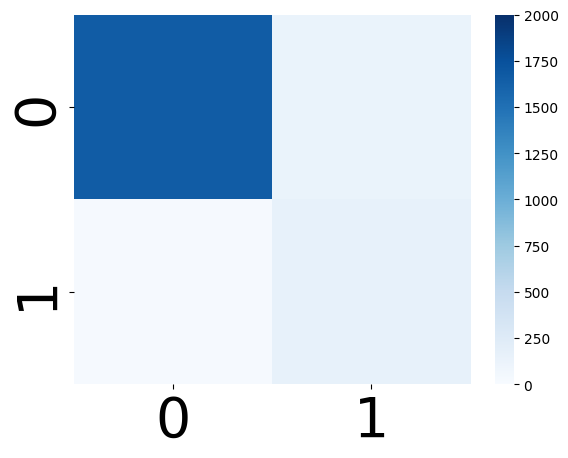

In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,lr_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

<Axes: >

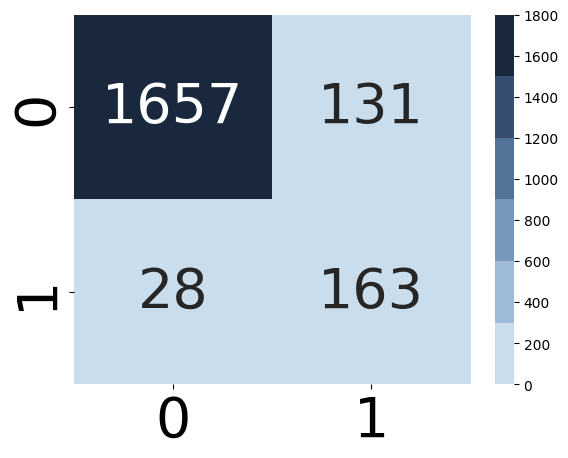

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,lr_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lr_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lr_predict))
print('Accuracy score:',accuracy_score(Yt_test, lr_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lr_predict)
print(matrix)

Accuracy: 0.919656
Recall 0.853403
precision 0.554422
F1 score: 0.672165
ROCAUC score: 0.8900684610609415
Accuracy score: 0.9196563921172309
F1 score: 0.6721649484536082
Cohens kappa: 0.628722
ROC AUC: 0.890068
[[1657  131]
 [  28  163]]


<Axes: >

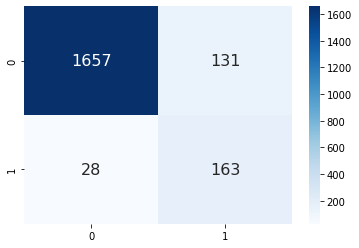

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:

import seaborn as sns
cmap = sns.cm.rocket_r
sns.heatmap(cm, cmap = cmap)

<Axes: >

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lr_model, Xt_test, Yt_test, name="LR"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

Text(0.5, 0, 'Recall')

In [ ]:
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

ns_auc = roc_auc_score(Yt_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)

RocCurveDisplay.from_estimator(lr_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

No Skill: ROC AUC=0.500


Text(0.5, 0, '1-Specificity (FPR)')

In [ ]:

import matplotlib.pyplot as plt

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
y_pred_proba

array([0.00650446, 0.34193268, 0.00061854, ..., 0.15758081, 0.00470327,
       0.1655592 ])

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
#ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]
fprlr, tprlr, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

auclr = metrics.roc_auc_score(Yt_test, y_pred_proba)
auclr= auclr.round(4)
auclr

0.9669

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc

from scipy import interp
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-49-51f8abbcb04c>:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

[0.22557123 0.19227886 0.1871158  0.15811592 0.15817737 0.13298749
 0.1104476  0.10438234 0.10032628 0.09686753 0.0856565  0.08106401
 0.07996584 0.07333776 0.06903757 0.06675418 0.06450046 0.06450046
 0.06506859 0.06078703 0.05856684 0.05856684 0.05431764 0.05019923
 0.0481841  0.0481841  0.04777224 0.04791864 0.04425977 0.04000086
 0.03787898 0.03787898 0.03787898 0.03800148 0.03824871 0.03824871
 0.03757401 0.03757401 0.03543945 0.03330998 0.03330998 0.02696418
 0.02696418 0.02500945 0.02500945 0.02211195 0.0200393  0.0200393
 0.0200393  0.0200393  0.0200393  0.02015494 0.01837825 0.01837825
 0.01837825 0.01837825 0.01626492 0.01626492 0.01626492 0.01626492
 0.01416992 0.01416992 0.01416992 0.01210279 0.01210279 0.01210279
 0.01210279 0.01008069 0.01008069 0.01008069 0.00813725 0.00813725
 0.00595352 0.00595352 0.00407022 0.00407022 0.00407022 0.00267221
 0.00267221 0.00267221 0.00267221 0.00267221 0.00267221 0.00266978
 0.00266978 0.00266978 0.00266978 0.00266978 0.00217391 0.00217

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = lr_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprlr,tprlr,label="LR Test set AUC:"+str(auclr), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Logistic regression',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="b")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

In [ ]:
fprlr,tprlr, thresholds = roc_curve(Yt_test, lr_model.predict(Xt_test))

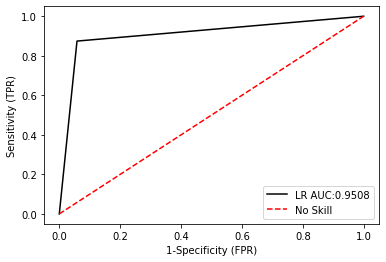

In [ ]:
#create ROC curve
plt.plot(fprlr,tprlr,label="LR AUC:"+str(auclr), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.962


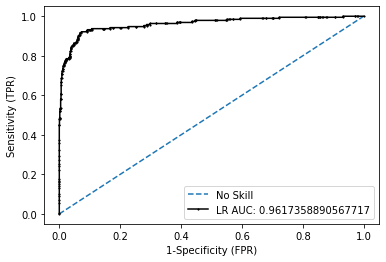

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
lr_auc = roc_auc_score(Yt_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Yt_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker="D", label="LR AUC: "+str(lr_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




##GBM

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/sexualsGBM_HPTFInal_UMACCS_model.pkl')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# load the model from disk
result = gbm_model.score(Xt_test, Yt_test)
print(result)


0.9676604345629105


In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(Xt_test)
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())


0    1832
1     147
dtype: int64


In [ ]:
import seaborn as sns
cm= confusion_matrix(Yt_test,gbm_predict)
fig, ax = plt.subplots()

ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap="Blues", annot=False,annot_kws={"size": 16}, fmt='d',vmin=0, vmax=2000)# font size

<Axes: >

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
cm= confusion_matrix(Yt_test,gbm_predict)
ax.tick_params(labelsize=40)
sns.heatmap(cm, cmap=sns.cubehelix_palette(start=-.19,rot=-0.05), annot=True,annot_kws={"size": 40}, fmt='d',vmin=0, vmax=1800)# font size

<Axes: >

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,gbm_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, gbm_predict))
print('Accuracy score:',accuracy_score(Yt_test, gbm_predict))
print('F1 score:',f1_score(Yt_test, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, gbm_predict)
print(matrix)

Accuracy: 0.967660
Recall 0.717277
precision 0.931973
F1 score: 0.810651
ROCAUC score: 0.8558423228738419
Accuracy score: 0.9676604345629105
F1 score: 0.8106508875739645
Cohens kappa: 0.793298
ROC AUC: 0.855842
[[1778   10]
 [  54  137]]


<Axes: >

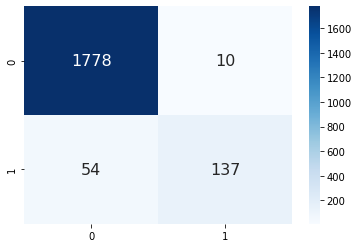

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
from sklearn import metrics

#define metrics
y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]
fprgbm, tprgbm, _ = metrics.roc_curve(Yt_test,  y_pred_proba)

aucgbm= metrics.roc_auc_score(Yt_test, y_pred_proba)
aucgbm= aucgbm.round(4)
aucgbm

0.9642

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<ipython-input-126-1a7479711c35>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-1a7479711c35>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-1a7479711c35>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-1a7479711c35>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-126-1a7479711c35>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


[0.22893725 0.19704134 0.16998    0.15502007 0.14522274 0.13037752
 0.11777195 0.11447899 0.11359261 0.10904437 0.09906168 0.09209154
 0.08915365 0.07850663 0.07458985 0.06748789 0.06242456 0.06004545
 0.06004545 0.0561443  0.05723068 0.05723068 0.05486382 0.05486382
 0.05428862 0.05224932 0.04820604 0.04795452 0.04774859 0.04774859
 0.04564968 0.03940179 0.03940179 0.03933798 0.04002408 0.03802491
 0.03802491 0.03802491 0.03802491 0.03827232 0.03827232 0.03827232
 0.03864199 0.03647153 0.03213202 0.02996317 0.02996317 0.02779511
 0.02779511 0.02391304 0.02391304 0.02391304 0.02391304 0.02391304
 0.02391304 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.0173913  0.0173913  0.0173913  0.0173913  0.0173913  0.01521739
 0.01521739 0.01521739 0.01304348 0.01304348 0.01304348 0.01086957
 0.01086957 0.01086957 0.00869565 0.00869565 0.00869565 0.00652174
 0.00652174 0.00652174 0.00652174 0.00652174 0.00434783 0.00434783
 0.00434783 0.00434783 0.00217391 0.00217391 0.00217391 0.0021

In [ ]:
x=df
y=dpchm["Target"]
random_state = np.random.RandomState(0)
clf = gbm_model
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.metrics import roc_curve,auc
# plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
std_tpr = np.std(tprs, axis=0)
mean_std_tpr = np.mean(std_tpr, axis=0)
mean_std_tpr= mean_std_tpr.round(4)
print(std_tpr )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.6,
    label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
plt.plot(fprgbm,tprgbm,label="GBM Test set AUC:"+str(aucgbm), color="blue")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('Gradient Boosting Machine',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


Text(0.5, 0, '1-Specificity (FPR)')

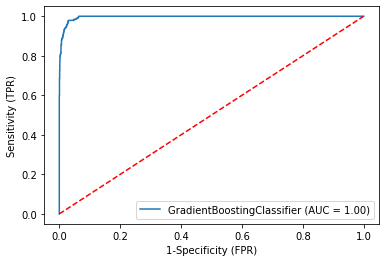

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gbm_model, Xt_test, Yt_test)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gbm_model, Xt_test, Yt_test, name="GBM"
)

plt.ylabel('Precision')
plt.xlabel('Recall')

Text(0.5, 0, 'Recall')

In [ ]:
#create ROC curve
plt.plot(fprgbm, tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

No Skill: ROC AUC=0.500
GBM: ROC AUC=0.996


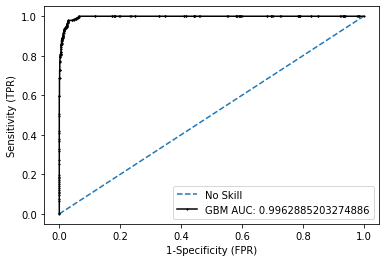

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Yt_test))]

# predict probabilities
gbm_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Yt_test, ns_probs)
gbm_auc = roc_auc_score(Yt_test, gbm_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBM: ROC AUC=%.3f' % (gbm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Yt_test, ns_probs)
gbm_fpr, gbm_tpr, _ = roc_curve(Yt_test, gbm_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gbm_fpr, gbm_tpr, marker="D", label="GBM AUC: "+str(gbm_auc), color= "black", markersize=1,markeredgewidth=1)
# axis labels
pyplot.ylabel('Sensitivity (TPR)')
pyplot.xlabel('1-Specificity (FPR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




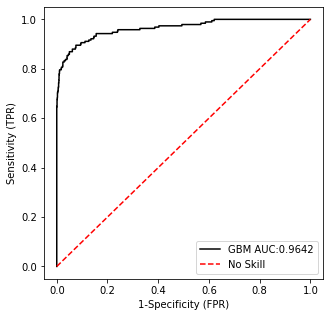

In [ ]:
plt.subplots(1, figsize=(5,5))

#create ROC curve
plt.plot(fprgbm,tprgbm,label="GBM AUC:"+str(aucgbm), color="black")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)')
plt.xlabel('1-Specificity (FPR)')
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-25-a3eb2a0cc8e2>:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-25-a3eb2a0cc8e2>:18: DeprecationWarning: scipy.interp is deprecated and will be removed i

[0.21510207 0.2060709  0.18625376 0.16890155 0.15508657 0.13671163
 0.12706166 0.1305816  0.11644394 0.10456933 0.10528995 0.10513439
 0.10540568 0.10585259 0.10023827 0.09444703 0.08832994 0.08446094
 0.08246663 0.07850663 0.07813748 0.07757887 0.07757887 0.066348
 0.06400419 0.06400419 0.06400419 0.05851096 0.05458625 0.05527897
 0.05289167 0.05093594 0.04780172 0.04780172 0.04567271 0.04144311
 0.03790522 0.03790522 0.03665559 0.03582288 0.03582288 0.03582288
 0.03375208 0.03375208 0.03375208 0.03367815 0.02879181 0.02743074
 0.02736837 0.02578673 0.02347451 0.02184919 0.0208588  0.020415
 0.01997119 0.01952739 0.01908358 0.01863978 0.01819597 0.01775217
 0.01730837 0.01686456 0.01642076 0.01597695 0.01553315 0.01508934
 0.01464554 0.01420174 0.01375793 0.01331413 0.01287032 0.01242652
 0.01198271 0.01153891 0.01109511 0.0106513  0.0102075  0.00976369
 0.00931989 0.00887608 0.00843228 0.00798848 0.00754467 0.00710087
 0.00665706 0.00621326 0.00576946 0.00532565 0.00488185 0.00443804

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-a3eb2a0cc8e2>:53: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[0.22557123 0.19227886 0.1871158  0.15811592 0.15817737 0.13298749
 0.1104476  0.10438234 0.10032628 0.09686753 0.0856565  0.08106401
 0.07996584 0.07333776 0.06903757 0.06675418 0.06450046 0.06450046
 0.06506859 0.06078703 0.05856684 0.05856684 0.05431764 0.05019923
 0.0481841  0.0481841  0.04777224 0.04791864 0.04425977 0.04000086
 0.03787898 0.03787898 0.03787898 0.03800148 0.03824871 0.03824871
 0.03757401 0.03757401 0.03543945 0.03330998 0.03330998 0.02696418
 0.02696418 0.02500945 0.02500945 0.02211195 0.0200393  0.0200393
 0.0200393  0.0200393  0.0200393  0.02015494 0.01837825 0.01837825
 0.01837825 0.01837825 0.01626492 0.01626492 0.01626492 0.01626492
 0.01416992 0.01416992 0.01416992 0.01210279 0.01210279 0.01210279
 0.01210279 0.01008069 0.01008069 0.01008069 0.00813725 0.00813725
 0.00595352 0.00595352 0.00407022 0.00407022 0.00407022 0.00267221
 0.00267221 0.00267221 0.00267221 0.00267221 0.00267221 0.00266978
 0.00266978 0.00266978 0.00266978 0.00266978 0.00217391 0.00217

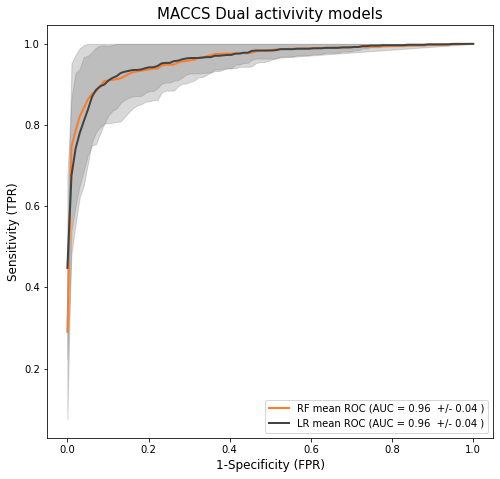

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('MACCS Dual activivity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

#Compiled graphs

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/sexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRF_HPTFinal_UMACCS_model.pkl')
lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/sexualsLR_HPTFInal_UMACCS_model.pkl')
gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/sexualsGBM_HPTFInal_UMACCS_model.pkl')

<ipython-input-26-8aae4f86122b>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-26-8aae4f86122b>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-26-8aae4f86122b>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-26-8aae4f86122b>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
<ipython-input-26-8aae4f86122b>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
/usr/local

[0.18240669 0.20481511 0.17852417 0.16975576 0.15873346 0.14993588
 0.14437481 0.14127494 0.1368797  0.12638823 0.11589089 0.10540162
 0.10193435 0.09573753 0.09340317 0.08784789 0.08848117 0.08847082
 0.08847771 0.08585604 0.08593705 0.08174113 0.07660377 0.07038814
 0.06683807 0.06683807 0.06683807 0.06473857 0.06322588 0.0645653
 0.0645653  0.05827947 0.05827947 0.05615038 0.05615038 0.05405045
 0.05275188 0.0506742  0.0443797  0.04435873 0.04432857 0.04228116
 0.04228116 0.04016145 0.03603776 0.03603776 0.03411828 0.03411828
 0.03411828 0.03411828 0.03015006 0.03015006 0.03015006 0.0279974
 0.02845961 0.02630312 0.02630312 0.02630312 0.02414974 0.0220004
 0.0220004  0.01771972 0.01837825 0.01837825 0.01837825 0.01626492
 0.01683907 0.01683907 0.01474509 0.01474509 0.01267804 0.01267804
 0.01065362 0.00870162 0.00870162 0.00688394 0.00688394 0.00688394
 0.00533956 0.00533956 0.00533956 0.00533956 0.00533956 0.00533956
 0.00533956 0.00533956 0.00533956 0.00533956 0.00533956 0.0053395

<ipython-input-26-8aae4f86122b>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
<ipython-input-26-8aae4f86122b>:54: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter a

[0.21510207 0.2060709  0.18625376 0.16890155 0.15508657 0.13671163
 0.12706166 0.1305816  0.11644394 0.10456933 0.10528995 0.10513439
 0.10540568 0.10585259 0.10023827 0.09444703 0.08832994 0.08446094
 0.08246663 0.07850663 0.07813748 0.07757887 0.07757887 0.066348
 0.06400419 0.06400419 0.06400419 0.05851096 0.05458625 0.05527897
 0.05289167 0.05093594 0.04780172 0.04780172 0.04567271 0.04144311
 0.03790522 0.03790522 0.03665559 0.03582288 0.03582288 0.03582288
 0.03375208 0.03375208 0.03375208 0.03367815 0.02879181 0.02743074
 0.02736837 0.02578673 0.02347451 0.02184919 0.0208588  0.020415
 0.01997119 0.01952739 0.01908358 0.01863978 0.01819597 0.01775217
 0.01730837 0.01686456 0.01642076 0.01597695 0.01553315 0.01508934
 0.01464554 0.01420174 0.01375793 0.01331413 0.01287032 0.01242652
 0.01198271 0.01153891 0.01109511 0.0106513  0.0102075  0.00976369
 0.00931989 0.00887608 0.00843228 0.00798848 0.00754467 0.00710087
 0.00665706 0.00621326 0.00576946 0.00532565 0.00488185 0.00443804

<ipython-input-26-8aae4f86122b>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-26-8aae4f86122b>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-26-8aae4f86122b>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-26-8aae4f86122b>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
<ipython-input-26-8aae4f86122b>:88: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, 

[0.24560021 0.20613743 0.16936679 0.15637603 0.14409488 0.13062216
 0.12870382 0.11870246 0.11164823 0.10329543 0.09428097 0.08395678
 0.08201355 0.07863823 0.07264607 0.0687049  0.06675326 0.064463
 0.06395762 0.06011449 0.0561443  0.05571405 0.05571405 0.05375147
 0.05180577 0.04987892 0.04987892 0.04941869 0.047062   0.04389217
 0.04389217 0.04389217 0.04389217 0.04162192 0.03724075 0.03726968
 0.03802491 0.03588335 0.03588335 0.03374593 0.03179877 0.03179877
 0.03179877 0.03179877 0.03179877 0.03213202 0.03213202 0.02779511
 0.02779511 0.02779511 0.02779511 0.02562804 0.02391304 0.02391304
 0.02391304 0.02391304 0.02173913 0.02173913 0.02173913 0.01956522
 0.01956522 0.0173913  0.0173913  0.01521739 0.01304348 0.01304348
 0.01304348 0.01304348 0.01304348 0.01304348 0.01304348 0.01086957
 0.01086957 0.01086957 0.00869565 0.00869565 0.00869565 0.00869565
 0.00869565 0.00869565 0.00869565 0.00652174 0.00652174 0.00434783
 0.00434783 0.00217391 0.00217391 0.00217391 0.00217391 0.002173

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-26-8aae4f86122b>:123: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

[0.22557123 0.19227886 0.1871158  0.15811592 0.15817737 0.13298749
 0.1104476  0.10438234 0.10032628 0.09686753 0.0856565  0.08106401
 0.07996584 0.07333776 0.06903757 0.06675418 0.06450046 0.06450046
 0.06506859 0.06078703 0.05856684 0.05856684 0.05431764 0.05019923
 0.0481841  0.0481841  0.04777224 0.04791864 0.04425977 0.04000086
 0.03787898 0.03787898 0.03787898 0.03800148 0.03824871 0.03824871
 0.03757401 0.03757401 0.03543945 0.03330998 0.03330998 0.02696418
 0.02696418 0.02500945 0.02500945 0.02211195 0.0200393  0.0200393
 0.0200393  0.0200393  0.0200393  0.02015494 0.01837825 0.01837825
 0.01837825 0.01837825 0.01626492 0.01626492 0.01626492 0.01626492
 0.01416992 0.01416992 0.01416992 0.01210279 0.01210279 0.01210279
 0.01210279 0.01008069 0.01008069 0.01008069 0.00813725 0.00813725
 0.00595352 0.00595352 0.00407022 0.00407022 0.00407022 0.00267221
 0.00267221 0.00267221 0.00267221 0.00267221 0.00267221 0.00266978
 0.00266978 0.00266978 0.00266978 0.00266978 0.00217391 0.00217

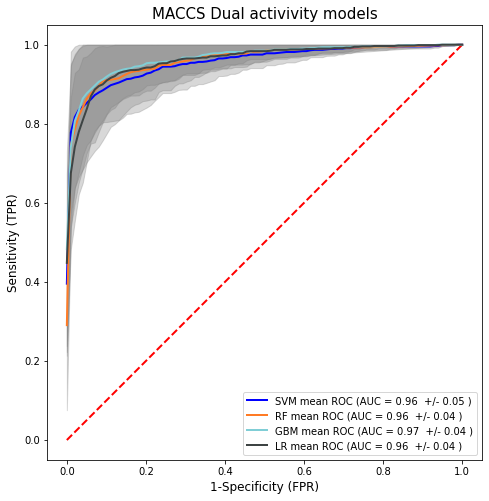

In [ ]:
x=df
y=sxl["Target"]
random_state = np.random.RandomState(0)

cv = StratifiedKFold(n_splits=5,shuffle=False)
from sklearn.metrics import roc_curve,auc
from scipy import interp
## plot arrows
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs_sv= []
aucs_sv = []
mean_fpr_sv = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionsv = svc_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_sv, tpr_sv, t = roc_curve(y[test], predictionsv[:, 1])
    tprs_sv.append(interp(mean_fpr_sv, fpr_sv, tpr_sv))
    roc_auc_sv = auc(fpr_sv, tpr_sv)
    aucs_sv.append(roc_auc_sv)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
mean_tpr_sv = np.mean(tprs_sv, axis=0)
mean_auc_sv = auc(mean_fpr_sv, mean_tpr_sv)
std_tpr_sv = np.std(tprs_sv, axis=0)
mean_std_tpr_sv = np.mean(std_tpr_sv, axis=0)
mean_std_tpr_sv= mean_std_tpr_sv.round(4)
print(std_tpr_sv )
tprs_upper = np.minimum(mean_tpr_sv+ std_tpr_sv, 1)
tprs_lower = np.maximum(mean_tpr_sv - std_tpr_sv, 0)

plt.plot(mean_fpr_sv, mean_tpr_sv, color='b',
         label=r'SVM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_sv,mean_std_tpr_sv ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_sv,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)

tprs_rf = []
aucs_rf = []
mean_fpr_rf = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionrf = rf_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_rf, tpr_rf, t = roc_curve(y[test], predictionrf[:, 1])
    tprs_rf.append(interp(mean_fpr_rf, fpr_rf, tpr_rf))
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs_rf.append(roc_auc_rf)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_rf = np.mean(tprs_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_tpr_rf = np.std(tprs_rf, axis=0)
mean_std_tpr_rf = np.mean(std_tpr_rf, axis=0)
mean_std_tpr_rf= mean_std_tpr_rf.round(4)
print(std_tpr_rf )
tprs_upper = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tprs_lower = np.maximum(mean_tpr_rf - std_tpr_rf, 0)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='#ff7b25',
         label=r'RF mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_rf,mean_std_tpr_rf ),
         lw=2, alpha=1)
plt.fill_between(
    mean_fpr_rf,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_gbm = []
aucs_gbm = []
mean_fpr_gbm = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictiongbm = gbm_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_gbm, tpr_gbm, t = roc_curve(y[test], predictiongbm[:, 1])
    tprs_gbm.append(interp(mean_fpr_gbm, fpr_gbm, tpr_gbm))
    roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
    aucs_gbm.append(roc_auc_gbm)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_gbm = np.mean(tprs_gbm, axis=0)
mean_auc_gbm = auc(mean_fpr_gbm, mean_tpr_gbm)
std_tpr_gbm = np.std(tprs_gbm, axis=0)
mean_std_tpr_gbm = np.mean(std_tpr_gbm, axis=0)
mean_std_tpr_gbm= mean_std_tpr_gbm.round(4)
print(std_tpr_gbm )
tprs_upper = np.minimum(mean_tpr_gbm + std_tpr_gbm, 1)
tprs_lower = np.maximum(mean_tpr_gbm - std_tpr_gbm, 0)

plt.plot(mean_fpr_gbm, mean_tpr_gbm, color='#80ced6',
         label=r'GBM mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_gbm,mean_std_tpr_gbm ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_gbm,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
tprs_lr = []
aucs_lr = []
mean_fpr_lr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    predictionlr = lr_model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr_lr, tpr_lr, t = roc_curve(y[test], predictionlr[:, 1])
    tprs_lr.append(interp(mean_fpr_lr, fpr_lr, tpr_lr))
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs_lr.append(roc_auc_lr)
    #plt.plot(fpr, tpr, lw=2, alpha=0.1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


mean_tpr_lr = np.mean(tprs_lr, axis=0)
mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
std_tpr_lr = np.std(tprs_lr, axis=0)
mean_std_tpr_lr = np.mean(std_tpr_lr, axis=0)
mean_std_tpr_lr= mean_std_tpr_lr.round(4)
print(std_tpr_lr )
tprs_upper = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tprs_lower = np.maximum(mean_tpr_lr - std_tpr_lr, 0)

plt.plot(mean_fpr_lr, mean_tpr_lr, color='#3e4444',
         label=r'LR mean ROC (AUC = %0.2f  +/- %0.2f )' % (mean_auc_lr,mean_std_tpr_lr ),
         lw=2, alpha=1)

plt.fill_between(
    mean_fpr_lr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.3,
    #label=r"Std: " + u"\u00B1 " + str(mean_std_tpr),
)
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color= "red")
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.title('MACCS Dual activivity models',fontsize = 15)
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
#<ipython-input-14-761c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))1c7dc6cad2>:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
 # tprs.append(interp(mean_fpr, fpr, tpr))

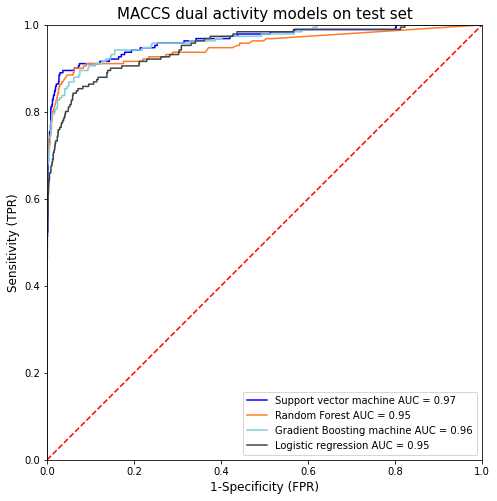

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

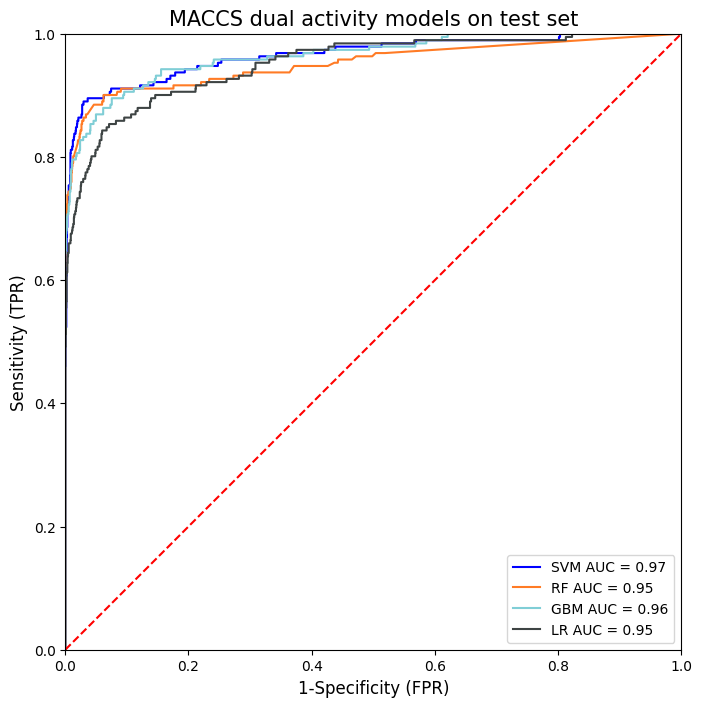

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS dual activity models on test set',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'SVM AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'RF AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'GBM AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'LR AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.8991
0.8904
0.888
0.8412


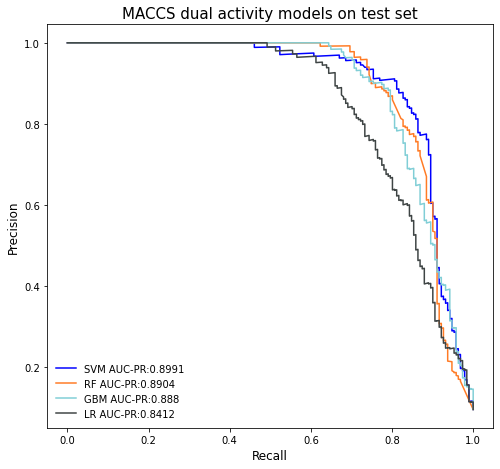

In [ ]:
#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS dual activity models on test set',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='lower left', frameon=False)
#display plot
plt.show()

# PRB P Box graphs Duals

In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 10.8 MB/s eta 0:00:00

real	0m13.768s
user	0m8.430s
sys	0m0.894s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp




In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
!ls '/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set'
import pandas as pd
prb= pd.read_csv("PRBABSansGAMdata.csv")
dchm2= prb["SMILES"]
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(prb,smilesCol="SMILES")
prb.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

prb["Input"] = prb["ROMol"].apply(get_input) # adding the input column to the dataframe

mfp=prb["ROMol"].apply(get_input)
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
ABSactivePBoxMFPRanksMACCS.csv
ABSactivePBoxMFPRanksMfp.csv
ABSactivePRBoxMFPRanksMACCS.csv
ABSactivePRBoxMFPRanksMfp.csv
absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBsexualhtss.csv
asexualsLRFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
asexualsRFFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
DualactivePBoxMFPRanksMACCS.csv
gam_smiles.csv
Miniconda3-py37_4.12.0-Linux-x86_64.sh
PathogenboxLabeld.csv
PathogenBox.xlsx
PRBABSansGAMdata.csv
PRBdata.csv
prb_smiles.csv
PRB_test_set2.csv
PRB_test_set.csv
sexualP_SVMrfbhpt5005_MFP_model_prediction_on_PRBsexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexualhtss

0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
395  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
397  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
398  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
399  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   

     493  494  495  496  497  498  499  
0    0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1    0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2    0.0  0.0  1.0  1.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
395  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
396  0.0  0.0  0.0  0.0  0.0  1.0  1.0  
397  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
398  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
399  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[400 rows x 500 columns]

## Model predictions Sexuals

In [ ]:
df_label= prb["S_Target"]
df_label

0      0
1      0
2      1
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    1
Name: S_Target, Length: 400, dtype: int64

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsSVCFinalHPT_UMFP_model5005.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/sexualsRFFinalHPT_UMFP_model5005.pkl')

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/sexualsLRFinalHPT_UMFP_model5005.pkl')

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/sexualsGBMFinalHPT_UMFP_model5005.pkl')

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

0    266
1    134
dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 

Predicted dual
0                 1
1                 0
2                 0
3                 0
4                 0
..              ...
395               0
396               0
397               0
398               1
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.667500
Recall 0.509804
precision 0.194030
F1 score: 0.281081
[[241 108]
 [ 25  26]]
ROCAUC score: 0.6001741670880386
Accuracy score: 0.6675
F1 score: 0.28108108108108104
Cohens kappa: 0.118213
ROC AUC: 0.600174
[[241 108]
 [ 25  26]]


<Axes: >

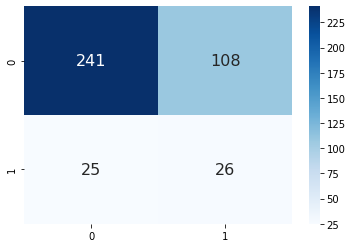

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    391
1      9
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0

Predicted dual
0                 0
1                 0
2                 0
3                 0
4                 0
..              ...
395               0
396               0
397               0
398               0
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.865000
Recall 0.058824
precision 0.333333
F1 score: 0.100000
[[343   6]
 [ 48   3]]
ROCAUC score: 0.5208157761672004
Accuracy score: 0.865
F1 score: 0.1
Cohens kappa: 0.064206
ROC AUC: 0.520816
[[343   6]
 [ 48   3]]


In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    339
1     61
dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

Predicted dual
0                 1
1                 0
2                 0
3                 0
4                 0
..              ...
395               0
396               0
397               0
398               0
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.790000
Recall 0.274510
precision 0.229508
F1 score: 0.250000
[[302  47]
 [ 37  14]]
ROCAUC score: 0.5699196584077757
Accuracy score: 0.79
F1 score: 0.25
Cohens kappa: 0.129037
ROC AUC: 0.569920
[[302  47]
 [ 37  14]]


<Axes: >

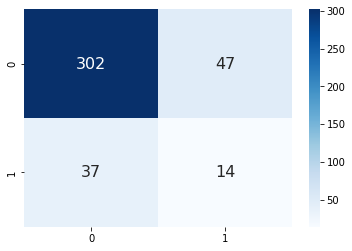

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

0    323
1     77
dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

Predicted dual
0                 1
1                 0
2                 0
3                 0
4                 0
..              ...
395               0
396               0
397               0
398               0
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.765000
Recall 0.333333
precision 0.220779
F1 score: 0.265625
[[289  60]
 [ 34  17]]
ROCAUC score: 0.5807067812798472
Accuracy score: 0.765
F1 score: 0.26562499999999994
Cohens kappa: 0.132561
ROC AUC: 0.580707
[[289  60]
 [ 34  17]]


In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Complied graphs

In [ ]:
Xt_test=df
Yt_test= prb["S_Target"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp dual activity models on PRB Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

In [ ]:
Xt_test=df
Yt_test= prb["S_Target"]

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp dual activity models on PRB Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

0.2334
0.2101
0.211
0.1933


In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob       LR prob  Compounds  Activity
0    0.853657  0.333918  0.613320  9.999952e-01          1         0
1    0.004051  0.138174  0.013000  2.021569e-09          2         0
2    0.137087  0.200000  0.195711  9.565909e-05          3         1
3    0.003642  0.068583  0.021851  8.298328e-08          4         0
4    0.233673  0.126491  0.140065  3.018105e-04          5         0
..        ...       ...       ...           ...        ...       ...
395  0.129136  0.134234  0.110055  2.185376e-08        396         0
396  0.030578  0.000290  0.082323  2.049255e-06        397         0
397  0.017316  0.010888  0.053818  2.154713e-01        398         0
398  0.127865  0.134668  0.056278  9.976731e-01        399         0
399  0.086549  0.067606  0.255395  7.138963e-03        400         1

[400 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob       LR prob  Compounds  Activity  \
0    0.853657  0.333918  0.613320  9.999952e-01          1         0   
1    0.004051  0.138174  0.013000  2.021569e-09          2         0   
2    0.137087  0.200000  0.195711  9.565909e-05          3         1   
3    0.003642  0.068583  0.021851  8.298328e-08          4         0   
4    0.233673  0.126491  0.140065  3.018105e-04          5         0   
..        ...       ...       ...           ...        ...       ...   
395  0.129136  0.134234  0.110055  2.185376e-08        396         0   
396  0.030578  0.000290  0.082323  2.049255e-06        397         0   
397  0.017316  0.010888  0.053818  2.154713e-01        398         0   
398  0.127865  0.134668  0.056278  9.976731e-01        399         0   
399  0.086549  0.067606  0.255395  7.138963e-03        400         1   

     Random Selection  
0                   0  
1                   0  
2                   1  
3                   1  
4                   0  
..                ...  
395                 0  
396                 0  
397                 0  
398                 1  
399                 0  

[400 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('DualactivePRBoxMFPRanks.csv', encoding = 'utf-8-sig') 
 
files.download('DualactivePRBoxMFPRanks.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Pbox

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsSVCFinalHPT_UMFP_model5005.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/sexualsRFFinalHPT_UMFP_model5005.pkl')

lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/sexualsLRFinalHPT_UMFP_model5005.pkl')

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/sexualsGBMFinalHPT_UMFP_model5005.pkl')

In [ ]:
pbox= pd.read_csv("/content/PathogenboxLabeld.csv")
pbox

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

### Processing

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/

import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
############################################Sexual data
#Optional: move to the desired location:

import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
Yes    30393
No     29143
Name: Hit, dtype: int64
No     8975
Yes     916
Name: S_Hit, dtype: int64


Smiles S_Hit
0     NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12   Yes
1              Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1   Yes
2                      COc1c(C)cnc(CN(C)C2CCCCC2)c1C   Yes
3              Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1   Yes
4                 CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C   Yes
...                                              ...   ...
9886        Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1    No
9887            COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21    No
9888             CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2    No
9889            CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1    No
9890              Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1    No

[9891 rows x 2 columns]

In [ ]:
#d= df1[~df1['date'].isin(df2['date'])]

d= pbox[~pbox['SMILES'].isin(axl['Smiles'])]
d


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dp= pbox[~pbox['SMILES'].isin(prb['SMILES'])]
dp


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ds= pbox[~pbox['Compound ID'].isin(sxl['Smiles'])]
ds

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
## Selecting unique compounds not shared

u= d[d['SMILES'].isin(dp['SMILES'])]
u

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ut= u[u['SMILES'].isin(ds['SMILES'])]
ut

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dfp= ut[["SMILES","Gam inhibition"]]
dfp

SMILES  Gam inhibition
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               0
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               0
..                                                 ...             ...
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C               0
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1               1
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1               0
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4               0
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O               0

[367 rows x 2 columns]

/usr/local/lib/python3.9/dist-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


SMILES  Gam inhibition  \
0             Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0   
1          C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1   
2   Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1   
3  C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               0   
4         Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               0   

                                               ROMol  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
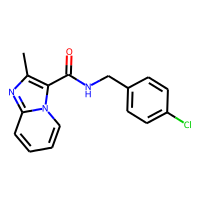
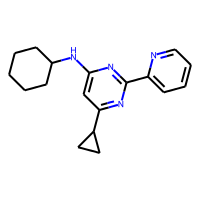
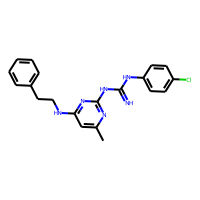
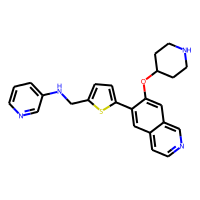
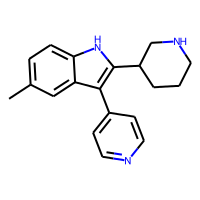

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(dfp,smilesCol="SMILES")
dfp.head()

In [ ]:



def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

In [ ]:
dfp["Input"] = dfp["ROMol"].apply(get_input) # adding the input column to the dataframe

mfp=dfp["ROMol"].apply(get_input)
mfp

<ipython-input-38-c5c94163fafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["Input"] = dfp["ROMol"].apply(get_input) # adding the input column to the dataframe


0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
3      [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
369    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...
370    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
371    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
372    [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
373    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: ROMol, Length: 367, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
2    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
362  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
364  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
365  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   

     493  494  495  496  497  498  499  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  
..   ...  ...  ...  ...  ...  ...  ...  
362  1.0  1.0  0.0  1.0  0.0  0.0  1.0  
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
365  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
366  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[367 rows x 500 columns]

In [ ]:
df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
2    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
362  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
364  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
365  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   

     493  494  495  496  497  498  499  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  
..   ...  ...  ...  ...  ...  ...  ...  
362  1.0  1.0  0.0  1.0  0.0  0.0  1.0  
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
365  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
366  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[367 rows x 500 columns]

In [ ]:
df_label= dfp["Gam inhibition"]
df_label

0      0
1      1
2      1
3      0
4      0
      ..
369    0
370    1
371    0
372    0
373    0
Name: Gam inhibition, Length: 367, dtype: int64

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

0    237
1    130
dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 0
..              ...
362               0
363               0
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.561308
Recall 0.340206
precision 0.253846
F1 score: 0.290749
[[173  97]
 [ 64  33]]
ROCAUC score: 0.4904734631538756
Accuracy score: 0.5613079019073569
F1 score: 0.2907488986784141
Cohens kappa: -0.017181
ROC AUC: 0.490473
[[173  97]
 [ 64  33]]


<Axes: >

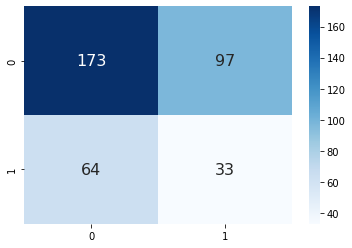

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    359
1      8
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

Predicted dual
0                 0
1                 1
2                 0
3                 0
4                 0
..              ...
362               0
363               0
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.741144
Recall 0.051546
precision 0.625000
F1 score: 0.095238
[[267   3]
 [ 92   5]]
ROCAUC score: 0.5202176403207331
Accuracy score: 0.7411444141689373
F1 score: 0.09523809523809522
Cohens kappa: 0.057270
ROC AUC: 0.520218
[[267   3]
 [ 92   5]]


In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    298
1     69
dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Predicted dual
0                 0
1                 1
2                 1
3                 0
4                 0
..              ...
362               0
363               0
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.673025
Recall 0.237113
precision 0.333333
F1 score: 0.277108
[[224  46]
 [ 74  23]]
ROCAUC score: 0.5333715158457426
Accuracy score: 0.6730245231607629
F1 score: 0.27710843373493976
Cohens kappa: 0.073544
ROC AUC: 0.533372
[[224  46]
 [ 74  23]]


In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

0    293
1     74
dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Predicted dual
0                 0
1                 1
2                 1
3                 0
4                 0
..              ...
362               0
363               0
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.664850
Recall 0.247423
precision 0.324324
F1 score: 0.280702
[[220  50]
 [ 73  24]]
ROCAUC score: 0.531118747613593
Accuracy score: 0.6648501362397821
F1 score: 0.2807017543859649
Cohens kappa: 0.067354
ROC AUC: 0.531119
[[220  50]
 [ 73  24]]


In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

<Axes: >

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Complied graphs

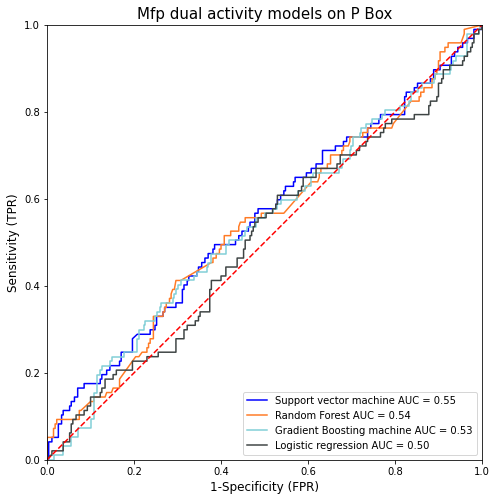

In [ ]:
Xt_test=df
Yt_test= dfp["Gam inhibition"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp dual activity models on P Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

In [ ]:
Xt_test=df
Yt_test= dfp["Gam inhibition"]

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp dual activity models on P Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

0.3289
0.3372
0.2845
0.2775


In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob       LR prob  Compounds  Activity
0    0.035873  0.135417  0.022925  2.728771e-10          1       0.0
1    0.982585  0.783838  0.626190  9.999999e-01          2       1.0
2    0.914860  0.401170  0.827931  1.000000e+00          3       1.0
3    0.469816  0.275290  0.344809  9.992850e-01          4       0.0
4    0.228288  0.208477  0.390151  6.715965e-05          5       0.0
..        ...       ...       ...           ...        ...       ...
362  0.037779  0.146199  0.091880  7.184431e-09        363       0.0
363  0.258050  0.066667  0.075437  9.449477e-05        364       0.0
364  0.002965  0.050234  0.008251  4.457347e-12        365       1.0
365  0.041486  0.133880  0.125817  1.148482e-16        366       1.0
366  0.034539  0.067251  0.074423  3.141632e-04        367       1.0

[367 rows x 6 columns]

In [ ]:
p['Random Selection'] = df_label.sample(frac=1).values
p['Random Selection'].value_counts()

0    270
1     97
Name: Random Selection, dtype: int64

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob       LR prob  Compounds  Activity  \
0    0.035873  0.135417  0.022925  2.728771e-10          1       0.0   
1    0.982585  0.783838  0.626190  9.999999e-01          2       1.0   
2    0.914860  0.401170  0.827931  1.000000e+00          3       1.0   
3    0.469816  0.275290  0.344809  9.992850e-01          4       0.0   
4    0.228288  0.208477  0.390151  6.715965e-05          5       0.0   
..        ...       ...       ...           ...        ...       ...   
362  0.037779  0.146199  0.091880  7.184431e-09        363       0.0   
363  0.258050  0.066667  0.075437  9.449477e-05        364       0.0   
364  0.002965  0.050234  0.008251  4.457347e-12        365       1.0   
365  0.041486  0.133880  0.125817  1.148482e-16        366       1.0   
366  0.034539  0.067251  0.074423  3.141632e-04        367       1.0   

     Random Selection  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
362                 0  
363                 1  
364                 0  
365                 0  
366                 1  

[367 rows x 7 columns]

In [ ]:
svm= p.sort_values('SVC prob')
svm

SVC prob   RF prob  GBM prob       LR prob  Compounds  Activity  \
102  0.000108  0.002363  0.010016  3.171169e-20        103       0.0   
135  0.000191  0.075556  0.007306  5.789457e-21        136       0.0   
152  0.000613  0.067416  0.002086  1.622694e-13        153       0.0   
168  0.000689  0.000819  0.015884  2.533145e-11        169       0.0   
300  0.000846  0.005029  0.008146  6.082141e-17        301       1.0   
..        ...       ...       ...           ...        ...       ...   
1    0.982585  0.783838  0.626190  9.999999e-01          2       1.0   
239  0.982598  0.866667  0.765422  1.000000e+00        240       0.0   
244  0.982627  0.672222  0.369051  1.000000e+00        245       1.0   
92   0.994432  0.202316  0.720937  1.000000e+00         93       0.0   
196  0.995203  0.233965  0.716328  1.000000e+00        197       0.0   

     Random Selection  
102                 0  
135                 0  
152                 0  
168                 0  
300                 0  
..                ...  
1                   0  
239                 0  
244                 0  
92                  1  
196                 1  

[367 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('DualactivePBoxMFPRanks.csv', encoding = 'utf-8-sig') 
 
files.download('DualactivePBoxMFPRanks.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

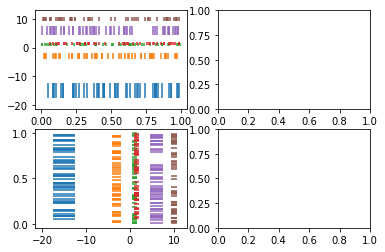

In [ ]:
# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = [f'C{i}' for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')


plt.show()

#PRB BOX test MACCS

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
!ls '/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set'
import pandas as pd
prb= pd.read_csv("PRBABSansGAMdata.csv")
dchm2= prb["SMILES"]
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(prb,smilesCol="SMILES")
prb.head()

/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBsexualhtss.csv
asexualsLRFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
asexualsRFFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
gam_smiles.csv
Miniconda3-py37_4.12.0-Linux-x86_64.sh
PathogenboxLabeld.csv
PathogenBox.xlsx
PRBABSansGAMdata.csv
PRBdata.csv
prb_smiles.csv
PRB_test_set2.csv
PRB_test_set.csv
sexualP_SVMrfbhpt5005_MFP_model_prediction_on_PRBsexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBsexualhtss.csv
sexualsGradientBoostingFinalizedhpt_U

Unnamed: 0 Compound ID                                             SMILES  \
0           0   MMV000008                  CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12   
1           1   MMV000028                    COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC   
2           2   MMV000043  COc1cc(C)c2c(Oc3cccc(c3)C(F)(F)F)c(OC)cc(NC(C)...   
3           3   MMV000051  CCC[C@@H]1C[C@H](N(C)C1)C(=O)N[C@H]([C@H](C)Cl...   
4           4   MMV000059  O1C(=CC=C1C2=CC=C(C(=N)NOC)C=C2)C3=CC=C(C(=N)N...   

  Compound ID.1  Asexual Inhibition (%) @ 2 µM  \
0     MMV000008                           85.8   
1     MMV000028                           23.4   
2     MMV000043                           56.5   
3     MMV000051                           72.9   
4     MMV000059                           -3.0   

   Final Primary Screen Gametocyte Inhibition (%) @ 5 µM  S_Target  \
0                                                6.0             0   
1                                               22.2             0   
2                                               79.6             1   
3                                               24.2             0   
4                                                9.3             0   

   ABS_Target                                             ROMol  
0           1  <rdkit.Chem.rdchem.Mol object at 0x7fc6846c8660>  
1           0  <rdkit.Chem.rdchem.Mol object at 0x7fc6846c87b0>  
2           1  <rdkit.Chem.rdchem.Mol object at 0x7fc6846c8e40>  
3           1  <rdkit.Chem.rdchem.Mol object at 0x7fc6846c8f20>  
4           0  <rdkit.Chem.rdchem.Mol object at 0x7fc684670040>

# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
dchm= prb["SMILES"]
mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
4      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
395    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
396    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
397    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
398    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
399    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   

     160  161  162  163  164  165  166  
0      1    1    1    1    0    1    0  
1      1    1    1    1    1    1    0  
2      1    1    1    1    1    1    0  
3      1    1    0    1    1    1    0  
4      1    1    1    1    1    1    0  
..   ...  ...  ...  ...  ...  ...  ...  
395    1    1    1    1    1    1    0  
396    0    1    1    1    1    1    0  
397    1    1    1    1    1    1    0  
398    1    1    1    1    1    1    0  
399    0    1    1    1    1    1    0  

[400 rows x 167 columns]

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/sexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRF_HPTFinal_UMACCS_model.pkl')
lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/sexualsLR_HPTFInal_UMACCS_model.pkl')
gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/sexualsGBM_HPTFInal_UMACCS_model.pkl')

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=prb["S_Target"]
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity
0    0.950753  0.684615  0.912882  0.996616          1         0
1    0.582710  0.412000  0.789156  0.992716          2         0
2    0.096361  0.300000  0.100371  0.883739          3         1
3    0.006936  0.100000  0.011636  0.011744          4         0
4    0.990864  0.700000  0.855325  0.994498          5         0
..        ...       ...       ...       ...        ...       ...
395  0.855470  0.700000  0.577075  0.999209        396         0
396  0.046450  0.200000  0.228547  0.650112        397         0
397  0.001238  0.003879  0.006028  0.345004        398         0
398  0.174629  0.200000  0.063413  0.718681        399         0
399  0.007704  0.500000  0.219932  0.275611        400         1

[400 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity  \
0    0.950753  0.684615  0.912882  0.996616          1         0   
1    0.582710  0.412000  0.789156  0.992716          2         0   
2    0.096361  0.300000  0.100371  0.883739          3         1   
3    0.006936  0.100000  0.011636  0.011744          4         0   
4    0.990864  0.700000  0.855325  0.994498          5         0   
..        ...       ...       ...       ...        ...       ...   
395  0.855470  0.700000  0.577075  0.999209        396         0   
396  0.046450  0.200000  0.228547  0.650112        397         0   
397  0.001238  0.003879  0.006028  0.345004        398         0   
398  0.174629  0.200000  0.063413  0.718681        399         0   
399  0.007704  0.500000  0.219932  0.275611        400         1   

     Random Selection  
0                   1  
1                   1  
2                   0  
3                   1  
4                   1  
..                ...  
395                 1  
396                 0  
397                 1  
398                 0  
399                 1  

[400 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('DualactivePBoxMFPRanksMACCS.csv', encoding = 'utf-8-sig') 
 
files.download('DualactivePBoxMFPRanksMACCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

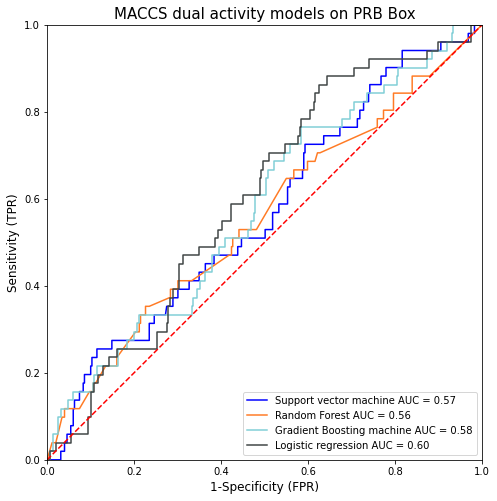

In [ ]:
Xt_test=df
Yt_test= prb["S_Target"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS dual activity models on PRB Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.1558
0.1799
0.1723
0.1574


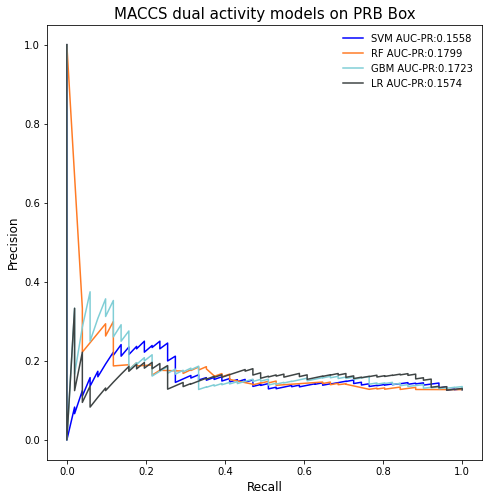

In [ ]:
Xt_test=df
Yt_test= prb["S_Target"]

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS dual activity models on PRB Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

In [ ]:
df_label= prb["S_Target"]
df_label

0      0
1      0
2      1
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    1
Name: S_Target, Length: 400, dtype: int64

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

1    229
0    171
dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1
 0 1 0 

Predicted dual
0                 1
1                 1
2                 1
3                 0
4                 1
..              ...
395               1
396               1
397               0
398               1
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.485000
Recall 0.725490
precision 0.161572
F1 score: 0.264286
[[157 192]
 [ 14  37]]
ROCAUC score: 0.5876734648013934
Accuracy score: 0.485
F1 score: 0.2642857142857143
Cohens kappa: 0.070418
ROC AUC: 0.587673
[[157 192]
 [ 14  37]]


<Axes: >

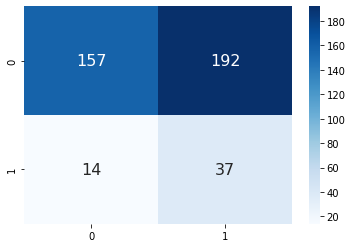

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    332
1     68
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0

Predicted dual
0                 1
1                 0
2                 0
3                 0
4                 1
..              ...
395               1
396               0
397               0
398               0
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.762500
Recall 0.235294
precision 0.176471
F1 score: 0.201681
[[293  56]
 [ 39  12]]
ROCAUC score: 0.537417832462498
Accuracy score: 0.7625
F1 score: 0.2016806722689076
Cohens kappa: 0.065512
ROC AUC: 0.537418
[[293  56]
 [ 39  12]]


<Axes: >

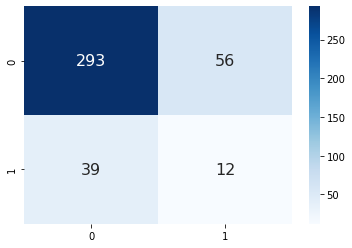

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    297
1    103
dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 

Predicted dual
0                 1
1                 1
2                 0
3                 0
4                 1
..              ...
395               1
396               0
397               0
398               0
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.700000
Recall 0.333333
precision 0.165049
F1 score: 0.220779
[[263  86]
 [ 34  17]]
ROCAUC score: 0.5434574976122254
Accuracy score: 0.7
F1 score: 0.2207792207792208
Cohens kappa: 0.060555
ROC AUC: 0.543457
[[263  86]
 [ 34  17]]


<Axes: >

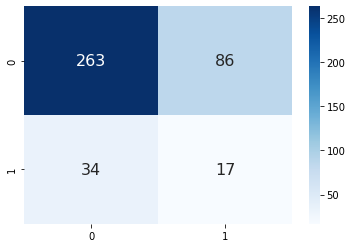

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["S_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

0    260
1    140
dtype: int64
[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 1 0 

Predicted dual
0                 1
1                 1
2                 0
3                 0
4                 1
..              ...
395               1
396               0
397               0
398               0
399               0

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.627500
Recall 0.411765
precision 0.150000
F1 score: 0.219895
[[230 119]
 [ 30  21]]
ROCAUC score: 0.5353952469239844
Accuracy score: 0.6275
F1 score: 0.21989528795811517
Cohens kappa: 0.040567
ROC AUC: 0.535395
[[230 119]
 [ 30  21]]


<Axes: >

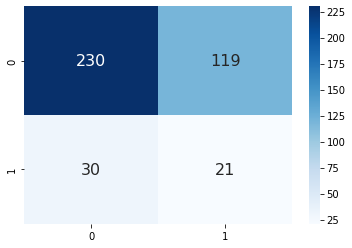

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Pbox

In [ ]:
pbox= pd.read_csv("/content/PathogenboxLabeld.csv")
pbox

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

### Processing

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl
import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())

compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

compounds


/content/drive/MyDrive/PhD/PTS_datasets
No     8975
Yes     916
Name: S_Hit, dtype: int64
Yes    30393
No     29143
Name: Hit, dtype: int64


[(<rdkit.Chem.rdchem.Mol at 0x7fc5ed361970>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed3619e0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361a50>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361ac0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361b30>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361ba0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361c10>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361c80>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361cf0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361d60>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361dd0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361e40>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361eb0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361f20>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed361f90>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed369040>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed3690b0>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed369120>, 'Yes'),
 (<rdkit.Chem.rdchem.Mol at 0x7fc5ed369190>, '

In [ ]:
#d= df1[~df1['date'].isin(df2['date'])]

d= pbox[~pbox['SMILES'].isin(axl['Smiles'])]
d


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dp= pbox[~pbox['SMILES'].isin(prb['SMILES'])]
dp


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ds= pbox[~pbox['Compound ID'].isin(sxl['Smiles'])]
ds

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
## Selecting unique compounds not shared

u= d[d['SMILES'].isin(dp['SMILES'])]
u

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ut= u[u['SMILES'].isin(ds['SMILES'])]
ut

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dfp= ut[["SMILES","Gam inhibition"]]
dfp

SMILES  Gam inhibition
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               0
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               0
..                                                 ...             ...
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C               0
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1               1
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1               0
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4               0
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O               0

[367 rows x 2 columns]

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(dfp,smilesCol="SMILES")
dfp.head()

/usr/local/lib/python3.9/dist-packages/rdkit/Chem/PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


SMILES  Gam inhibition  \
0             Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0   
1          C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1   
2   Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1   
3  C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               0   
4         Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               0   

                                              ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x7fc5edadbd60>  
1  <rdkit.Chem.rdchem.Mol object at 0x7fc5edadbba0>  
2  <rdkit.Chem.rdchem.Mol object at 0x7fc5edadb9e0>  
3  <rdkit.Chem.rdchem.Mol object at 0x7fc5edadba50>  
4  <rdkit.Chem.rdchem.Mol object at 0x7fc5edadb7b0>

# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
dchm= dfp["SMILES"]
mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
362    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
363    0    0    0    0    0    0    0    0    0    0  ...    1    1    0   
364    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
365    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
366    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   

     160  161  162  163  164  165  166  
0      1    1    1    1    1    1    0  
1      0    1    1    1    0    1    0  
2      1    1    1    1    0    1    0  
3      0    1    1    1    1    1    0  
4      1    1    1    1    0    1    0  
..   ...  ...  ...  ...  ...  ...  ...  
362    1    1    1    1    1    1    0  
363    1    1    1    1    1    1    0  
364    1    1    1    1    1    1    0  
365    1    1    1    1    1    1    0  
366    1    1    1    1    1    1    0  

[367 rows x 167 columns]

In [ ]:
df_label= dfp["Gam inhibition"]
df_label

0      0
1      1
2      1
3      0
4      0
      ..
369    0
370    1
371    0
372    0
373    0
Name: Gam inhibition, Length: 367, dtype: int64

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

0    184
1    183
dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.553134
Recall 0.597938
precision 0.316940
F1 score: 0.414286
[[145 125]
 [ 39  58]]
ROCAUC score: 0.567487590683467
Accuracy score: 0.553133514986376
F1 score: 0.41428571428571426
Cohens kappa: 0.105118
ROC AUC: 0.567488
[[145 125]
 [ 39  58]]


<Axes: >

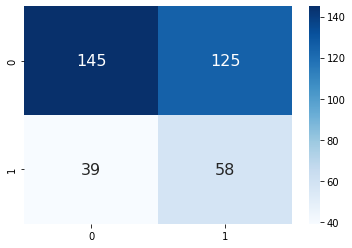

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    321
1     46
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0

Predicted dual
0                 0
1                 1
2                 1
3                 0
4                 0
..              ...
362               0
363               0
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.708447
Recall 0.185567
precision 0.391304
F1 score: 0.251748
[[242  28]
 [ 79  18]]
ROCAUC score: 0.5409316533027873
Accuracy score: 0.7084468664850136
F1 score: 0.2517482517482518
Cohens kappa: 0.098446
ROC AUC: 0.540932
[[242  28]
 [ 79  18]]


<Axes: >

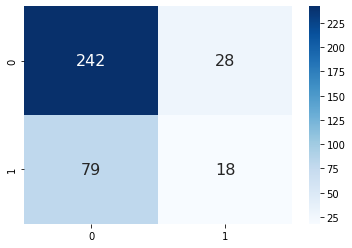

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

0    307
1     60
dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

Predicted dual
0                 0
1                 0
2                 1
3                 0
4                 0
..              ...
362               0
363               0
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.675749
Recall 0.195876
precision 0.316667
F1 score: 0.242038
[[229  41]
 [ 78  19]]
ROCAUC score: 0.5220122184039709
Accuracy score: 0.6757493188010899
F1 score: 0.24203821656050956
Cohens kappa: 0.050153
ROC AUC: 0.522012
[[229  41]
 [ 78  19]]


<Axes: >

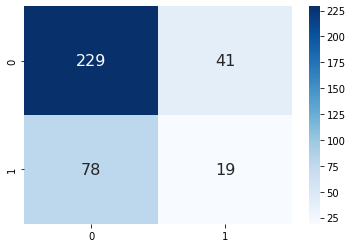

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

0    256
1    111
dtype: int64
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 0
..              ...
362               1
363               1
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.613079
Recall 0.340206
precision 0.297297
F1 score: 0.317308
[[192  78]
 [ 64  33]]
ROCAUC score: 0.5256586483390608
Accuracy score: 0.6130790190735694
F1 score: 0.31730769230769235
Cohens kappa: 0.049049
ROC AUC: 0.525659
[[192  78]
 [ 64  33]]


<Axes: >

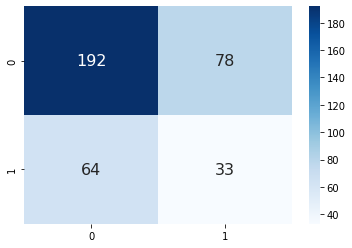

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Complied graphs

In [ ]:

svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/sexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/sexualsRF_HPTFinal_UMACCS_model.pkl')
lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/sexualsLR_HPTFInal_UMACCS_model.pkl')
gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/sexualsGBM_HPTFInal_UMACCS_model.pkl')

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity
0    0.066410  0.000000  0.005944  0.318589          1       0.0
1    0.848141  0.700000  0.336092  0.806153          2       1.0
2    0.908659  0.800000  0.925779  0.999443          3       1.0
3    0.412406  0.374603  0.458213  0.987208          4       0.0
4    0.087101  0.141270  0.151101  0.879293          5       0.0
..        ...       ...       ...       ...        ...       ...
362  0.798731  0.300000  0.200034  0.991956        363       0.0
363  0.429203  0.100000  0.032184  0.778690        364       0.0
364  0.010445  0.000000  0.003384  0.022792        365       1.0
365  0.022460  0.112940  0.009220  0.037166        366       1.0
366  0.002497  0.000000  0.003119  0.004930        367       1.0

[367 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity  \
0    0.066410  0.000000  0.005944  0.318589          1       0.0   
1    0.848141  0.700000  0.336092  0.806153          2       1.0   
2    0.908659  0.800000  0.925779  0.999443          3       1.0   
3    0.412406  0.374603  0.458213  0.987208          4       0.0   
4    0.087101  0.141270  0.151101  0.879293          5       0.0   
..        ...       ...       ...       ...        ...       ...   
362  0.798731  0.300000  0.200034  0.991956        363       0.0   
363  0.429203  0.100000  0.032184  0.778690        364       0.0   
364  0.010445  0.000000  0.003384  0.022792        365       1.0   
365  0.022460  0.112940  0.009220  0.037166        366       1.0   
366  0.002497  0.000000  0.003119  0.004930        367       1.0   

     Random Selection  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
..                ...  
362                 1  
363                 0  
364                 0  
365                 1  
366                 0  

[367 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('DualactivePBoxMFPRanksMACCS.csv', encoding = 'utf-8-sig') 
 
files.download('DualactivePBoxMFPRanksMACCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

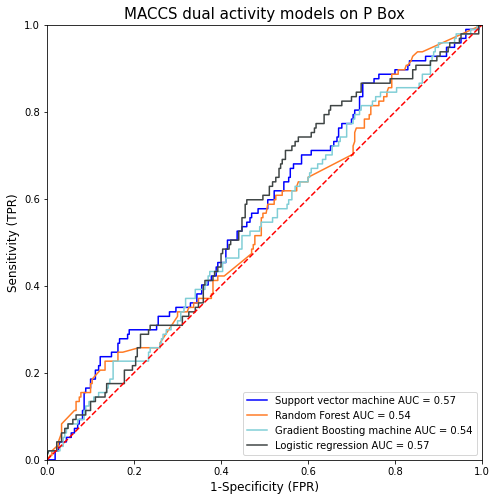

In [ ]:
Xt_test=df
Yt_test= dfp["Gam inhibition"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS dual activity models on P Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.3024
0.3073
0.2991
0.3115


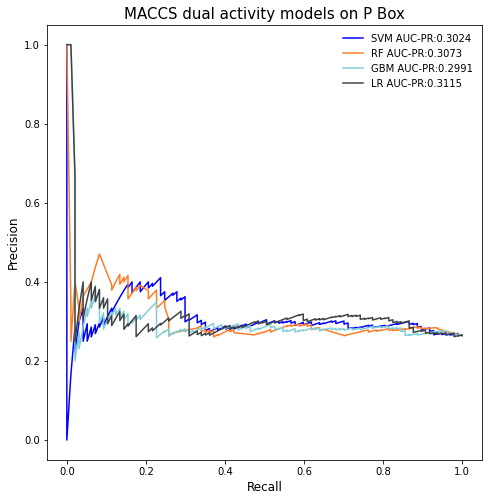

In [ ]:
Xt_test=df
Yt_test= dfp["Gam inhibition"]

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS dual activity models on P Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

# PRB P Box graphs ABS

In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!time pip install rdkit-pypi==2021.09.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

real	0m11.458s
user	0m6.437s
sys	0m0.288s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp




In [ ]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
!ls '/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set'
import pandas as pd
prb= pd.read_csv("PRBABSansGAMdata.csv")
dchm2= prb["SMILES"]
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(prb,smilesCol="SMILES")
prb.head()

def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

prb["Input"] = prb["ROMol"].apply(get_input) # adding the input column to the dataframe

mfp=prb["ROMol"].apply(get_input)
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBsexualhtss.csv
asexualsLRFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
asexualsRFFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
DualactivePBoxMFPRanksMACCS.csv
gam_smiles.csv
Miniconda3-py37_4.12.0-Linux-x86_64.sh
PathogenboxLabeld.csv
PathogenBox.xlsx
PRBABSansGAMdata.csv
PRBdata.csv
prb_smiles.csv
PRB_test_set2.csv
PRB_test_set.csv
sexualP_SVMrfbhpt5005_MFP_model_prediction_on_PRBsexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBsexualhtss.csv
sexua

0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
395  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
397  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
398  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
399  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   

     493  494  495  496  497  498  499  
0    0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1    0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2    0.0  0.0  1.0  1.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
395  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
396  0.0  0.0  0.0  0.0  0.0  1.0  1.0  
397  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
398  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
399  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[400 rows x 500 columns]

## Model predictions Asexuals Mfp

In [ ]:
df_label= prb["ABS_Target"]
df_label

0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')
lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/asexualsRandomForestFinalizedhpt5005_UMFP_model.pkl')
svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/asexualsSVCFinalHPT_UMFP_model5005.pkl')

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity
0    0.999989  0.949451  0.845425  0.998016          1         1
1    0.975872  0.589455  0.338315  0.486845          2         0
2    0.989034  0.494583  0.831952  0.998415          3         1
3    0.371359  0.313506  0.286675  0.928122          4         1
4    0.906765  0.388153  0.511276  0.961736          5         0
..        ...       ...       ...       ...        ...       ...
395  0.940199  0.521913  0.472073  0.920955        396         0
396  0.902873  0.504449  0.557291  0.969330        397         0
397  0.021221  0.341791  0.323785  0.515710        398         0
398  0.690756  0.492503  0.301140  0.795418        399         0
399  0.931608  0.806790  0.732746  0.969600        400         0

[400 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity  \
0    0.999989  0.949451  0.845425  0.998016          1         1   
1    0.975872  0.589455  0.338315  0.486845          2         0   
2    0.989034  0.494583  0.831952  0.998415          3         1   
3    0.371359  0.313506  0.286675  0.928122          4         1   
4    0.906765  0.388153  0.511276  0.961736          5         0   
..        ...       ...       ...       ...        ...       ...   
395  0.940199  0.521913  0.472073  0.920955        396         0   
396  0.902873  0.504449  0.557291  0.969330        397         0   
397  0.021221  0.341791  0.323785  0.515710        398         0   
398  0.690756  0.492503  0.301140  0.795418        399         0   
399  0.931608  0.806790  0.732746  0.969600        400         0   

     Random Selection  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
..                ...  
395                 0  
396                 1  
397                 0  
398                 1  
399                 0  

[400 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('ABSactivePRBoxMFPRanksMfp.csv', encoding = 'utf-8-sig') 
 
files.download('ABSactivePRBoxMFPRanksMfp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

1    362
0     38
dtype: int64
[1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 

Predicted dual
0                 1
1                 0
2                 1
3                 1
4                 1
..              ...
395               1
396               1
397               1
398               1
399               1

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.265000
Recall 0.972222
precision 0.193370
F1 score: 0.322581
[[ 36 292]
 [  2  70]]
ROCAUC score: 0.5409891598915989
Accuracy score: 0.265
F1 score: 0.3225806451612903
Cohens kappa: 0.031876
ROC AUC: 0.540989
[[ 36 292]
 [  2  70]]


<Axes: >

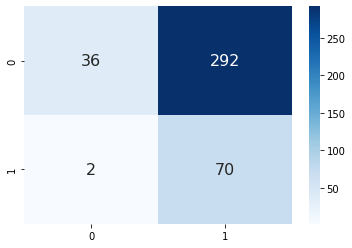

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

1    231
0    169
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 1 0 0 0 1 1

Predicted dual
0                 1
1                 1
2                 0
3                 0
4                 0
..              ...
395               1
396               1
397               0
398               0
399               1

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.512500
Recall 0.750000
precision 0.233766
F1 score: 0.356436
[[151 177]
 [ 18  54]]
ROCAUC score: 0.6051829268292683
Accuracy score: 0.5125
F1 score: 0.3564356435643565
Cohens kappa: 0.112991
ROC AUC: 0.605183
[[151 177]
 [ 18  54]]


<Axes: >

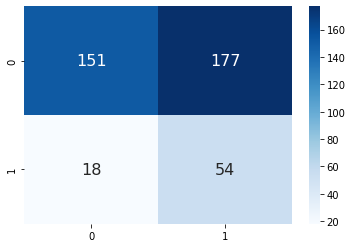

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

1    244
0    156
dtype: int64
[1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 1 0 

Predicted dual
0                 1
1                 0
2                 1
3                 0
4                 1
..              ...
395               0
396               1
397               0
398               0
399               1

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.470000
Recall 0.722222
precision 0.213115
F1 score: 0.329114
[[136 192]
 [ 20  52]]
ROCAUC score: 0.5684281842818428
Accuracy score: 0.47
F1 score: 0.3291139240506329
Cohens kappa: 0.070827
ROC AUC: 0.568428
[[136 192]
 [ 20  52]]


<Axes: >

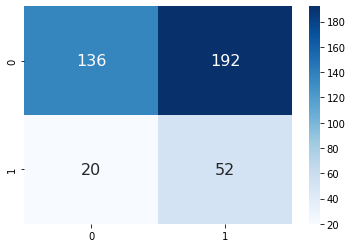

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

1    290
0    110
dtype: int64
[1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 

Predicted dual
0                 1
1                 1
2                 1
3                 0
4                 1
..              ...
395               1
396               1
397               0
398               1
399               1

[400 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.395000
Recall 0.833333
precision 0.206897
F1 score: 0.331492
[[ 98 230]
 [ 12  60]]
ROCAUC score: 0.5660569105691058
Accuracy score: 0.395
F1 score: 0.3314917127071823
Cohens kappa: 0.060559
ROC AUC: 0.566057
[[ 98 230]
 [ 12  60]]


<Axes: >

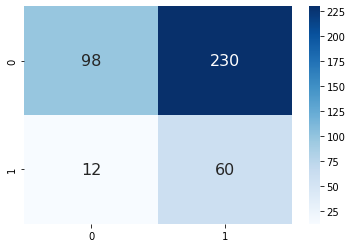

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Complied graphs

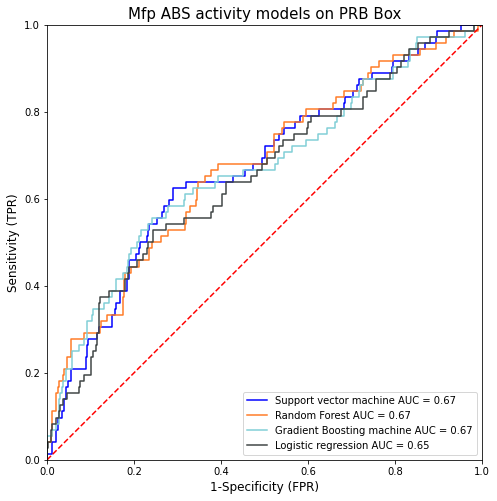

In [ ]:
Xt_test=df
Yt_test= prb["ABS_Target"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp ABS activity models on PRB Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.3143
0.3648
0.3625
0.3243


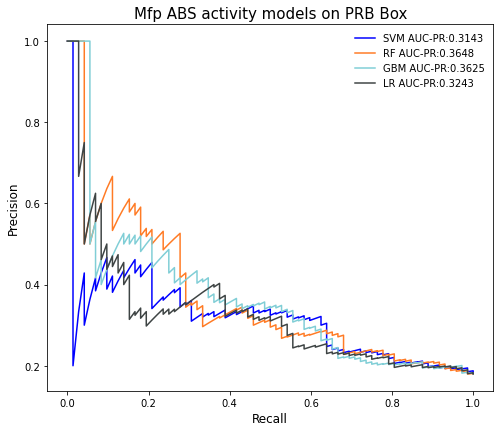

In [ ]:
Xt_test=df
Yt_test= prb["ABS_Target"]

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp ABS activity models on PRB Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

## Pbox

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib


In [ ]:
pbox= pd.read_csv("/content/PathogenboxLabeld.csv")
pbox

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

### Processing

In [ ]:
#d= df1[~df1['date'].isin(df2['date'])]

d= pbox[~pbox['SMILES'].isin(axl['Smiles'])]
d


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dp= pbox[~pbox['SMILES'].isin(prb['SMILES'])]
dp


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ds= pbox[~pbox['Compound ID'].isin(sxl['Smiles'])]
ds

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
## Selecting unique compounds not shared

u= d[d['SMILES'].isin(dp['SMILES'])]
u

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ut= u[u['SMILES'].isin(ds['SMILES'])]
ut

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dfp= ut[["SMILES","ABS inhibition"]]
dfp

SMILES  ABS inhibition
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               1
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               1
..                                                 ...             ...
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C               0
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1               1
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1               0
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4               0
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O               1

[367 rows x 2 columns]

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(dfp,smilesCol="SMILES")
dfp.head()

/usr/local/lib/python3.9/dist-packages/rdkit/Chem/PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


SMILES  ABS inhibition  \
0             Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0   
1          C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1   
2   Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1   
3  C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               1   
4         Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               1   

                                              ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda4f740>  
1  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda4ff20>  
2  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda4f890>  
3  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda4feb0>  
4  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda4f9e0>

In [ ]:



def get_input(mol):
  fp = GetMorganFingerprintAsBitVect(mol, 5, nBits=500) # gets the vector
  arr = np.zeros((0,))
  ConvertToNumpyArray(fp,arr)  # converts the vector to numpy array
  return arr

In [ ]:
dfp["Input"] = dfp["ROMol"].apply(get_input) # adding the input column to the dataframe

mfp=dfp["ROMol"].apply(get_input)
mfp

<ipython-input-54-c5c94163fafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["Input"] = dfp["ROMol"].apply(get_input) # adding the input column to the dataframe


0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
3      [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
369    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...
370    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
371    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
372    [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
373    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: ROMol, Length: 367, dtype: object

In [ ]:
mfp_list = mfp.tolist()
mfpdf= pd.DataFrame(mfp_list)
print(type(mfpdf))
mfpdf

<class 'pandas.core.frame.DataFrame'>


0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
2    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
362  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
364  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
365  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   

     493  494  495  496  497  498  499  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  
..   ...  ...  ...  ...  ...  ...  ...  
362  1.0  1.0  0.0  1.0  0.0  0.0  1.0  
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
365  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
366  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[367 rows x 500 columns]

In [ ]:
df=[]
df = pd.DataFrame(mfpdf)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
1    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
2    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
362  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
364  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
365  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
366  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   

     493  494  495  496  497  498  499  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  
..   ...  ...  ...  ...  ...  ...  ...  
362  1.0  1.0  0.0  1.0  0.0  0.0  1.0  
363  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
364  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
365  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
366  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[367 rows x 500 columns]

In [ ]:
df_label= dfp["ABS inhibition"]
df_label

0      0
1      1
2      1
3      1
4      1
      ..
369    0
370    1
371    0
372    0
373    1
Name: ABS inhibition, Length: 367, dtype: int64

In [ ]:

gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MFP/asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl')
lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MFP/asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MFP/asexualsRandomForestFinalizedhpt5005_UMFP_model.pkl')
svc_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/asexualsSVCFinalHPT_UMFP_model5005.pkl')

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity
0    0.276951  0.483402  0.480615  0.543312          1       0.0
1    0.996457  0.568851  0.574369  0.994859          2       1.0
2    1.000000  0.943128  0.862648  0.999488          3       1.0
3    0.993264  0.613373  0.592942  0.998932          4       1.0
4    0.951378  0.616627  0.568296  0.989585          5       1.0
..        ...       ...       ...       ...        ...       ...
362  0.716103  0.544198  0.692395  0.942685        363       0.0
363  0.678893  0.746834  0.402436  0.839392        364       1.0
364  0.173786  0.296581  0.235082  0.728441        365       1.0
365  0.964872  0.517783  0.378156  0.941645        366       0.0
366  0.143308  0.446861  0.610056  0.691641        367       1.0

[367 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity  \
0    0.276951  0.483402  0.480615  0.543312          1       0.0   
1    0.996457  0.568851  0.574369  0.994859          2       1.0   
2    1.000000  0.943128  0.862648  0.999488          3       1.0   
3    0.993264  0.613373  0.592942  0.998932          4       1.0   
4    0.951378  0.616627  0.568296  0.989585          5       1.0   
..        ...       ...       ...       ...        ...       ...   
362  0.716103  0.544198  0.692395  0.942685        363       0.0   
363  0.678893  0.746834  0.402436  0.839392        364       1.0   
364  0.173786  0.296581  0.235082  0.728441        365       1.0   
365  0.964872  0.517783  0.378156  0.941645        366       0.0   
366  0.143308  0.446861  0.610056  0.691641        367       1.0   

     Random Selection  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
362                 1  
363                 1  
364                 1  
365                 1  
366                 0  

[367 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('ABSactivePBoxMFPRanksMfp.csv', encoding = 'utf-8-sig') 
 
files.download('ABSactivePBoxMFPRanksMfp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

1    354
0     13
dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1

Predicted dual
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               1
365               1
366               1

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.495913
Recall 0.977401
precision 0.488701
F1 score: 0.651601
[[  9 181]
 [  4 173]]
ROCAUC score: 0.5123847754980673
Accuracy score: 0.49591280653950953
F1 score: 0.6516007532956685
Cohens kappa: 0.023950
ROC AUC: 0.512385
[[  9 181]
 [  4 173]]


<Axes: >

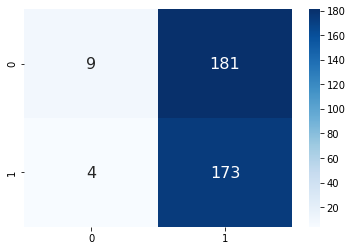

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

1    241
0    126
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               0
365               1
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.596730
Recall 0.762712
precision 0.560166
F1 score: 0.645933
[[ 84 106]
 [ 42 135]]
ROCAUC score: 0.6024085637823372
Accuracy score: 0.5967302452316077
F1 score: 0.645933014354067
Cohens kappa: 0.202315
ROC AUC: 0.602409
[[ 84 106]
 [ 42 135]]


<Axes: >

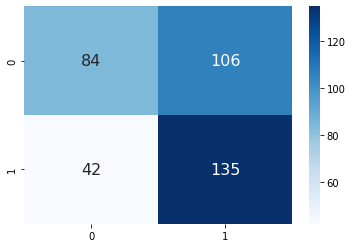

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

1    241
0    126
dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               0
364               0
365               0
366               1

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.553134
Recall 0.717514
precision 0.526971
F1 score: 0.607656
[[ 76 114]
 [ 50 127]]
ROCAUC score: 0.5587570621468927
Accuracy score: 0.553133514986376
F1 score: 0.6076555023923446
Cohens kappa: 0.116078
ROC AUC: 0.558757
[[ 76 114]
 [ 50 127]]


<Axes: >

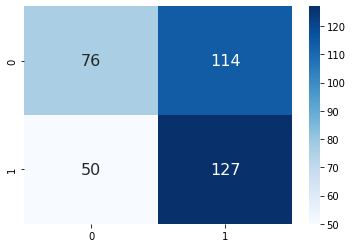

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

1    286
0     81
dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               0
365               1
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.583106
Recall 0.875706
precision 0.541958
F1 score: 0.669546
[[ 59 131]
 [ 22 155]]
ROCAUC score: 0.5931162652393696
Accuracy score: 0.5831062670299727
F1 score: 0.6695464362850971
Cohens kappa: 0.182390
ROC AUC: 0.593116
[[ 59 131]
 [ 22 155]]


<Axes: >

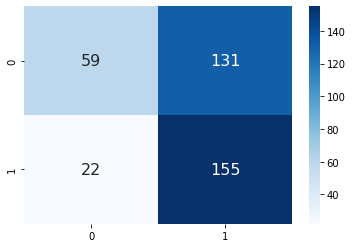

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Complied graphs

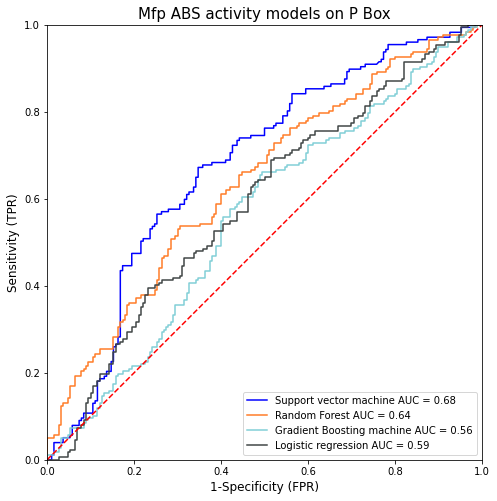

In [ ]:
Xt_test=df
Yt_test= df_label

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('Mfp ABS activity models on P Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.597
0.6236
0.5188
0.5318


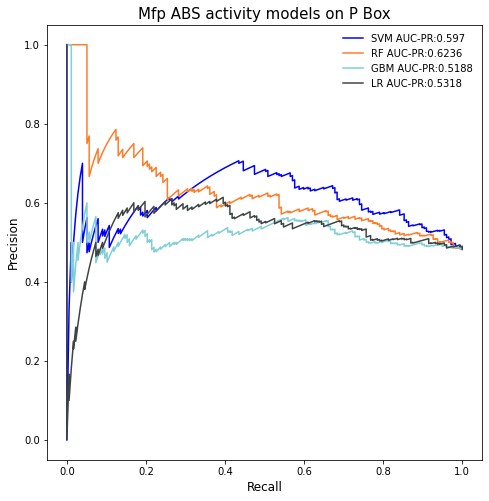

In [ ]:
Xt_test=df
Yt_test= df_label

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('Mfp ABS activity models on P Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

#PRB BOX test MACCS

In [ ]:
import pandas
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
import joblib
gbm_model = joblib.load('/content/drive/MyDrive/PhD/XGBoost_MACCS/asexualsGBM_HPTFInal_UMACCS_model.pkl')
lr_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/asexualsLR_HPTFInal_UMACCS_model.pkl')
svc_model = joblib.load('/content/drive/MyDrive/PhD/PenalizedSVM_MACCS/asexualsPenalizedSVM_HPTFinal_UMACCS_model.pkl')
rf_model = joblib.load('/content/drive/MyDrive/PhD/RF_MACCS/asexualsRF_HPTFinal_UMACCS_model.pkl')

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
!ls '/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set'
import pandas as pd
prb= pd.read_csv("PRBABSansGAMdata.csv")
dchm2= prb["SMILES"]
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(prb,smilesCol="SMILES")
prb.head()

/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
ABSactivePBoxMFPRanksMfp.csv
ABSactivePRBoxMFPRanksMfp.csv
absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
AsexualP_SVMrfb_MFP_model_prediction_on_PRBsexualhtss.csv
asexualsLRFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
asexualsRFFinalizedhpt5005_UMFP_model_prediction_on_PRBasexualhtss.csv
DualactivePBoxMFPRanksMACCS.csv
gam_smiles.csv
Miniconda3-py37_4.12.0-Linux-x86_64.sh
PathogenboxLabeld.csv
PathogenBox.xlsx
PRBABSansGAMdata.csv
PRBdata.csv
prb_smiles.csv
PRB_test_set2.csv
PRB_test_set.csv
sexualP_SVMrfbhpt5005_MFP_model_prediction_on_PRBsexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexualhtss.csv
sexualP_SVMrfb_MFP_model_prediction_on_PRBasexuals.csv
sex

Unnamed: 0 Compound ID                                             SMILES  \
0           0   MMV000008                  CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12   
1           1   MMV000028                    COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC   
2           2   MMV000043  COc1cc(C)c2c(Oc3cccc(c3)C(F)(F)F)c(OC)cc(NC(C)...   
3           3   MMV000051  CCC[C@@H]1C[C@H](N(C)C1)C(=O)N[C@H]([C@H](C)Cl...   
4           4   MMV000059  O1C(=CC=C1C2=CC=C(C(=N)NOC)C=C2)C3=CC=C(C(=N)N...   

  Compound ID.1  Asexual Inhibition (%) @ 2 µM  \
0     MMV000008                           85.8   
1     MMV000028                           23.4   
2     MMV000043                           56.5   
3     MMV000051                           72.9   
4     MMV000059                           -3.0   

   Final Primary Screen Gametocyte Inhibition (%) @ 5 µM  S_Target  \
0                                                6.0             0   
1                                               22.2             0   
2                                               79.6             1   
3                                               24.2             0   
4                                                9.3             0   

   ABS_Target                                             ROMol  
0           1  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda27350>  
1           0  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda273c0>  
2           1  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda27430>  
3           1  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda274a0>  
4           0  <rdkit.Chem.rdchem.Mol object at 0x7fc5eda27510>

# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
dchm= prb["SMILES"]
mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
4      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
395    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
396    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
397    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
398    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
399    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   

     160  161  162  163  164  165  166  
0      1    1    1    1    0    1    0  
1      1    1    1    1    1    1    0  
2      1    1    1    1    1    1    0  
3      1    1    0    1    1    1    0  
4      1    1    1    1    1    1    0  
..   ...  ...  ...  ...  ...  ...  ...  
395    1    1    1    1    1    1    0  
396    0    1    1    1    1    1    0  
397    1    1    1    1    1    1    0  
398    1    1    1    1    1    1    0  
399    0    1    1    1    1    1    0  

[400 rows x 167 columns]

In [ ]:
Xt_test=df
Yt_test= prb["ABS_Target"]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS ABS activity models on PRB Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

In [ ]:
Xt_test=df
Yt_test= prb["ABS_Target"]

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS ABS activity models on PRB Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()

In [ ]:
df_label= prb["ABS_Target"]
df_label

0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity
0    1.000000  0.973792  0.986789  0.998133          1         1
1    0.999986  0.920437  0.962042  0.994666          2         0
2    0.935718  0.740369  0.860510  0.993084          3         1
3    0.796007  0.458272  0.543698  0.850855          4         1
4    0.993699  0.933333  0.971910  0.991359          5         0
..        ...       ...       ...       ...        ...       ...
395  0.982557  0.633284  0.821581  0.999516        396         0
396  0.795090  0.539556  0.753316  0.980286        397         0
397  0.194914  0.267256  0.146824  0.758640        398         0
398  0.896607  0.609191  0.828813  0.950005        399         0
399  0.900649  0.875022  0.866802  0.947453        400         0

[400 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity  \
0    1.000000  0.973792  0.986789  0.998133          1         1   
1    0.999986  0.920437  0.962042  0.994666          2         0   
2    0.935718  0.740369  0.860510  0.993084          3         1   
3    0.796007  0.458272  0.543698  0.850855          4         1   
4    0.993699  0.933333  0.971910  0.991359          5         0   
..        ...       ...       ...       ...        ...       ...   
395  0.982557  0.633284  0.821581  0.999516        396         0   
396  0.795090  0.539556  0.753316  0.980286        397         0   
397  0.194914  0.267256  0.146824  0.758640        398         0   
398  0.896607  0.609191  0.828813  0.950005        399         0   
399  0.900649  0.875022  0.866802  0.947453        400         0   

     Random Selection  
0                   1  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
395                 0  
396                 1  
397                 1  
398                 1  
399                 0  

[400 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('ABSactivePRBoxMFPRanksMACCS.csv', encoding = 'utf-8-sig') 
 
files.download('ABSactivePRBoxMFPRanksMACCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)

In [ ]:

p= gbm_predict

p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
prd = np.where(prd['Predicted dual']=="Yes", 1, 0)
gbm_predict= np.array(list(prd))
Yt = np.array(list(prb["ABS_Target"]))
#gbm_predict = prd['Predicted dual']
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(gbm_predict)
prd

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(prb["ABS_Target"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

## Pbox

In [ ]:
pbox= pd.read_csv("/content/PathogenboxLabeld.csv")
pbox

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

### Processing

In [ ]:
#d= df1[~df1['date'].isin(df2['date'])]

d= pbox[~pbox['SMILES'].isin(axl['Smiles'])]
d


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dp= pbox[~pbox['SMILES'].isin(prb['SMILES'])]
dp


SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ds= pbox[~pbox['Compound ID'].isin(sxl['Smiles'])]
ds

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
## Selecting unique compounds not shared

u= d[d['SMILES'].isin(dp['SMILES'])]
u

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
ut= u[u['SMILES'].isin(ds['SMILES'])]
ut

SMILES Molecular Formula  \
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3       C16H14N3OCl   
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4          C18H22N4   
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1        C20H21N6Cl   
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5        C24H24N4OS   
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1          C19H21N3   
..                                                 ...               ...   
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C        C18H19N3OS   
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1        C21H26NOCl   
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1      C15H16N3O2F3   
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4       C24H24N4O3S   
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O       C18H20N2O4S   

     Total Molecular Weight  Molecular Weight Parent Molecule  \
0                    299.76                            299.76   
1                    294.40                            294.40   
2                    425.90                            380.88   
3                    453.01                            416.55   
4                    364.32                            291.40   
..                      ...                               ...   
369                  325.43                            325.43   
370                  459.97                            343.90   
371                  327.31                            327.31   
372                  448.54                            448.54   
373                  360.43                            360.43   

     Salt Coefficient  cLogP                  ChEMBL ID  \
0                 NaN   2.52              CHEMBL2097970   
1                 NaN   3.55               CHEMBL530275   
2                 1.0   4.06               CHEMBL531893   
3                 1.0   3.86               CHEMBL535116   
4                 2.0   3.58               CHEMBL580032   
..                ...    ...                        ...   
369               NaN   4.73              CHEMBL3637919   
370               1.0   4.60  CHEMBL1626/315157/1620822   
371               NaN   2.33              CHEMBL3637914   
372               NaN   3.92              CHEMBL2139925   
373               NaN   2.82              CHEMBL3637913   

                                          Trivial name Compound ID  \
0                                         TCMDC-142359   MMV012074   
1                                         TCMDC-125825   MMV021013   
2                                         TCMDC-131843   MMV021660   
3                                         TCMDC-134161  MMV023969    
4                                         TCMDC-134505   MMV024311   
..                                                 ...         ...   
369                                                NaN   MMV688771   
370  HS-592 | Tavist | Tavist-1 | Clemastine | Clem...   MMV637229   
371                                                NaN  MMV1110498   
372                                                NaN   MMV407539   
373                                                NaN   MMV676398   

         Disease Set  ABS inhibition Pf 3D7 Discovery Biology         IC50 µM  \
0       TUBERCULOSIS               0                                      NaN   
1       TUBERCULOSIS               1                                     0.46   
2       TUBERCULOSIS               1                                     0.16   
3       TUBERCULOSIS               1                                     0.59   
4       TUBERCULOSIS               1                                     0.75   
..               ...             ...                                      ...   
369  SCHISTOSOMIASIS               0                                      NaN   
370     TRICHURIASIS               1                                      2.2   
371     WOLBACHIA LF               0                                      N

In [ ]:
dfp= ut[["SMILES","ABS inhibition"]]
dfp

SMILES  ABS inhibition
0                    Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0
1                 C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1
2          Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1
3         C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               1
4                Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               1
..                                                 ...             ...
369              Cc1ccccc1C(=O)N2N=C(Nc3ccccc3)SC2(C)C               0
370  ClC1=CC=C([C@@](C)(C2=CC=CC=C2)OCCC3N(C)CCC3)C=C1               1
371       FC(F)(F)C1=C(C(N2CCCCC2)=O)N(C=CC=C3OC)C3=N1               0
372  CCc1nc2ccc(cn2c1N(C)Cc3cccs3)C(=O)NCc4ccc5OCOc5c4               0
373          CCS(=O)(=O)N(Cc1occc1)Cc2cc3ccc(C)cc3nc2O               1

[367 rows x 2 columns]

In [ ]:
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit

# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(dfp,smilesCol="SMILES")
dfp.head()

/usr/local/lib/python3.9/dist-packages/rdkit/Chem/PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


SMILES  ABS inhibition  \
0             Cc1nc2ccccn2c1C(=O)NCc3ccc(Cl)cc3               0   
1          C1CCC(CC1)Nc2cc(nc(n2)c3ccccn3)C4CC4               1   
2   Cc1cc(NCCc2ccccc2)nc(NC(=N)Nc3ccc(Cl)cc3)n1               1   
3  C(Nc1cccnc1)c2ccc(s2)c3cc4ccncc4cc3OC5CCNCC5               1   
4         Cc1ccc2[nH]c(C3CCCNC3)c(c4ccncc4)c2c1               1   

                                              ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x7fc5ed21b7b0>  
1  <rdkit.Chem.rdchem.Mol object at 0x7fc5ed21b4a0>  
2  <rdkit.Chem.rdchem.Mol object at 0x7fc5ed21bba0>  
3  <rdkit.Chem.rdchem.Mol object at 0x7fc5ed21bac0>  
4  <rdkit.Chem.rdchem.Mol object at 0x7fc5ed21bdd0>

# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
dchm= dfp["SMILES"]
mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
362    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
363    0    0    0    0    0    0    0    0    0    0  ...    1    1    0   
364    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
365    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
366    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   

     160  161  162  163  164  165  166  
0      1    1    1    1    1    1    0  
1      0    1    1    1    0    1    0  
2      1    1    1    1    0    1    0  
3      0    1    1    1    1    1    0  
4      1    1    1    1    0    1    0  
..   ...  ...  ...  ...  ...  ...  ...  
362    1    1    1    1    1    1    0  
363    1    1    1    1    1    1    0  
364    1    1    1    1    1    1    0  
365    1    1    1    1    1    1    0  
366    1    1    1    1    1    1    0  

[367 rows x 167 columns]

In [ ]:
df_label= dfp["ABS inhibition"]
df_label

0      0
1      1
2      1
3      1
4      1
      ..
369    0
370    1
371    0
372    0
373    1
Name: ABS inhibition, Length: 367, dtype: int64

In [ ]:
# predict probabilities
s_probs = svc_model.predict_proba(df)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]

p= pd.DataFrame(s_probs, columns=['SVC prob'])

r_probs = rf_model.predict_proba(df)
# keep probabilities for the positive outcome only
r_probs = r_probs[:, 1]
p["RF prob"]=r_probs

gbm_probs = gbm_model.predict_proba(df)
# keep probabilities for the positive outcome only
gbm_probs = gbm_probs[:, 1]
p["GBM prob"]=gbm_probs

lr_probs = lr_model.predict_proba(df)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
p["LR prob"]=lr_probs
p["Compounds"]=p.index +1
p["Activity"]=df_label
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity
0    0.479686  0.576183  0.202154  0.902298          1       0.0
1    0.852085  0.753138  0.580100  0.949397          2       1.0
2    1.000000  0.950219  0.982118  0.998778          3       1.0
3    0.990172  0.798777  0.896144  0.989641          4       1.0
4    0.907566  0.534346  0.681478  0.971951          5       1.0
..        ...       ...       ...       ...        ...       ...
362  0.999993  0.763006  0.973865  0.997805        363       0.0
363  0.999999  0.501567  0.910778  0.985567        364       1.0
364  0.158376  0.318813  0.252348  0.788815        365       1.0
365  0.671460  0.388534  0.390162  0.740526        366       0.0
366  0.048765  0.227617  0.143744  0.630022        367       1.0

[367 rows x 6 columns]

In [ ]:
p['Random Selection'] =  np.random.choice([0, 1], size=len(p))
p['Random Selection'].value_counts()
p

SVC prob   RF prob  GBM prob   LR prob  Compounds  Activity  \
0    0.479686  0.576183  0.202154  0.902298          1       0.0   
1    0.852085  0.753138  0.580100  0.949397          2       1.0   
2    1.000000  0.950219  0.982118  0.998778          3       1.0   
3    0.990172  0.798777  0.896144  0.989641          4       1.0   
4    0.907566  0.534346  0.681478  0.971951          5       1.0   
..        ...       ...       ...       ...        ...       ...   
362  0.999993  0.763006  0.973865  0.997805        363       0.0   
363  0.999999  0.501567  0.910778  0.985567        364       1.0   
364  0.158376  0.318813  0.252348  0.788815        365       1.0   
365  0.671460  0.388534  0.390162  0.740526        366       0.0   
366  0.048765  0.227617  0.143744  0.630022        367       1.0   

     Random Selection  
0                   1  
1                   1  
2                   0  
3                   0  
4                   1  
..                ...  
362                 1  
363                 0  
364                 0  
365                 0  
366                 0  

[367 rows x 7 columns]

In [ ]:

from google.colab import files
p.to_csv('ABSactivePBoxMFPRanksMACCS.csv', encoding = 'utf-8-sig') 
 
files.download('ABSactivePBoxMFPRanksMACCS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### LR

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


lr_predict = lr_model.predict(df)
p= lr_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lr_predict)
prd

1    346
0     21
dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1

Predicted dual
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               1
365               1
366               1

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lr_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lr_predict))
print('Accuracy score:',accuracy_score(Yt, lr_predict))
print('F1 score:',f1_score(Yt, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lr_predict)
print(matrix)

Accuracy: 0.517711
Recall 0.977401
precision 0.500000
F1 score: 0.661568
[[ 17 173]
 [  4 173]]
ROCAUC score: 0.5334374070770145
Accuracy score: 0.5177111716621253
F1 score: 0.6615678776290631
Cohens kappa: 0.064759
ROC AUC: 0.533437
[[ 17 173]
 [  4 173]]


<Axes: >

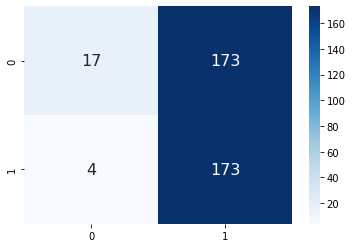

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdlr["Predicted dual"]= prd["Predicted dual"]

prdlr["Correct dual predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["ABS_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)
prdlr["Duals"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["S_Target"] ==1), 1,0)
prdlr["Correct ABS predictions"]= np.where((prdlr["ABS_Target"]==1) & (prdlr["Predicted ABS"] ==1), 1,0)
prdlr["Correct Gam predictions"]= np.where((prdlr["S_Target"]==1) & (prdlr["Predicted dual"] ==1), 1,0)

prdlr

Predicted ABS CompoundID  S_Target  ABS_Target  Predicted dual  \
0                1  MMV000008         0           1               1   
1                0  MMV000028         0           0               0   
2                1  MMV000043         1           1               0   
3                1  MMV000051         0           1               0   
4                1  MMV000059         0           0               0   
..             ...        ...       ...         ...             ...   
395              1  MMV690653         0           0               0   
396              1  MMV690706         0           0               0   
397              1  MMV811071         0           0               0   
398              1  MMV831201         0           0               1   
399              1  MMV975972         1           0               0   

     Correct dual predictions  Duals  Correct ABS predictions  \
0                           0      0                        1   
1                           0      0                        0   
2                           0      1                        1   
3                           0      0                        1   
4                           0      0                        0   
..                        ...    ...                      ...   
395                         0      0                        0   
396                         0      0                        0   
397                         0      0                        0   
398                         0      0                        0   
399                         0      0                        0   

     Correct Gam predictions  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
395                        0  
396                        0  
397                        0  
398                        0  
399                        0  

[400 rows x 9 columns]

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdlr.to_csv('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualLRFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### RF

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


rf_predict = rf_model.predict(df)
p= rf_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
ht= prb["ABS_Target"]
print(ht)
Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(rf_predict)
prd

1    253
0    114
dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: ABS_Target, Length: 400, dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1

Predicted dual
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,rf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,rf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,rf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,rf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,rf_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, rf_predict))
print('Accuracy score:',accuracy_score(Yt, rf_predict))
print('F1 score:',f1_score(Yt, rf_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, rf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, rf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, rf_predict)
print(matrix)

Accuracy: 0.558583
Recall 0.757062
precision 0.529644
F1 score: 0.623256
[[ 71 119]
 [ 43 134]]
ROCAUC score: 0.5653731787094856
Accuracy score: 0.55858310626703
F1 score: 0.6232558139534884
Cohens kappa: 0.128854
ROC AUC: 0.565373
[[ 71 119]
 [ 43 134]]


<Axes: >

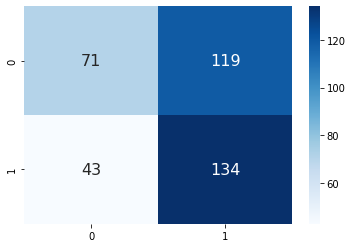

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdRF["Predicted dual"]= prd["Predicted dual"]

prdRF["Correct dual predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["ABS_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)
prdRF["Duals"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["S_Target"] ==1), 1,0)
prdRF["Correct ABS predictions"]= np.where((prdRF["ABS_Target"]==1) & (prdRF["Predicted ABS"] ==1), 1,0)
prdRF["Correct Gam predictions"]= np.where((prdRF["S_Target"]==1) & (prdRF["Predicted dual"] ==1), 1,0)

prdRF

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdRF.to_csv('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualRFFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### GBM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


gbm_predict = gbm_model.predict(df)


In [ ]:
p= gbm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)
prd = pd.DataFrame(np.where(prd['Predicted dual']=="Yes", 1, 0))
prd.rename(columns={ prd.columns[0]: "Predicted dual"}, inplace=True) 
prd

gbm_predict = np.array(list(prd['Predicted dual']))
Yt = np.array(list(df_label))
#gbm_predict = prd['Predicted dual']
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(gbm_predict)
prd

Yes    263
No     104
dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               0
365               0
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,gbm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,gbm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,gbm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,gbm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,gbm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, gbm_predict))
print('Accuracy score:',accuracy_score(Yt, gbm_predict))
print('F1 score:',f1_score(Yt, gbm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, gbm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, gbm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, gbm_predict)
print(matrix)

Accuracy: 0.547684
Recall 0.774011
precision 0.520913
F1 score: 0.622727
[[ 64 126]
 [ 40 137]]
ROCAUC score: 0.5554267023490931
Accuracy score: 0.547683923705722
F1 score: 0.6227272727272728
Cohens kappa: 0.109041
ROC AUC: 0.555427
[[ 64 126]
 [ 40 137]]


<Axes: >

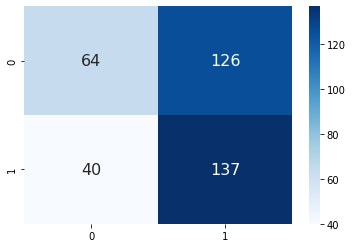

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdgbm["Predicted dual"]= prd["Predicted dual"]

prdgbm["Correct dual predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["ABS_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)
prdgbm["Duals"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["S_Target"] ==1), 1,0)
prdgbm["Correct ABS predictions"]= np.where((prdgbm["ABS_Target"]==1) & (prdgbm["Predicted ABS"] ==1), 1,0)
prdgbm["Correct Gam predictions"]= np.where((prdgbm["S_Target"]==1) & (prdgbm["Predicted dual"] ==1), 1,0)

prdgbm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdgbm.to_csv('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

In [ ]:
prd["CompoundID"]= ut["Compound ID"]
prd["S_Target"]= ut["Gam inhibition"]
prd["ABS_Target"]= ut["ABS inhibition"]
prd

### SVM

In [ ]:
# load the model from disk
#import joblib
#loaded_model = joblib.load('/content/drive/MyDrive/PhD/Penalized_SVM_MFP/sexualsPenalizedSVM_rbfFinal_UMFP_model.sav')


svm_predict = svc_model.predict(df)
p= svm_predict
p= pd.DataFrame(p)
print(p.value_counts())
##############On sexual hits

prd= p.set_axis(['Predicted dual'], axis=1, inplace=False)

Yt = np.array(list(df_label))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(svm_predict)
prd

1    295
0     72
dtype: int64
[0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]
[0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1

Predicted dual
0                 0
1                 1
2                 1
3                 1
4                 1
..              ...
362               1
363               1
364               0
365               1
366               0

[367 rows x 1 columns]

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,svm_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,svm_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,svm_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,svm_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,svm_predict)
print(cm)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, svm_predict))
print('Accuracy score:',accuracy_score(Yt, svm_predict))
print('F1 score:',f1_score(Yt,svm_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, svm_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, svm_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt,svm_predict)
print(matrix)

Accuracy: 0.569482
Recall 0.887006
precision 0.532203
F1 score: 0.665254
[[ 52 138]
 [ 20 157]]
ROCAUC score: 0.580344930121915
Accuracy score: 0.5694822888283378
F1 score: 0.6652542372881357
Cohens kappa: 0.157107
ROC AUC: 0.580345
[[ 52 138]
 [ 20 157]]


<Axes: >

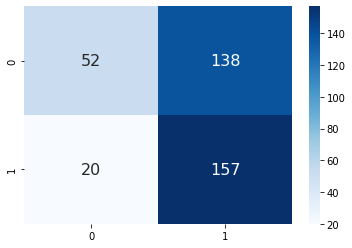

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size

In [ ]:
prdsvm

In [ ]:
prd["CompoundID"]= prb["Compound ID"]
prd["S_Target"]= prb["S_Target"]
prd["ABS_Target"]= prb["ABS_Target"]

prdsvm["Predicted dual"]= prd["Predicted dual"]

prdsvm["Correct dual predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["ABS_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm["Duals"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["S_Target"] ==1), 1,0)
prdsvm["Correct ABS predictions"]= np.where((prdsvm["ABS_Target"]==1) & (prdsvm["Predicted ABS"] ==1), 1,0)
prdsvm["Correct Gam predictions"]= np.where((prdsvm["S_Target"]==1) & (prdsvm["Predicted dual"] ==1), 1,0)
prdsvm

In [ ]:
###Save sexual model predictions on sexual hits sexualsRandomForestFinalizedhpt_UMFP_model.sav

from google.colab import files

prdsvm.to_csv('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv', encoding = 'utf-8-sig') 
files.download('absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_prb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Complied graphs

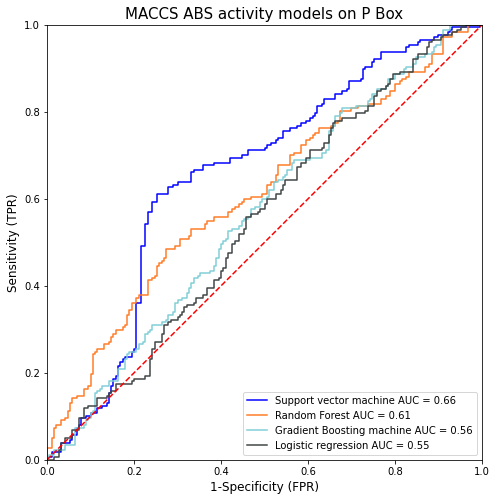

In [ ]:
Xt_test=df
Yt_test= df_label

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# predict probabilities
s_probs = svc_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
s_probs = s_probs[:, 1]
# calculate scores
s_fpr, s_tpr, threshold = metrics.roc_curve(Yt_test, s_probs)
s_auc = metrics.auc(s_fpr, s_tpr)
# predict probabilities
rf_probs = rf_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
rf_fpr, rf_tpr, threshold = metrics.roc_curve(Yt_test, rf_probs)
rf_auc = metrics.auc(rf_fpr, rf_tpr)
# predict probabilities
g_probs = gbm_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
g_probs = g_probs[:, 1]
# calculate scores
g_fpr, g_tpr, threshold = metrics.roc_curve(Yt_test, g_probs)
g_auc = metrics.auc(g_fpr, g_tpr)
# predict probabilities
lr_probs = lr_model.predict_proba(Xt_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_fpr, lr_tpr, threshold = metrics.roc_curve(Yt_test, lr_probs)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(111,aspect = 'equal')
plt.title('MACCS ABS activity models on P Box',fontsize = 15)
plt.plot(s_fpr, s_tpr, 'b', label = 'Support vector machine AUC = %0.2f' % s_auc)
plt.plot(rf_fpr, rf_tpr, '#ff7b25', label = 'Random Forest AUC = %0.2f' % rf_auc)
plt.plot(g_fpr, g_tpr, '#80ced6', label = 'Gradient Boosting machine AUC = %0.2f' % g_auc)
plt.plot(lr_fpr, lr_tpr, '#3e4444', label = 'Logistic regression AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
# axis labels
plt.ylabel('Sensitivity (TPR)',fontsize = 12)
plt.xlabel('1-Specificity (FPR)',fontsize = 12)
plt.show()

0.5764
0.5995
0.5186
0.4996


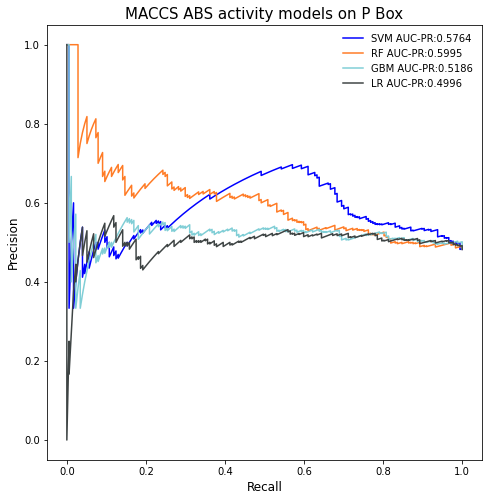

In [ ]:
Xt_test=df
Yt_test= df_label

#define metrics
#fig1 = plt.figure(figsize=[8,8])
#ax = fig1.add_subplot(111,aspect = 'equal')
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from scipy import interp
#create precision recall curve
y_pred_proba = svc_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve
fig1 = plt.figure(figsize=[8,8])
ax = fig1.add_subplot(111,aspect = 'equal')
plt.plot(recall, precision, color='b',label="SVM AUC-PR:"+str(auc_prc))
y_pred_proba = rf_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#ff7b25',label="RF AUC-PR:"+str(auc_prc))

y_pred_proba = gbm_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#80ced6',label="GBM AUC-PR:"+str(auc_prc))

y_pred_proba = lr_model.predict_proba(Xt_test)[::,1]

precision, recall, thresholds = precision_recall_curve(Yt_test, y_pred_proba)
auc_prc = auc(recall, precision)
auc_prc= auc_prc.round(4)
print(auc_prc)
#create precision recall curve

plt.plot(recall, precision, color='#3e4444',label="LR AUC-PR:"+str(auc_prc))
leg = ax.legend();
#add axis labels to plot
plt.title('MACCS ABS activity models on P Box',fontsize = 15)
plt.ylabel('Precision',fontsize = 12)
plt.xlabel('Recall',fontsize = 12)
plt.legend(loc='upper right', frameon=False)
#display plot
plt.show()